# Setup

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# 1. Define and Create the Project Path
import os
project_name = "DL_CoOp_Robustness10"
PROJECT_PATH = f"/content/drive/MyDrive/{project_name}"

# Create the directory if it does not exist
os.makedirs(PROJECT_PATH, exist_ok=True)
print(f"Project directory set to: {PROJECT_PATH}")

# 2. Navigate to the project directory for cloning
%cd "$PROJECT_PATH"

Project directory set to: /content/drive/MyDrive/DL_CoOp_Robustness10
/content/drive/MyDrive/DL_CoOp_Robustness10


In [4]:
# Clone repositories
%cd /content
!rm -rf CoOp Dassl.pytorch  # clean old copies if any
!git clone https://github.com/KaiyangZhou/CoOp.git
!git clone https://github.com/KaiyangZhou/Dassl.pytorch.git

/content
Cloning into 'CoOp'...
remote: Enumerating objects: 455, done.
remote: Counting objects: 100% (250/250), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 455 (delta 217), reused 199 (delta 199), pack-reused 205 (from 1)
Receiving objects: 100% (455/455), 1.40 MiB | 59.76 MiB/s, done.
Resolving deltas: 100% (266/266), done.
Cloning into 'Dassl.pytorch'...
remote: Enumerating objects: 2477, done.
remote: Counting objects: 100% (1081/1081), done.
remote: Compressing objects: 100% (235/235), done.
remote: Total 2477 (delta 933), reused 846 (delta 846), pack-reused 1396 (from 1)
Receiving objects: 100% (2477/2477), 410.19 KiB | 19.53 MiB/s, done.
Resolving deltas: 100% (1676/1676), done.


In [5]:
%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp


In [6]:
#Install CLIP & torchvision
!pip install git+https://github.com/openai/CLIP.git
!pip install torch torchvision tqdm

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-a0uody16
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-a0uody16
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.3 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=79f8cc70acb2153b56ef756c8f87033fa55c412c985dfbcd663dd7ea2b143029
  Stored in directory: /tmp/pip-ephem-wheel-cache-_jxg9td3/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


In [7]:
#Install dependencies and register dassl properly
%cd /content/Dassl.pytorch
!pip install -r requirements.txt -q
!pip install -e . -q   # <-- very important so `import dassl` works everywhere

# Quick sanity check
import importlib.util
assert importlib.util.find_spec("dassl") is not None, "dassl not importable"
print("dassl import OK")

/content/Dassl.pytorch
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.3/185.3 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 149.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
dassl import OK


In [8]:
# --- Define the new project paths based on previous code ---
import os
import argparse
project_name = "DL_CoOp_Robustness10"
PROJECT_PATH = f"/content/drive/MyDrive/{project_name}"
COOP_DIR = os.path.join(PROJECT_PATH, "CoOp")
DATA_DIR = os.path.join(PROJECT_PATH, "data")

print("--- Moving Repositories to Persistent Drive Location ---")

# 1. Move Dassl.pytorch to the project path
!mv /content/Dassl.pytorch "{PROJECT_PATH}/"
print(f"Dassl.pytorch moved to: {PROJECT_PATH}/Dassl.pytorch")

# 2. Move CoOp to the project path
!mv /content/CoOp "{PROJECT_PATH}/"
print(f"CoOp moved to: {COOP_DIR}")

# 3. Create the data directory
os.makedirs(DATA_DIR, exist_ok=True)
print(f"Data directory created at: {DATA_DIR}")

# 4. Navigate into the persistent CoOp directory for further setup
%cd "{COOP_DIR}"
print(f"\nCurrent working directory: {os.getcwd()}")

# 5. Install CoOp's specific dependencies
print("\nInstalling CoOp requirements...")
!pip install -r requirements.txt -q

# 6. Download the CLIP weights (RN50 is standard for the framework)
print("\nDownloading CLIP RN50 weights...")
!mkdir -p checkpoints
RN50_URL = "https://openaipublic.azureedge.net/clip/models/afeb0e10f9e5a86da6080e35cf09123aca3b358a0c3e3b6c78a7b63bc04b6762/RN50.pt"
!wget -O checkpoints/rn50.pth "$RN50_URL" -q

print("\n✅ Setup complete. Ready for dataset download and training.")

--- Moving Repositories to Persistent Drive Location ---
mv: inter-device move failed: '/content/Dassl.pytorch' to '/content/drive/MyDrive/DL_CoOp_Robustness10/Dassl.pytorch'; unable to remove target: Directory not empty
Dassl.pytorch moved to: /content/drive/MyDrive/DL_CoOp_Robustness10/Dassl.pytorch
mv: inter-device move failed: '/content/CoOp' to '/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp'; unable to remove target: Directory not empty
CoOp moved to: /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
Data directory created at: /content/drive/MyDrive/DL_CoOp_Robustness10/data
/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

Current working directory: /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

Installing CoOp requirements...


✅ Setup complete. Ready for dataset download and training.


In [8]:
#Install SigLIP (HuggingFace implementation)
!pip install -q transformers accelerate timm

In [9]:
#Import SigLIP model
from transformers import AutoProcessor, AutoModel

processor = AutoProcessor.from_pretrained("google/siglip-so400m-patch14-384")
model = AutoModel.from_pretrained("google/siglip-so400m-patch14-384")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.51G [00:00<?, ?B/s]

In [ ]:
#Downloading and preparing Oxford Pets into the Drive
import os
import sys

# Redefine persistent paths based on our project name
project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
DATASET_DIR = os.path.join(PROJECT_ROOT, "data")
OXFORD_PETS_DIR = os.path.join(DATASET_DIR, "oxford_pets")

# 1. Ensure persistent dataset directory exists
print(f"Ensuring persistent dataset directory exists: {OXFORD_PETS_DIR}")
os.makedirs(OXFORD_PETS_DIR, exist_ok=True)

# Define target paths for the archives in the persistent folder
images_archive = os.path.join(OXFORD_PETS_DIR, "images.tar.gz")
annotations_archive = os.path.join(OXFORD_PETS_DIR, "annotations.tar.gz")

print("\n--- Downloading and Extracting Oxford-Pets Dataset to Drive ---")

# 2. Download (Using -O to save directly to the persistent path)
# A. Images (737 MB)
print("Downloading images.tar.gz...")
!wget -q -O {images_archive} https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

# B. Annotations (9 MB)
print("Downloading annotations.tar.gz...")
!wget -q -O {annotations_archive} https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

# 3. Extract (Using -C to ensure extraction happens in the correct persistent path)
print("Extracting files...")
!tar -xzf {images_archive} -C {OXFORD_PETS_DIR}
!tar -xzf {annotations_archive} -C {OXFORD_PETS_DIR}

# 4. Clean up archive files
print("Cleaning up archive files...")
!rm -f {images_archive} {annotations_archive}

# 5. Verify critical files
print("\n--- Dataset Verification ---")
images_ok = os.path.isdir(os.path.join(OXFORD_PETS_DIR, "images"))
annotations_ok = os.path.isdir(os.path.join(OXFORD_PETS_DIR, "annotations"))
# Check for a key annotation file to ensure structure is correct
trainval_ok = os.path.isfile(os.path.join(OXFORD_PETS_DIR, "annotations", "trainval.txt"))

print(f"images exists? {images_ok}")
print(f"annotations exists? {annotations_ok}")
print(f"trainval.txt exists? {trainval_ok}")

if images_ok and annotations_ok and trainval_ok:
    print("\n✅ Dataset is complete and located correctly. Proceed to Baseline Training (Step 5).")
else:
    print("\n❌ Dataset incomplete or misplaced. STOP.")

Ensuring persistent dataset directory exists: /content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets

--- Downloading and Extracting Oxford-Pets Dataset to Drive ---
Extracting files...
Cleaning up archive files...

--- Dataset Verification ---
images exists? True
annotations exists? True
trainval.txt exists? True

✅ Dataset is complete and located correctly. Proceed to Baseline Training (Step 5).


# Phase 0 **Downloaing Datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

BASE = "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/datasets"
os.makedirs(BASE, exist_ok=True)

# -------------------------
# 1. Caltech101
# -------------------------
!wget http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz -P $BASE
!tar -xzf $BASE/101_ObjectCategories.tar.gz -C $BASE

# -------------------------
# 2. Food101
# -------------------------
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz -P $BASE
!tar -xzf $BASE/food-101.tar.gz -C $BASE

# -------------------------
# 3. DTD (Describable Textures Dataset)
# -------------------------
!wget https://www.robots.ox.ac.uk/~vgg/data/dtd/r1/dtd-r1.0.1.tar.gz -P $BASE
!tar -xzf $BASE/dtd-r1.0.1.tar.gz -C $BASE

# -------------------------
# 4. EuroSAT
# -------------------------
!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip -P $BASE
!unzip -q $BASE/EuroSAT.zip -d $BASE

print("All 4 datasets downloaded and extracted successfully!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2025-11-17 12:55:00--  http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to www.vision.caltech.edu (www.vision.caltech.edu)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-11-17 12:55:00 ERROR 404: Not Found.

tar (child): /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/datasets/101_ObjectCategories.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
--2025-11-17 12:55:00--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to d

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil

# =====================================================
# 1. Define base folder for ALL datasets (including pets)
# =====================================================
BASE = "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/data"
os.makedirs(BASE, exist_ok=True)

print("DATA ROOT:", BASE)

# Optional: if you previously downloaded into CoOp/datasets and want to clean:
# WARNING: This will delete the old 'datasets' folder with .tar.gz files, not your code.
# Comment it out if you don't want that.
# old_data_folder = "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/datasets"
# if os.path.exists(old_data_folder):
#     print("Removing old data folder:", old_data_folder)
#     shutil.rmtree(old_data_folder)

# =====================================================
# 2. Caltech101
# =====================================================
caltech_tar = os.path.join(BASE, "101_ObjectCategories.tar.gz")
caltech_dir = os.path.join(BASE, "101_ObjectCategories")

if not os.path.exists(caltech_dir):
    print("\n>>> Downloading Caltech101 ...")
    !wget -O {caltech_tar} http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
    !tar -xzf {caltech_tar} -C {BASE}
else:
    print("\n>>> Caltech101 already exists, skipping.")

# =====================================================
# 3. Food-101
# =====================================================
food_tar = os.path.join(BASE, "food-101.tar.gz")
food_dir = os.path.join(BASE, "food-101")

if not os.path.exists(food_dir):
    print("\n>>> Downloading Food-101 (this is ~5GB, takes time) ...")
    !wget -O {food_tar} http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    !tar -xzf {food_tar} -C {BASE}
else:
    print("\n>>> Food-101 already exists, skipping.")

# =====================================================
# 4. DTD (Describable Textures Dataset)
# =====================================================
dtd_tar = os.path.join(BASE, "dtd-r1.0.1.tar.gz")
dtd_dir = os.path.join(BASE, "dtd")

if not os.path.exists(dtd_dir):
    print("\n>>> Downloading DTD ...")
    !wget -O {dtd_tar} https://www.robots.ox.ac.uk/~vgg/data/dtd/r1/dtd-r1.0.1.tar.gz
    !tar -xzf {dtd_tar} -C {BASE}
else:
    print("\n>>> DTD already exists, skipping.")

# =====================================================
# 5. EuroSAT
# =====================================================
eurosat_zip = os.path.join(BASE, "EuroSAT.zip")
eurosat_dir1 = os.path.join(BASE, "EuroSAT")
eurosat_dir2 = os.path.join(BASE, "2750")  # sometimes extracts as '2750'

if not (os.path.exists(eurosat_dir1) or os.path.exists(eurosat_dir2)):
    print("\n>>> Downloading EuroSAT ...")
    !wget -O {eurosat_zip} https://madm.dfki.de/files/sentinel/EuroSAT.zip
    !unzip -q {eurosat_zip} -d {BASE}
else:
    print("\n>>> EuroSAT already exists, skipping.")

print("\n✅ All datasets are now under:", BASE)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DATA ROOT: /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/data

>>> Downloading Caltech101 ...
--2025-11-17 13:16:01--  http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to www.vision.caltech.edu (www.vision.caltech.edu)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-11-17 13:16:01 ERROR 404: Not Found.


gzip: stdin: unexpected end of file
tar: Child returned status 1
tar: Error is not recoverable: exiting now

>>> Downloading Food-101 (this is ~5GB, takes time) ...
--2025-11-17 13:16:01--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to 

In [ ]:
import torchvision.datasets as dset

# The root directory where the data will be stored (matching your DATA_ROOT)
download_root = "/content/drive/MyDrive/DL_CoOp_Robustness10/data"

print(f"Attempting to download CIFAR100 to: {download_root}/cifar100")

# Download the training split
train_data = dset.CIFAR100(
    root=download_root,
    train=True,
    download=True
)

# Download the test split (if needed separately, but often handled together)
test_data = dset.CIFAR100(
    root=download_root,
    train=False,
    download=True
)

print("\n✅ CIFAR-100 dataset downloaded and saved successfully!")

Attempting to download CIFAR100 to: /content/drive/MyDrive/DL_CoOp_Robustness10/data/cifar100


100%|██████████| 169M/169M [00:04<00:00, 35.8MB/s]



✅ CIFAR-100 dataset downloaded and saved successfully!


In [ ]:
import torchvision.datasets as dset

# The root directory where the data will be stored
download_root = "/content/drive/MyDrive/DL_CoOp_Robustness10/data"

print(f"Attempting to download CIFAR10 to: {download_root}/cifar10")

# Download the training split
train_data = dset.CIFAR10(
    root=download_root,
    train=True,
    download=True
)

# Download the test split
test_data = dset.CIFAR10(
    root=download_root,
    train=False,
    download=True
)

print("\n CIFAR-10 dataset downloaded and saved successfully!")

Attempting to download CIFAR10 to: /content/drive/MyDrive/DL_CoOp_Robustness10/data/cifar10


100%|██████████| 170M/170M [00:04<00:00, 42.0MB/s]



 CIFAR-10 dataset downloaded and saved successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# =====================================================
# 0) One folder for ALL datasets
# =====================================================
BASE = "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/data"
os.makedirs(BASE, exist_ok=True)
print("DATA ROOT:", BASE)

# =====================================================
# 1) Caltech101
# =====================================================
caltech_dir = os.path.join(BASE, "101_ObjectCategories")
caltech_tar = os.path.join(BASE, "101_ObjectCategories.tar.gz")

if not os.path.exists(caltech_dir):
    print("\n>>> Downloading Caltech101 ...")
    !wget -O {caltech_tar} http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
    !tar -xzf {caltech_tar} -C {BASE}
else:
    print("\n>>> Caltech101 already exists, skipping.")

# =====================================================
# 2) Food-101  (big ~5GB)
#    - if already downloaded somewhere, we reuse it
# =====================================================
food_dir = os.path.join(BASE, "food-101")
food_tar_base = os.path.join(BASE, "food-101.tar.gz")
food_tar_old  = "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/datasets/food-101.tar.gz"

if not os.path.exists(food_dir):
    # if tar exists in old location, move it
    if os.path.exists(food_tar_old) and not os.path.exists(food_tar_base):
        print("\n>>> Moving existing food-101.tar.gz from datasets/ to data/ ...")
        os.rename(food_tar_old, food_tar_base)

    if not os.path.exists(food_tar_base):
        print("\n>>> Downloading Food-101 (this is ~5GB, takes time) ...")
        !wget -O {food_tar_base} http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

    print(">>> Extracting Food-101 ...")
    !tar -xzf {food_tar_base} -C {BASE}
else:
    print("\n>>> Food-101 already exists, skipping.")

# =====================================================
# 3) DTD (Describable Textures)
# =====================================================
dtd_dir = os.path.join(BASE, "dtd")
dtd_tar = os.path.join(BASE, "dtd-r1.0.1.tar.gz")

if not os.path.exists(dtd_dir):
    print("\n>>> Downloading DTD ...")
    !wget -O {dtd_tar} https://www.robots.ox.ac.uk/~vgg/data/dtd/r1/dtd-r1.0.1.tar.gz
    !tar -xzf {dtd_tar} -C {BASE}
else:
    print("\n>>> DTD already exists, skipping.")

# =====================================================
# 4) EuroSAT
# =====================================================
eurosat_dir1 = os.path.join(BASE, "EuroSAT")
eurosat_dir2 = os.path.join(BASE, "2750")  # sometimes extracts with this name
eurosat_zip  = os.path.join(BASE, "EuroSAT.zip")

if not (os.path.exists(eurosat_dir1) or os.path.exists(eurosat_dir2)):
    print("\n>>> Downloading EuroSAT ...")
    !wget -O {eurosat_zip} https://madm.dfki.de/files/sentinel/EuroSAT.zip
    print(">>> Extracting EuroSAT ...")
    !unzip -q {eurosat_zip} -d {BASE}
else:
    print("\n>>> EuroSAT already exists, skipping.")

print("\n Done. Current contents of data/:")
!ls -lh {BASE}


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DATA ROOT: /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/data

>>> Downloading Caltech101 ...
--2025-11-17 13:39:44--  http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to www.vision.caltech.edu (www.vision.caltech.edu)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-11-17 13:39:44 ERROR 404: Not Found.


gzip: stdin: unexpected end of file
tar: Child returned status 1
tar: Error is not recoverable: exiting now

>>> Food-101 already exists, skipping.

>>> Downloading DTD ...
--2025-11-17 13:39:44--  https://www.robots.ox.ac.uk/~vgg/data/dtd/r1/dtd-r1.0.1.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox

**Downloading the Datasets**

In [ ]:
#FOOD-101
from google.colab import drive
drive.mount('/content/drive')

import os, shutil

# Define paths
project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
DATASET_DIR = os.path.join(PROJECT_ROOT, "data")
os.makedirs(DATASET_DIR, exist_ok=True)

FOOD_DIR = os.path.join(DATASET_DIR, "food101")
os.makedirs(FOOD_DIR, exist_ok=True)

TMP_DIR = "/content/tmp_food101"
os.makedirs(TMP_DIR, exist_ok=True)

archive_path = os.path.join(TMP_DIR, "food-101.tar.gz")

print("\n--- Downloading Food-101 safely to local /content first ---")

# Clean previous temp files
for item in os.listdir(TMP_DIR):
    p = os.path.join(TMP_DIR, item)
    if os.path.isdir(p):
        shutil.rmtree(p)
    else:
        os.remove(p)

# Download
print("Downloading food-101.tar.gz (~5GB)...")
!wget -q -O "{archive_path}" http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

print("\nDownloaded file size:")
!ls -lh "{archive_path}"

# Extract locally
print("\nExtracting in /content/tmp_food101 ...")
!tar -xzf "{archive_path}" -C "{TMP_DIR}"

# Copy to Drive
src = os.path.join(TMP_DIR, "food-101")
dst = os.path.join(FOOD_DIR, "food-101")

if os.path.exists(dst):
    shutil.rmtree(dst)

print(f"\nCopying to Drive: {dst}")
shutil.copytree(src, dst)

print("\n--- Verifying Food101 ---")
print("food-101 exists?", os.path.isdir(dst))
print("images folder exists?", os.path.isdir(os.path.join(dst, "images")))
print("meta folder exists?", os.path.isdir(os.path.join(dst, "meta")))

if os.path.isdir(dst):
    print("\n Food101 ready.")
else:
    print("\n Something went wrong.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- Downloading Food-101 safely to local /content first ---

Downloaded file size:
-rw-r--r-- 1 root root 4.7G Jul  9  2014 /content/tmp_food101/food-101.tar.gz

Extracting in /content/tmp_food101 ...

Copying to Drive: /content/drive/MyDrive/DL_CoOp_Robustness10/data/food101/food-101

--- Verifying Food101 ---
food-101 exists? True
images folder exists? True
meta folder exists? True

 Food101 ready.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, shutil

# Define paths
project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
DATASET_DIR = os.path.join(PROJECT_ROOT, "data")
os.makedirs(DATASET_DIR, exist_ok=True)

DTD_DIR = os.path.join(DATASET_DIR, "dtd")
os.makedirs(DTD_DIR, exist_ok=True)

TMP_DIR = "/content/tmp_dtd"
os.makedirs(TMP_DIR, exist_ok=True)

archive_path = os.path.join(TMP_DIR, "dtd-r1.0.1.tar.gz")

print("\n--- Downloading DTD safely to local /content first ---")

# Clean tmp
for item in os.listdir(TMP_DIR):
    p = os.path.join(TMP_DIR, item)
    if os.path.isdir(p):
        shutil.rmtree(p)
    else:
        os.remove(p)

# 1) Download from the correct URL
print("Downloading dtd-r1.0.1.tar.gz from VGG (official URL)...")
!wget -O "{archive_path}" "https://www.robots.ox.ac.uk/~vgg/data/dtd/download/dtd-r1.0.1.tar.gz"

print("\nDownloaded file size:")
!ls -lh "{archive_path}"

# Quick sanity check: stop if file is tiny (failed download)
if os.path.getsize(archive_path) < 1000000:   # < 1MB means something went wrong
    raise RuntimeError("DTD download failed – file is too small. Please re-run this cell when network is OK.")

# 2) Extract locally
print("\nExtracting in /content/tmp_dtd ...")
!tar -xzf "{archive_path}" -C "{TMP_DIR}"

# 3) Copy to Drive
src = os.path.join(TMP_DIR, "dtd")
dst = os.path.join(DTD_DIR, "dtd")

if os.path.exists(dst):
    shutil.rmtree(dst)

print(f"\nCopying to Drive: {dst}")
shutil.copytree(src, dst)

# 4) Verify
print("\n--- Verifying DTD ---")
print("dtd exists?", os.path.isdir(dst))
print("images folder exists?", os.path.isdir(os.path.join(dst, "images")))
print("labels folder exists?", os.path.isdir(os.path.join(dst, "labels")))
print("imlists exists?", os.path.isdir(os.path.join(dst, "imlists")))

if os.path.isdir(dst):
    print("\n DTD ready.")
else:
    print("\n Something went wrong.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- Downloading DTD safely to local /content first ---
--2025-11-19 16:24:04--  https://www.robots.ox.ac.uk/~vgg/data/dtd/download/dtd-r1.0.1.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/dtd/dtd-r1.0.1.tar.gz [following]
--2025-11-19 16:24:06--  https://thor.robots.ox.ac.uk/dtd/dtd-r1.0.1.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625239812 (596M) [application/octet-stream]
Saving to: ‘/content/tmp_dtd/dtd-r1.0.1.tar.gz’

/content/tmp_dtd/dt 100%[===================>] 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, shutil

project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
DATASET_DIR = os.path.join(PROJECT_ROOT, "data")
os.makedirs(DATASET_DIR, exist_ok=True)

EUROSAT_DIR = os.path.join(DATASET_DIR, "eurosat")
os.makedirs(EUROSAT_DIR, exist_ok=True)

TMP_ROOT = "/content/tmp_eurosat_torch"

# we now assume torchvision created TMP_ROOT/eurosat
src = os.path.join(TMP_ROOT, "eurosat")   # << key fix
dst = os.path.join(EUROSAT_DIR, "eurosat")

if os.path.exists(dst):
    shutil.rmtree(dst)

print(f"Copying {src}  -->  {dst}")
shutil.copytree(src, dst)

print("\n--- Verifying EuroSAT ---")
print("eurosat exists in Drive?", os.path.isdir(dst))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copying /content/tmp_eurosat_torch/eurosat  -->  /content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat/eurosat


FileNotFoundError: [Errno 2] No such file or directory: '/content/tmp_eurosat_torch/eurosat'

In [ ]:
import os
import urllib.request
import tarfile

project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
DATASET_DIR = os.path.join(PROJECT_ROOT, "data")
EUROSAT_DIR = os.path.join(DATASET_DIR, "eurosat")
os.makedirs(EUROSAT_DIR, exist_ok=True)

# Download EuroSAT RGB version
url = "http://madm.dfki.de/files/sentinel/EuroSAT.zip"
zip_path = os.path.join(EUROSAT_DIR, "EuroSAT.zip")

print("Downloading EuroSAT...")
urllib.request.urlretrieve(url, zip_path)
print("Download complete.")


Download complete.


In [ ]:
import zipfile

zip_path = os.path.join(EUROSAT_DIR, "EuroSAT.zip")
extract_dir = os.path.join(EUROSAT_DIR, "images")

print("Extracting EuroSAT...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete.")


Extracting EuroSAT...
Extraction complete.


## Phase 1 Continue **RUN CLIP FOR CIFAR-100**

In [ ]:
#Run CLIP Robustness Test on CIFAR-100
%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

!python robust_eval/prompt_noise_eval_v2.py \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/cifar100" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 1 \
  --save_json "output/robust_eval/cifar100_clip_k1.json"


In [ ]:
import os
import sys

# Define persistent paths
project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
COOP_DIR = os.path.join(PROJECT_ROOT, "CoOp")
DATASET_DIR = os.path.join(PROJECT_ROOT, "data")

# 1. Navigate to the persistent CoOp directory
print(f"Navigating to: {COOP_DIR}")
%cd "{COOP_DIR}"

# 2. Execute Zero-Shot CLIP Evaluation (Lines below \ are now flush left)
print("\n--- Starting Zero-Shot CLIP Evaluation (ViT-B/16) ---")
!python train.py \
--config-file configs/datasets/oxford_pets.yaml \
--eval-only \
TRAINER.NAME "ZeroshotCLIP" \
MODEL.BACKBONE.NAME "ViT-B/16" \
DATASET.ROOT "{DATASET_DIR}"

In [ ]:
#confirm we are inside CoOp folder
import os

project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
COOP_DIR = os.path.join(PROJECT_ROOT, "CoOp")

print("Navigating to:", COOP_DIR)
%cd "{COOP_DIR}"

Navigating to: /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp


In [ ]:
import os

BASE = "/content/drive/MyDrive/DL_CoOp_Robustness10/data"

def check_folder(path):
    return os.path.isdir(path)

def count_files(path):
    total = 0
    for root, dirs, files in os.walk(path):
        total += len([f for f in files if f.lower().endswith(('.jpg','.png','.jpeg','.txt'))])
    return total

print("=====================================")
print("   DATASET VERIFICATION REPORT")
print("=====================================")

# ---------------------------
# 1. Oxford Pets
# ---------------------------
pets_root = os.path.join(BASE, "oxford_pets")
pets_img = os.path.join(pets_root, "images")
pets_ann = os.path.join(pets_root, "annotations")

print("\n[Oxford Pets]")
print("Exists:", check_folder(pets_root))
print("Images folder:", check_folder(pets_img))
print("Annotations folder:", check_folder(pets_ann))
if check_folder(pets_root):
    print("Total files:", count_files(pets_root))

# ---------------------------
# 2. Caltech101
# ---------------------------
cal_root = os.path.join(BASE, "caltech101/caltech-101")
cal_img = os.path.join(cal_root, "101_ObjectCategories")
cal_ann = os.path.join(cal_root, "Annotations")

print("\n[Caltech101]")
print("Exists:", check_folder(cal_root))
print("101_ObjectCategories:", check_folder(cal_img))
print("Annotations:", check_folder(cal_ann))
if check_folder(cal_root):
    print("Total files:", count_files(cal_root))

# ---------------------------
# 3. Food-101
# ---------------------------
food_root = os.path.join(BASE, "food101/food-101")
food_img = os.path.join(food_root, "images")
food_meta = os.path.join(food_root, "meta")

print("\n[Food-101]")
print("Exists:", check_folder(food_root))
print("Images folder:", check_folder(food_img))
print("Meta folder:", check_folder(food_meta))
if check_folder(food_root):
    print("Total files:", count_files(food_root))

# ---------------------------
# 4. DTD
# ---------------------------
dtd_root = os.path.join(BASE, "dtd/dtd")
dtd_img = os.path.join(dtd_root, "images")
dtd_annot = os.path.join(dtd_root, "labels")

print("\n[DTD]")
print("Exists:", check_folder(dtd_root))
print("Images folder:", check_folder(dtd_img))
print("Labels folder:", check_folder(dtd_annot))
if check_folder(dtd_root):
    print("Total files:", count_files(dtd_root))

# ---------------------------
# 5. EuroSAT
# ---------------------------
eurosat_root = os.path.join(BASE, "eurosat/eurosat")
print("\n[EuroSAT]")
print("Exists:", check_folder(eurosat_root))
if check_folder(eurosat_root):
    print("Total files:", count_files(eurosat_root))

print("\n=====================================")
print(" Verification Complete ")
print("=====================================")


In [ ]:
#Re-download Oxford-IIIT Pets
from torchvision.datasets import OxfordIIITPet

root_dir = "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets"
dataset = OxfordIIITPet(root=root_dir, download=True)
print("✅ Dataset downloaded to:", root_dir)


100%|██████████| 792M/792M [09:47<00:00, 1.35MB/s]
100%|██████████| 19.2M/19.2M [00:03<00:00, 5.63MB/s]


##DATASET ROOTS
Oxford Pets → /content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets

Caltech101 → /content/drive/MyDrive/DL_CoOp_Robustness10/data/caltech101/
caltech-101

Food101    → /content/drive/MyDrive/DL_CoOp_Robustness10/data/food101/food-101

DTD        → /content/drive/MyDrive/DL_CoOp_Robustness10/data/dtd/dtd

EuroSAT    → /content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat/eurosat

# Phase1:Baseline Benchmarking (Clean Prompt)

## [1.1] Baseline for the three Models on Oxford Pets ONLY

In [ ]:
#CLIP on pets
import os
import sys

# Define persistent paths
project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
COOP_DIR = os.path.join(PROJECT_ROOT, "CoOp")
DATASET_DIR = os.path.join(PROJECT_ROOT, "data")

# 1. Navigate to the persistent CoOp directory
print(f"Navigating to: {COOP_DIR}")
%cd "{COOP_DIR}"

# 2. Execute Zero-Shot CLIP Evaluation (Lines below \ are now flush left)
print("\n--- Starting Zero-Shot CLIP Evaluation (ViT-B/16) ---")
!python train.py \
--config-file configs/datasets/oxford_pets.yaml \
--eval-only \
TRAINER.NAME "ZeroshotCLIP" \
MODEL.BACKBONE.NAME "ViT-B/16" \
DATASET.ROOT "{DATASET_DIR}"

Navigating to: /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

--- Starting Zero-Shot CLIP Evaluation (ViT-B/16) ---
2025-11-19 08:22:26.426462: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763540546.447895    9963 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763540546.454397    9963 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763540546.470642    9963 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763540546.470669    9963 computation_placer.cc:177] computation placer already re

In [ ]:
#SigLIP, Direct HuggingFace model
# ===== Zero-Shot SigLIP on Oxford Pets =====
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
from transformers import AutoProcessor, AutoModel

# --- Paths (same style as your CLIP code) ---
project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
OXFORD_PETS_DIR = os.path.join(PROJECT_ROOT, "data", "oxford_pets")

print("Oxford Pets root:", OXFORD_PETS_DIR)


# --- Dataset definition (reads images/ + annotations/trainval.txt) ---
class OxfordPetsDataset(Dataset):
    def __init__(self, root):
        self.root = root
        self.images_dir = os.path.join(root, "images")
        ann_file = os.path.join(root, "annotations", "trainval.txt")

        if not os.path.isfile(ann_file):
            raise FileNotFoundError(f"Annotation file not found: {ann_file}")

        self.samples = []           # (image_path, label_idx)
        self.class_id_to_name = {}  # id -> breed name

        with open(ann_file, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) < 2:
                    continue
                image_id = parts[0]          # e.g. Abyssinian_1
                class_id = int(parts[1]) - 1 # 1..37 -> 0..36

                breed = " ".join(image_id.split("_")[:-1])
                self.class_id_to_name[class_id] = breed

                img_path = os.path.join(self.images_dir, image_id + ".jpg")
                if os.path.isfile(img_path):
                    self.samples.append((img_path, class_id))

        self.classnames = [self.class_id_to_name[i] for i in sorted(self.class_id_to_name.keys())]
        print(f"[OxfordPetsDataset] {len(self.samples)} samples, {len(self.classnames)} classes")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        img = Image.open(img_path).convert("RGB")
        return img, label


# --- Custom collate: keep images as list of PIL (needed for SigLIP processor) ---
def collate_pil(batch):
    imgs, labels = zip(*batch)
    labels = torch.tensor(labels, dtype=torch.long)
    return list(imgs), labels


# --- SigLIP helpers ---
@torch.no_grad()
def get_text_features(processor, model, classnames, templates, device):
    all_embeds = []
    for cname in classnames:
        prompts = [t.format(cname) for t in templates]

        inputs = processor(
            text=prompts,
            return_tensors="pt",
            padding=True
        ).to(device)

        # Use the special SigLIP helper
        text_embeds = model.get_text_features(**inputs)   # (num_prompts, dim)
        text_embeds = text_embeds / text_embeds.norm(dim=-1, keepdim=True)

        class_embed = text_embeds.mean(dim=0, keepdim=True)
        class_embed = class_embed / class_embed.norm(dim=-1, keepdim=True)
        all_embeds.append(class_embed)

    return torch.cat(all_embeds, dim=0)



@torch.no_grad()
def get_image_features(processor, model, dataloader, device):
    all_feats = []
    all_labels = []

    for imgs, labels in tqdm(dataloader, desc="Extracting SigLIP image features"):
        # imgs is a list of PIL images (from collate_pil)
        inputs = processor(
            images=imgs,
            return_tensors="pt"
        ).to(device)

        #  Use the SigLIP helper
        img_embeds = model.get_image_features(**inputs)   # (batch, dim)
        img_embeds = img_embeds / img_embeds.norm(dim=-1, keepdim=True)

        all_feats.append(img_embeds.cpu())
        all_labels.append(labels)

    return torch.cat(all_feats, dim=0), torch.cat(all_labels, dim=0)




@torch.no_grad()
def compute_accuracy(img_feats, labels, text_feats, device):
    img_feats = img_feats.to(device)
    text_feats = text_feats.to(device)
    logits = img_feats @ text_feats.t()
    preds = logits.argmax(dim=-1).cpu()
    labels = labels.cpu()
    return (preds == labels).float().mean().item() * 100.0


# --- Main evaluation ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

dataset = OxfordPetsDataset(OXFORD_PETS_DIR)
dataloader = DataLoader(
    dataset,
    batch_size=64,
    shuffle=False,
    num_workers=2,
    collate_fn=collate_pil,
)

model_id = "google/siglip-so400m-patch14-384"
print("Loading SigLIP model:", model_id)
processor = AutoProcessor.from_pretrained(model_id)
model = AutoModel.from_pretrained(model_id).to(device)
model.eval()

# 1) Image features
img_feats, labels = get_image_features(processor, model, dataloader, device)

# 2) Text features (clean prompts – same idea as CLIP)
templates = [
    "a photo of a {}.",
    "a pet {}.",
    "a close-up photo of a {}.",
]
text_feats = get_text_features(processor, model, dataset.classnames, templates, device)

# 3) Accuracy
acc = compute_accuracy(img_feats, labels, text_feats, device)
print("\n===== Zero-Shot SigLIP on Oxford Pets =====")
print(f"Top-1 Accuracy: {acc:.2f}%")


Oxford Pets root: /content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets
Using device: cuda
[OxfordPetsDataset] 3680 samples, 37 classes
Loading SigLIP model: google/siglip-so400m-patch14-384


Extracting SigLIP image features: 100%|██████████| 58/58 [06:01<00:00,  6.24s/it]



===== Zero-Shot SigLIP on Oxford Pets =====
Top-1 Accuracy: 78.64%


In [ ]:
#CoOp Baswline on pets
import os

project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
COOP_DIR = os.path.join(PROJECT_ROOT, "CoOp")
DATASET_DIR = os.path.join(PROJECT_ROOT, "data")
# Navigate to the CoOp directory where the training/evaluation scripts reside
%cd {COOP_DIR}

print("\n--- Running 4.2: Training CoOp Baseline (ViT-B/16, 16-shot) ---")
!python train.py \
  --config-file configs/datasets/oxford_pets.yaml \
  TRAINER.NAME "CoOp" \
  TRAINER.COOP.N_CTX 16 \
  TRAINER.COOP.CSC False \
  TRAINER.COOP.CLASS_TOKEN_POSITION "end" \
  TRAINER.COOP.PREC "fp32" \
  DATASET.ROOT "{DATASET_DIR}" \
  DATASET.NUM_SHOTS 16 \
  MODEL.BACKBONE.NAME "ViT-B/16" \
  OUTPUT_DIR "output/CoOp_ViTB16_Pets_s16_baseline"

/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

--- Running 4.2: Training CoOp Baseline (ViT-B/16, 16-shot) ---
2025-11-04 12:12:03.097680: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-04 12:12:03.117404: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762258323.139329   15797 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762258323.145867   15797 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762258323.163685

## [1.2] CLIP Baseline for the other 4 datasets

In [ ]:
%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

# install the Dassl library
!pip install -e Dassl.pytorch


/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
Obtaining file:///content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/Dassl.pytorch
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.3/185.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 114.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: entrypoints
    Found existing installation: entrypoints 0.4
    Uninstalling entrypoints-0.4:
      Successfully uninstalled entrypoints-0.4
  Attempting uninstall: wilds
    Found existing installation: wilds 2.0.0
    Uninstalling wilds-2.0.0:
      Suc

In [ ]:
##Caltech101
import os
import sys

# Define persistent paths
project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
COOP_DIR = os.path.join(PROJECT_ROOT, "CoOp")

print(f"Navigating to: {COOP_DIR}")
%cd "{COOP_DIR}"

print("\n--- Starting Zero-Shot CLIP Evaluation on Caltech101 (ViT-B/16) ---")
!python train.py \
--config-file configs/datasets/caltech101.yaml \
--eval-only \
TRAINER.NAME "ZeroshotCLIP" \
MODEL.BACKBONE.NAME "ViT-B/16" \
DATASET.ROOT "/content/drive/MyDrive/DL_CoOp_Robustness10/data/caltech101"
#

Navigating to: /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

--- Starting Zero-Shot CLIP Evaluation on Caltech101 (ViT-B/16) ---
2025-11-17 16:13:57.836693: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-17 16:13:57.856945: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763396037.878814  108141 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763396037.885571  108141 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLA

In [ ]:
#Food101
import os
import sys

# Define persistent paths
project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
COOP_DIR = os.path.join(PROJECT_ROOT, "CoOp")

print(f"Navigating to: {COOP_DIR}")
%cd "{COOP_DIR}"

print("\n--- Starting Zero-Shot CLIP Evaluation on Food101 (ViT-B/16) ---")
!python train.py \
--config-file configs/datasets/food101.yaml \
--eval-only \
TRAINER.NAME "ZeroshotCLIP" \
MODEL.BACKBONE.NAME "ViT-B/16" \
DATASET.ROOT "/content/drive/MyDrive/DL_CoOp_Robustness10/data/food101"

Navigating to: /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

--- Starting Zero-Shot CLIP Evaluation on Food101 (ViT-B/16) ---
2025-11-17 16:16:53.451303: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-17 16:16:53.473370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763396213.495705  109430 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763396213.502600  109430 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS w

In [ ]:
#DTD
import os
import sys

# Define persistent paths
project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
COOP_DIR = os.path.join(PROJECT_ROOT, "CoOp")

print(f"Navigating to: {COOP_DIR}")
%cd "{COOP_DIR}"

print("\n--- Starting Zero-Shot CLIP Evaluation on DTD (ViT-B/16) ---")
!python train.py \
--config-file configs/datasets/dtd.yaml \
--eval-only \
TRAINER.NAME "ZeroshotCLIP" \
MODEL.BACKBONE.NAME "ViT-B/16" \
DATASET.ROOT "/content/drive/MyDrive/DL_CoOp_Robustness10/data/dtd"


Navigating to: /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

--- Starting Zero-Shot CLIP Evaluation on DTD (ViT-B/16) ---
2025-11-17 16:19:52.450371: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-17 16:19:52.469741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763396392.491192  110861 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763396392.497656  110861 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when 

In [ ]:
#Zero-Shot CLIP Baseline — EuroSAT
import os
import sys

# Define persistent paths
project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
COOP_DIR = os.path.join(PROJECT_ROOT, "CoOp")

print(f"Navigating to: {COOP_DIR}")
%cd "{COOP_DIR}"

print("\n--- Starting Zero-Shot CLIP Evaluation on EuroSAT (ViT-B/16) ---")
!python train.py \
--config-file configs/datasets/eurosat.yaml \
--eval-only \
TRAINER.NAME "ZeroshotCLIP" \
MODEL.BACKBONE.NAME "ViT-B/16" \
DATASET.ROOT "/content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat"


Navigating to: /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

--- Starting Zero-Shot CLIP Evaluation on EuroSAT (ViT-B/16) ---
2025-11-17 16:22:41.114658: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-17 16:22:41.134985: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763396561.157897  111687 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763396561.164944  111687 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS w

## [1.3] CoOp Baseline

In [ ]:
#CoOp Baseline — Oxford Pets
import os

project_name = "DL_CoOp_Robustness10"
PROJECT_ROOT = f"/content/drive/MyDrive/{project_name}"
COOP_DIR = os.path.join(PROJECT_ROOT, "CoOp")
DATASET_DIR = os.path.join(PROJECT_ROOT, "data")
# Navigate to the CoOp directory where the training/evaluation scripts reside
%cd {COOP_DIR}

print("\n--- Running 4.2: Training CoOp Baseline (ViT-B/16, 16-shot) ---")
!python train.py \
  --config-file configs/datasets/oxford_pets.yaml \
  TRAINER.NAME "CoOp" \
  TRAINER.COOP.N_CTX 16 \
  TRAINER.COOP.CSC False \
  TRAINER.COOP.CLASS_TOKEN_POSITION "end" \
  TRAINER.COOP.PREC "fp32" \
  DATASET.ROOT "{DATASET_DIR}" \
  DATASET.NUM_SHOTS 16 \
  MODEL.BACKBONE.NAME "ViT-B/16" \
  OUTPUT_DIR "output/CoOp_ViTB16_Pets_s16_baseline"

/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

--- Running 4.2: Training CoOp Baseline (ViT-B/16, 16-shot) ---
2025-11-19 11:03:00.916488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763550180.937040   52118 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763550180.943256   52118 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763550180.958674   52118 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763550180.958702   52118 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the s

In [ ]:
#CoOp Baseline — Caltech101
print("\n--- CoOp Baseline (ViT-B/16, 16-shot) — Caltech101 ---")
!python train.py \
  --config-file configs/datasets/caltech101.yaml \
  TRAINER.NAME "CoOp" \
  TRAINER.COOP.N_CTX 16 \
  TRAINER.COOP.CSC False \
  TRAINER.COOP.CLASS_TOKEN_POSITION "end" \
  TRAINER.COOP.PREC "fp32" \
  DATASET.ROOT "/content/drive/MyDrive/DL_CoOp_Robustness10/data/caltech101" \
  DATASET.NUM_SHOTS 16 \
  MODEL.BACKBONE.NAME "ViT-B/16" \
  OUTPUT_DIR "output/CoOp_ViTB16_Caltech101_s16_baseline"


--- CoOp Baseline (ViT-B/16, 16-shot) — Caltech101 ---
2025-11-19 09:55:33.341027: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763546133.361923   33746 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763546133.368207   33746 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763546133.383676   33746 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763546133.383707   33746 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763546133.383710  

In [ ]:
#CoOp Baseline — Food-101
print("\n--- CoOp Baseline (ViT-B/16, 16-shot) — Food101 ---")
!python train.py \
  --config-file configs/datasets/food101.yaml \
  TRAINER.NAME "CoOp" \
  TRAINER.COOP.N_CTX 16 \
  TRAINER.COOP.CSC False \
  TRAINER.COOP.CLASS_TOKEN_POSITION "end" \
  TRAINER.COOP.PREC "fp32" \
  DATASET.ROOT "/content/drive/MyDrive/DL_CoOp_Robustness10/data/food101" \
  DATASET.NUM_SHOTS 16 \
  MODEL.BACKBONE.NAME "ViT-B/16" \
  OUTPUT_DIR "output/CoOp_ViTB16_Food101_s16_baseline"



--- CoOp Baseline (ViT-B/16, 16-shot) — Food101 ---
2025-11-19 09:55:57.132583: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763546157.154016   33927 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763546157.160458   33927 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763546157.176284   33927 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763546157.176319   33927 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763546157.176322   33

In [12]:
#CoOp Baseline — DTD
print("\n--- CoOp Baseline (ViT-B/16, 16-shot) — DTD ---")
!python train.py \
  --config-file configs/datasets/dtd.yaml \
  TRAINER.NAME "CoOp" \
  TRAINER.COOP.N_CTX 16 \
  TRAINER.COOP.CSC False \
  TRAINER.COOP.CLASS_TOKEN_POSITION "end" \
  TRAINER.COOP.PREC "fp32" \
  DATASET.ROOT "/content/drive/MyDrive/DL_CoOp_Robustness10/data/dtd" \
  DATASET.NUM_SHOTS 16 \
  MODEL.BACKBONE.NAME "ViT-B/16" \
  OUTPUT_DIR "output/CoOp_ViTB16_DTD_s16_baseline"


--- CoOp Baseline (ViT-B/16, 16-shot) — DTD ---
2025-11-21 21:19:51.700265: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763759991.721736   71343 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763759991.728106   71343 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763759991.744455   71343 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763759991.744495   71343 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763759991.744498   71343 

In [ ]:
#CoOp Baseline — EuroSAT
print("\n--- CoOp Baseline (ViT-B/16, 16-shot) — EuroSAT ---")
!python train.py \
  --config-file configs/datasets/eurosat.yaml \
  TRAINER.NAME "CoOp" \
  TRAINER.COOP.N_CTX 16 \
  TRAINER.COOP.CSC False \
  TRAINER.COOP.CLASS_TOKEN_POSITION "end" \
  TRAINER.COOP.PREC "fp32" \
  DATASET.ROOT "/content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat" \
  DATASET.NUM_SHOTS 16 \
  MODEL.BACKBONE.NAME "ViT-B/16" \
  OUTPUT_DIR "output/CoOp_ViTB16_EuroSAT_s16_baseline"



--- CoOp Baseline (ViT-B/16, 16-shot) — EuroSAT ---
2025-11-19 11:02:53.494673: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763550173.515958   52075 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763550173.522390   52075 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763550173.538787   52075 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763550173.538815   52075 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763550173.538818   52

## [1.4] SIGLIP Baseline on the other 4 Datasets

In [ ]:
# ===== SigLIP baseline evaluation on multiple datasets =====
import os
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from transformers import AutoProcessor, AutoModel
import numpy as np
from sklearn.metrics import confusion_matrix

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


# ---- Collate: keep images as list of PILs ----
def collate_pil(batch):
    imgs, labels = zip(*batch)
    labels = torch.tensor(labels, dtype=torch.long)
    return list(imgs), labels


# ---- Auto-detect the split folder if needed ----
def resolve_imagefolder_root(base_root):
    """
    base_root: e.g. /content/.../data/food101
    This tries to find the actual folder that contains class subfolders.
    It checks common patterns like: base_root/{train,val,test,images}
    If none match, it assumes base_root is already the ImageFolder root.
    """
    if not os.path.isdir(base_root):
        raise FileNotFoundError(f"Base root does not exist: {base_root}")

    # Candidates in order of preference
    candidates = ["test", "val", "validation", "train", "images"]

    for c in candidates:
        p = os.path.join(base_root, c)
        if os.path.isdir(p):
            # Check if it looks like ImageFolder (subdirs = classes)
            subdirs = [d for d in os.listdir(p) if os.path.isdir(os.path.join(p, d))]
            if len(subdirs) > 0:
                print(f"  -> Using split folder: {p}")
                return p

    # Fallback: assume base_root is already an ImageFolder root
    print(f"  -> Using base root directly as ImageFolder: {base_root}")
    return base_root


# ---- SigLIP helpers ----
@torch.no_grad()
def get_text_features(processor, model, classnames, templates, device):
    """
    Computes normalized text embeddings for each class using multiple templates.
    """
    all_embeds = []
    for cname in classnames:
        prompts = [t.format(cname) for t in templates]

        inputs = processor(
            text=prompts,
            return_tensors="pt",
            padding=True
        ).to(device)

        # SigLIP text encoder
        text_embeds = model.get_text_features(**inputs)  # (num_prompts, dim)
        text_embeds = text_embeds / text_embeds.norm(dim=-1, keepdim=True)

        # Average over templates
        class_embed = text_embeds.mean(dim=0, keepdim=True)
        class_embed = class_embed / class_embed.norm(dim=-1, keepdim=True)
        all_embeds.append(class_embed)

    return torch.cat(all_embeds, dim=0)  # (num_classes, dim)


@torch.no_grad()
def get_image_features(processor, model, dataloader, device):
    """
    Computes normalized image embeddings for all samples in a DataLoader.
    Assumes dataloader yields (list_of_PIL_images, labels).
    """
    all_feats = []
    all_labels = []

    for imgs, labels in tqdm(dataloader, desc="Extracting SigLIP image features"):
        inputs = processor(
            images=imgs,
            return_tensors="pt"
        ).to(device)

        # SigLIP image encoder
        img_embeds = model.get_image_features(**inputs)  # (batch, dim)
        img_embeds = img_embeds / img_embeds.norm(dim=-1, keepdim=True)

        all_feats.append(img_embeds.cpu())
        all_labels.append(labels)

    return torch.cat(all_feats, dim=0), torch.cat(all_labels, dim=0)


def run_siglip_on_imagefolder(
    dataset_name,
    base_root,
    model_id="google/siglip-so400m-patch14-384",
    batch_size=64,
    compute_confusion=True,
):
    """
    base_root: the dataset root you used for CLIP/CoOp, e.g.
        "/content/drive/MyDrive/DL_CoOp_Robustness10/data/food101"

    This function will:
      - resolve the actual split folder
      - run zero-shot SigLIP
      - compute Top-1, Top-5, per-class accuracy, confusion matrix
    """
    print(f"\n\n===== Dataset: {dataset_name} =====")
    print("Base root:", base_root)

    root = resolve_imagefolder_root(base_root)

    # 1) Dataset & loader (ImageFolder)
    dataset = ImageFolder(root=root)
    classnames = dataset.classes
    print(f"  Classes: {len(classnames)}, Samples: {len(dataset)}")

    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=2,
        collate_fn=collate_pil,
    )

    # 2) Load SigLIP
    print("  Loading SigLIP model:", model_id)
    processor = AutoProcessor.from_pretrained(model_id)
    model = AutoModel.from_pretrained(model_id).to(device)
    model.eval()

    # 3) Image features
    img_feats, labels = get_image_features(processor, model, dataloader, device)

    # 4) Text features (generic templates – you can later customize per dataset)
    templates = [
        "a photo of a {}.",
        "a blurry photo of a {}.",
        "a close-up photo of a {}.",
    ]
    text_feats = get_text_features(processor, model, classnames, templates, device)

    # 5) Compute logits once
    img_feats_dev = img_feats.to(device)
    text_feats_dev = text_feats.to(device)
    logits = img_feats_dev @ text_feats_dev.t()   # (N, C)

    preds = logits.argmax(dim=-1).cpu()
    labels_cpu = labels.cpu()

    # Top-1
    top1 = (preds == labels_cpu).float().mean().item() * 100.0

    # Top-5
    top5_idx = logits.topk(5, dim=-1).indices.cpu()
    correct_top5 = (top5_idx == labels_cpu.unsqueeze(1)).any(dim=1)
    top5 = correct_top5.float().mean().item() * 100.0

    # Per-class accuracy
    per_class = {}
    for idx, cname in enumerate(classnames):
        mask = (labels_cpu == idx)
        if mask.sum() == 0:
            continue
        acc = (preds[mask] == labels_cpu[mask]).float().mean().item() * 100.0
        per_class[cname] = acc

    # Confusion matrix (optional)
    cm = None
    if compute_confusion:
        cm = confusion_matrix(labels_cpu.numpy(), preds.numpy())

    print(f"  Top-1 accuracy: {top1:.2f}%")
    print(f"  Top-5 accuracy: {top5:.2f}%")
    print(f"  Per-class accuracy computed for {len(per_class)} classes.")

    return {
        "dataset": dataset_name,
        "top1": top1,
        "top5": top5,
        "per_class": per_class,
        "confusion_matrix": cm,
        "labels": labels_cpu.numpy(),
        "preds": preds.numpy(),
    }


Using device: cuda


In [ ]:
#Food101
res_food = run_siglip_on_imagefolder(
    dataset_name="food101",
    base_root="/content/drive/MyDrive/DL_CoOp_Robustness10/data/food101_clean1/food-101/images",
)
print(res_food["top1"], res_food["top5"])




===== Dataset: food101 =====
Base root: /content/drive/MyDrive/DL_CoOp_Robustness10/data/food101_clean1/food-101/images
  -> Using base root directly as ImageFolder: /content/drive/MyDrive/DL_CoOp_Robustness10/data/food101_clean1/food-101/images
  Classes: 57, Samples: 56506
  Loading SigLIP model: google/siglip-so400m-patch14-384


Extracting SigLIP image features:   4%|▎         | 32/883 [09:08<4:03:09, 17.14s/it]


KeyboardInterrupt: 

In [ ]:
#DTD
res_dtd = run_siglip_on_imagefolder(
    dataset_name="dtd",
    base_root="/content/drive/MyDrive/DL_CoOp_Robustness10/data/dtd/dtd/images",
    model_id="google/siglip-so400m-patch14-384",
)

print(res_dtd["top1"], res_dtd["top5"])




===== Dataset: dtd =====
Base root: /content/drive/MyDrive/DL_CoOp_Robustness10/data/dtd/dtd/images
  -> Using base root directly as ImageFolder: /content/drive/MyDrive/DL_CoOp_Robustness10/data/dtd/dtd/images
  Classes: 47, Samples: 5640
  Loading SigLIP model: google/siglip-so400m-patch14-384


Extracting SigLIP image features: 100%|██████████| 89/89 [09:31<00:00,  6.42s/it]


  Top-1 accuracy: 49.93%
  Top-5 accuracy: 73.71%
  Per-class accuracy computed for 47 classes.
49.929079413414 73.70567321777344


In [ ]:
#EuroSAT
res_eurosat = run_siglip_on_imagefolder(
    dataset_name="eurosat",
    base_root="/content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat/images/2750",
)
print(res_eurosat["top1"], res_eurosat["top5"])



===== Dataset: eurosat =====
Base root: /content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat/images/2750
  -> Using base root directly as ImageFolder: /content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat/images/2750
  Classes: 10, Samples: 27000
  Loading SigLIP model: google/siglip-so400m-patch14-384


Extracting SigLIP image features: 100%|██████████| 422/422 [43:31<00:00,  6.19s/it]


  Top-1 accuracy: 40.99%
  Top-5 accuracy: 73.57%
  Per-class accuracy computed for 10 classes.
40.99259376525879 73.5703706741333


In [ ]:
import os

root = "/content/drive/MyDrive/DL_CoOp_Robustness10/data/caltech101"
print(os.listdir(root))

In [ ]:
#Caltech101
# Caltech101 - SigLIP Baseline
res_caltech = run_siglip_on_imagefolder(
    dataset_name="caltech101",
    base_root="/content/drive/MyDrive/DL_CoOp_Robustness10/data/caltech101/caltech-101/101_ObjectCategories",
    model_id="google/siglip-so400m-patch14-384",
    batch_size=128,
)

print("Top-1:", res_caltech["top1"])
print("Top-5:", res_caltech["top5"])



===== Dataset: caltech101 =====
Base root: /content/drive/MyDrive/DL_CoOp_Robustness10/data/caltech101/caltech-101/101_ObjectCategories
  -> Using base root directly as ImageFolder: /content/drive/MyDrive/DL_CoOp_Robustness10/data/caltech101/caltech-101/101_ObjectCategories
  Classes: 102, Samples: 9144
  Loading SigLIP model: google/siglip-so400m-patch14-384


Extracting SigLIP image features: 100%|██████████| 72/72 [50:52<00:00, 42.39s/it]


  Top-1 accuracy: 74.05%
  Top-5 accuracy: 91.03%
  Per-class accuracy computed for 102 classes.
Top-1: 74.04855489730835
Top-5: 91.03237390518188


# Phase2: Measure the models robutness to Noise Prompts

## [2.1] CLIP Noise Prompt on Oxford using Ensembling (DELETE)

In [ ]:
#Ceare prompt_noise_eval_v2 script that measure CLIP robutness on OxfordIIITPet
import os
from textwrap import dedent

os.chdir("/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp")
os.makedirs("robust_eval", exist_ok=True)

code = dedent("""
import argparse, json, numpy as np, torch
from tqdm import tqdm
from torchvision.datasets import OxfordIIITPet
import clip
import torch.nn.functional as F

# ---------------- Prompt noise ops ----------------
def typo(name, p=0.1, rng=None):
    rng = rng or np.random.default_rng(42)
    s = list(name)
    if len(s) < 4: return name
    i = int(rng.integers(1, len(s)-1))
    if rng.random() < 0.5: s.pop(i)
    else:
        if i < len(s)-1: s[i], s[i+1] = s[i+1], s[i]
    return ''.join(s)

def random_case(name, p=0.2, rng=None):
    rng = rng or np.random.default_rng(42)
    out = []
    for ch in name:
        if ch.isalpha() and rng.random() < p:
            out.append(ch.upper() if ch.islower() else ch.lower())
        else:
            out.append(ch)
    return ''.join(out)

def extra_space(name, rng=None):
    rng = rng or np.random.default_rng(42)
    if len(name) < 3: return name
    i = int(rng.integers(1, len(name)))
    return name[:i] + " " + name[i:]

def emoji_tail(name, rng=None):
    rng = rng or np.random.default_rng(42)
    EMOJIS = ['🐾','✨','🙂','🌸']
    return name + " " + EMOJIS[int(rng.integers(0, len(EMOJIS)))]

PROMPT_NOISES = {"typo": typo, "case": random_case, "space": extra_space, "emoji": emoji_tail}

def apply_prompt_noise(cls, names, severity, seed=42):
    if severity == 0 or not names:  # sev=0 => clean
        return cls
    rng = np.random.default_rng(seed)
    ops = [PROMPT_NOISES[n] for n in names]
    ops = list(rng.choice(ops, size=min(severity, len(ops)), replace=False))
    out = cls
    for f in ops: out = f(out, rng=rng)
    return out

def encode_texts(model, device, prompts):
    tokens = clip.tokenize(prompts).to(device)
    with torch.no_grad():
        feats = model.encode_text(tokens)
        feats = feats / feats.norm(dim=-1, keepdim=True)
    return feats

def evaluate(opts):
    device = "cuda" if (opts.device == "auto" and torch.cuda.is_available()) else opts.device
    model, preprocess = clip.load(opts.backbone, device=device)

    ds = OxfordIIITPet(root=opts.dataset_dir, split=opts.split,
                       target_types="category", transform=preprocess, download=False)
    idx_to_class = {v:k for k,v in ds.class_to_idx.items()}
    class_names = [idx_to_class[i].replace("_", " ") for i in range(len(idx_to_class))]

    loader = torch.utils.data.DataLoader(ds, batch_size=opts.batch_size, shuffle=False,
                                         num_workers=2, pin_memory=True)

    def prompt_bank(sev, seed):
        \"\"\"Build per-class variants according to ensemble_k and include_clean.\"\"\"
        if opts.ensemble_k <= 1:
            prompts = [opts.template.replace("{class}", apply_prompt_noise(c, opts.prompt_noises, sev, seed))
                       for c in class_names]
            feats = encode_texts(model, device, prompts)
            return feats, False

        banks, rng = [], np.random.default_rng(seed)
        for c in class_names:
            variants = []
            if opts.include_clean:
                variants.append(opts.template.replace("{class}", c))  # 1 clean
                need = opts.ensemble_k - 1
            else:
                need = opts.ensemble_k
            for _ in range(need):
                s_seed = int(rng.integers(0, 1_000_000))
                noisy = apply_prompt_noise(c, opts.prompt_noises, sev, seed=s_seed)
                variants.append(opts.template.replace("{class}", noisy))
            banks.append(variants)
        flat = [p for bank in banks for p in bank]
        feats = encode_texts(model, device, flat).view(len(class_names), opts.ensemble_k, -1)
        return feats, True

    results = []
    severities = [int(s) for s in opts.severity_list.split(",")]

    for sev in severities:
        text_feats, is_ens = prompt_bank(sev, opts.seed)
        correct = total = 0
        with torch.no_grad():
            for imgs, labels in tqdm(loader, desc=f"sev={sev}"):
                imgs = imgs.to(device)
                img_feats = model.encode_image(imgs)
                img_feats = img_feats / img_feats.norm(dim=-1, keepdim=True)

                if is_ens:
                    # average probabilities over variants
                    probs_stack = []
                    for k in range(opts.ensemble_k):
                        tf = text_feats[:, k, :]
                        logits = 100.0 * img_feats @ tf.t()
                        probs_stack.append(torch.softmax(logits, dim=-1))
                    probs = torch.stack(probs_stack, dim=0).mean(dim=0)
                    preds = probs.argmax(dim=-1)
                else:
                    logits = 100.0 * img_feats @ text_feats.t()
                    preds = logits.argmax(dim=-1)

                correct += (preds == labels.to(device)).sum().item()
                total += labels.size(0)

        acc = 100.0 * correct / total
        results.append({"severity": sev, "accuracy": acc})
        print(f"Severity {sev}: {acc:.2f}%")

    if opts.save_json:
        import os
        os.makedirs(os.path.dirname(opts.save_json), exist_ok=True)
        with open(opts.save_json, "w") as f:
            json.dump({
                "results": results,
                "backbone": opts.backbone,
                "template": opts.template,
                "prompt_noises": opts.prompt_noises,
                "ensemble_k": opts.ensemble_k,
                "include_clean": opts.include_clean
            }, f, indent=2)
        print("Saved to", opts.save_json)

def parse_args():
    p = argparse.ArgumentParser()
    p.add_argument("--dataset_dir", type=str, required=True)
    p.add_argument("--split", type=str, default="test", choices=["trainval","test","train","val"])
    p.add_argument("--backbone", type=str, default="ViT-B/16")
    p.add_argument("--device", type=str, default="auto", choices=["auto","cuda","cpu"])
    p.add_argument("--batch_size", type=int, default=32)
    p.add_argument("--prompt_noises", type=str, default="typo,case,emoji,space")
    p.add_argument("--template", type=str, default="a photo of a {class}")
    p.add_argument("--severity_list", type=str, default="0,1,2,3")
    p.add_argument("--ensemble_k", type=int, default=1)
    p.add_argument("--include_clean", type=lambda s: s.lower() in ["1","true","yes","y"], default=True)
    p.add_argument("--seed", type=int, default=42)
    p.add_argument("--save_json", type=str, default="output/robust_eval/prompt_only_v2.json")
    return p.parse_args()

if __name__ == "__main__":
    opts = parse_args()
    opts.prompt_noises = [s for s in opts.prompt_noises.split(",") if s.strip() != ""]
    evaluate(opts)
""")

with open("robust_eval/prompt_noise_eval_v2.py", "w") as f:
    f.write(code)

print(" Wrote robust_eval/prompt_noise_eval_v2.py")


 Wrote robust_eval/prompt_noise_eval_v2.py


In [ ]:
#A. Robustness via ensembling, with 1 clean + 4 noisy (K=5):
!python robust_eval/prompt_noise_eval_v2.py \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --save_json "output/robust_eval/prompt_only_v2_k1_clean.json"

In [ ]:
#B. Robustness via ensembling, with 1 clean + 4 noisy (K=5):
!python robust_eval/prompt_noise_eval_v2.py \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --save_json "output/robust_eval/prompt_only_v2_k5_clean.json"


sev=0:  94% 108/115 [21:49<01:24, 12.12s/it]
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 734, in __next__
    data = self._next_data()
           ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1492, in _next_data
    idx, data = self._get_data()
                ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1444, in _get_data
    success, data = self._try_get_data()
                    ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1285, in _try_get_data
    data = self._data_queue.get(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/queue.py", line 180, in get
    self.not_empty.wait(remaining)
  File "/usr/lib/python3.12/threading.py", line 359, in wait
    gotit = waiter.acquire(True, timeout)

In [ ]:
#C. Strict test: 5 noisy (no clean), K=5:
!python robust_eval/prompt_noise_eval_v2.py \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean False \
  --save_json "output/robust_eval/prompt_only_v2_k5_no_clean.json"


sev=0:   0% 0/115 [00:01<?, ?it/s]
Traceback (most recent call last):
  File "/usr/lib/python3.12/queue.py", line 180, in get
    self.not_empty.wait(remaining)
  File "/usr/lib/python3.12/threading.py", line 359, in wait
    gotit = waiter.acquire(True, timeout)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/robust_eval/prompt_noise_eval_v2.py", line 161, in <module>
    evaluate(opts)
  File "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/robust_eval/prompt_noise_eval_v2.py", line 103, in evaluate
    for imgs, labels in tqdm(loader, desc=f"sev={sev}"):
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/tqdm/std.py", line 1181, in __iter__
    for obj in iterable:
               ^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/datalo

## [2.1] Robustness Evaluation of CLIP Under Noisy Prompts

###Create prompt_noise_eval_v4.py

In [ ]:
#Create prompt_noise_eval_v4.py
import os, textwrap, pathlib

root = "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp"
pathlib.Path(f"{root}/robust_eval").mkdir(parents=True, exist_ok=True)

code = textwrap.dedent("""
import os, json, argparse, numpy as np, torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
import clip

from torchvision.datasets import (
    OxfordIIITPet,
    Caltech101,
    Food101,
    DTD,
    EuroSAT,
)

# ========================
# Tiny linear text adapter
# ========================
class TextAdapter(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.fc = nn.Linear(dim, dim, bias=True)
        with torch.no_grad():
            self.fc.weight.copy_(torch.eye(dim))
            self.fc.bias.zero_()
    def forward(self, x):
        return self.fc(x)

# ========================
# Prompt noise operators
# ========================
def typo(name, p=0.1, rng=None):
    rng = rng or np.random.default_rng(42)
    s = list(name)
    if len(s) < 4:
        return name
    i = int(rng.integers(1, len(s)-1))
    if rng.random() < 0.5:
        s.pop(i)
    else:
        if i < len(s)-1:
            s[i], s[i+1] = s[i+1], s[i]
    return "".join(s)

def random_case(name, p=0.2, rng=None):
    rng = rng or np.random.default_rng(42)
    out = []
    for ch in name:
        if ch.isalpha() and rng.random() < p:
            out.append(ch.upper() if ch.islower() else ch.lower())
        else:
            out.append(ch)
    return "".join(out)

def extra_space(name, rng=None):
    rng = rng or np.random.default_rng(42)
    if len(name) < 3:
        return name
    i = int(rng.integers(1, len(name)))
    return name[:i] + " " + name[i:]

def emoji_tail(name, rng=None):
    rng = rng or np.random.default_rng(42)
    EMOJIS = ["🐾", "✨", "🙂", "🌸"]
    return name + " " + EMOJIS[int(rng.integers(0, len(EMOJIS)))]

PROMPT_NOISES = {
    "typo": typo,
    "case": random_case,
    "space": extra_space,
    "emoji": emoji_tail,
}

def apply_prompt_noise(cls, names, severity, seed=42):
    if severity == 0 or not names:
        return cls
    rng = np.random.default_rng(seed)
    ops = [PROMPT_NOISES[n] for n in names]
    ops = list(rng.choice(ops, size=min(severity, len(ops)), replace=False))
    out = cls
    for f in ops:
        out = f(out, rng=rng)
    return out

# ========================
# Dataset builder (5 datasets)
# ========================
def build_dataset(dataset_name, root, split, preprocess):
    name = dataset_name.lower()
    if name in ["oxford_pets", "oxfordiiitpet", "pets"]:
        ds = OxfordIIITPet(
            root=root,
            split=split,
            target_types="category",
            transform=preprocess,
            download=False,
        )
    elif name in ["caltech101", "caltech"]:
        # Caltech101 has no split arg: we treat full dataset as 'test'
        ds = Caltech101(
            root=root,
            transform=preprocess,
            download=False,
        )
    elif name in ["food101", "food-101", "food"]:
        ds = Food101(
            root=root,
            split=split,
            transform=preprocess,
            download=False,
        )
    elif name in ["dtd", "textures"]:
        ds = DTD(
            root=root,
            split=split,
            transform=preprocess,
            download=False,
        )
    elif name in ["eurosat", "euro_sat"]:
        ds = EuroSAT(
            root=root,
            transform=preprocess,
            download=False,
        )
    else:
        raise ValueError(f"Unsupported dataset_name: {dataset_name}")

    idx_to_class = {v: k for k, v in ds.class_to_idx.items()}
    class_names = [idx_to_class[i].replace("_", " ") for i in range(len(idx_to_class))]
    return ds, class_names

# ========================
# Prompt bank with ensembles
# ========================
def build_prompt_bank(class_names, template, prompt_noises, severity, K, include_clean, seed):
    rng = np.random.default_rng(seed)
    banks = []
    for c in class_names:
        variants = []
        if include_clean:
            variants.append(template.replace("{class}", c))  # clean prompt
            need = max(0, K - 1)
        else:
            need = K
        for _ in range(need):
            s_seed = int(rng.integers(0, 1_000_000))
            noisy = apply_prompt_noise(c, prompt_noises, severity, seed=s_seed)
            variants.append(template.replace("{class}", noisy))
        banks.append(variants[:K])
    return banks  # list length C, each is list of K strings

# ========================
# Main evaluation
# ========================
def evaluate(opts):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")

    model, preprocess = clip.load(opts.backbone, device=device)
    model = model.float()  # use fp32 to match adapter

    ds, class_names = build_dataset(
        opts.dataset_name,
        opts.dataset_dir,
        opts.split,
        preprocess,
    )
    loader = DataLoader(ds, batch_size=opts.batch_size, shuffle=False, num_workers=2)
    C = len(class_names)
    print(f"Loaded dataset '{opts.dataset_name}' with {C} classes and {len(ds)} images.")

    adapter = None
    if opts.adapter_path:
        print(f"🔹 Loading adapter from {opts.adapter_path}")
        ckpt = torch.load(opts.adapter_path, map_location=device)
        # We infer text dim if not stored
        dummy = model.encode_text(clip.tokenize("a").to(device))
        text_dim = ckpt.get("text_dim", dummy.shape[-1])
        adapter = TextAdapter(text_dim).to(device).float()
        adapter.load_state_dict(ckpt["state_dict"])
        adapter.eval()
    else:
        print("ℹ️ Evaluating CLIP baseline (no adapter).")

    results = []
    severities = [int(s) for s in opts.severity_list.split(",")]

    for sev in severities:
        print(f"Evaluating severity {sev} (K={opts.ensemble_k}, include_clean={opts.include_clean})")
        banks = build_prompt_bank(
            class_names,
            opts.template,
            opts.prompt_noises,
            sev,
            opts.ensemble_k,
            opts.include_clean,
            seed=opts.seed,
        )

        # Flatten prompts => encode => reshape to [C, K, D]
        flat_prompts = [p for bank in banks for p in bank]
        with torch.no_grad():
            text_feats = model.encode_text(clip.tokenize(flat_prompts).to(device))
            text_feats = text_feats / text_feats.norm(dim=-1, keepdim=True)
            text_feats = text_feats.float()
            if adapter is not None:
                text_feats = adapter(text_feats)
                text_feats = text_feats / text_feats.norm(dim=-1, keepdim=True)
            text_feats = text_feats.view(C, opts.ensemble_k, -1)

        correct = total = 0
        for imgs, labels in tqdm(loader, desc=f"sev={sev}"):
            imgs = imgs.to(device)
            labels = labels.to(device)
            with torch.no_grad():
                img_feats = model.encode_image(imgs).float()
                img_feats = img_feats / img_feats.norm(dim=-1, keepdim=True)

                # Average probabilities over K prompt variants
                probs_list = []
                for k in range(opts.ensemble_k):
                    tf = text_feats[:, k, :]            # [C, D]
                    logits = 100.0 * img_feats @ tf.t() # [B, C]
                    probs_list.append(torch.softmax(logits, dim=-1))
                probs = torch.stack(probs_list, dim=0).mean(dim=0)
                preds = probs.argmax(dim=-1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

        acc = 100.0 * correct / total
        results.append({"severity": sev, "accuracy": acc})
        print(f"Severity {sev}: {acc:.2f}%")

    if opts.save_json:
        os.makedirs(os.path.dirname(opts.save_json), exist_ok=True)
        with open(opts.save_json, "w") as f:
            json.dump(results, f, indent=2)
        print(f"💾 Saved results to {opts.save_json}")

# ========================
# CLI
# ========================
def parse_args():
    p = argparse.ArgumentParser()
    p.add_argument("--dataset_name", type=str, default="oxford_pets",
                   help="one of: oxford_pets, caltech101, food101, dtd, eurosat")
    p.add_argument("--dataset_dir", type=str, required=True)
    p.add_argument("--split", type=str, default="test")
    p.add_argument("--backbone", type=str, default="ViT-B/16")
    p.add_argument("--batch_size", type=int, default=32)
    p.add_argument("--severity_list", type=str, default="0,1,2,3")
    p.add_argument("--prompt_noises", type=str, default="typo,case,emoji,space")
    p.add_argument("--template", type=str, default="a photo of a {class}")
    p.add_argument("--ensemble_k", type=int, default=1)
    p.add_argument("--include_clean", type=lambda s: s.lower() in ["1","true","yes","y"], default=True)
    p.add_argument("--adapter_path", type=str, default="")
    p.add_argument("--save_json", type=str, default="")
    p.add_argument("--seed", type=int, default=42)
    args = p.parse_args()
    args.prompt_noises = [s for s in args.prompt_noises.split(",") if s.strip() != ""]
    return args

if __name__ == "__main__":
    opts = parse_args()
    evaluate(opts)
""")

with open(f"{root}/robust_eval/prompt_noise_eval_v4.py","w") as f:
    f.write(code)

print(" Wrote robust_eval/prompt_noise_eval_v4.py (ensemble-aware, multi-dataset, adapter-ready)")


 Wrote robust_eval/prompt_noise_eval_v4.py (ensemble-aware, multi-dataset, adapter-ready)


### Evaluate CLIP Robutness Using Noise Prompts

In [ ]:
#Run CLIP Noise Experiments (A/B/C) for Each Dataset
#Oxford Pets
%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

# A. Pure sensitivity (single noisy prompt, K=1)
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "oxford_pets" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 1 \
  --include_clean False \
  --save_json "output/robust_eval/pets_clip_k1_no_clean.json"

# B. Ensemble with 1 clean + 4 noisy (K=5)
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "oxford_pets" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --save_json "output/robust_eval/pets_clip_k5_with_clean.json"

# C. Strict: 5 noisy prompts only (no clean), K=5
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "oxford_pets" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean False \
  --save_json "output/robust_eval/pets_clip_k5_no_clean.json"


/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
Using device: cuda
Loaded dataset 'oxford_pets' with 37 classes and 3669 images.
ℹ️ Evaluating CLIP baseline (no adapter).
Evaluating severity 0 (K=1, include_clean=False)
sev=0: 100% 115/115 [14:05<00:00,  7.35s/it]
Severity 0: 87.41%
Evaluating severity 1 (K=1, include_clean=False)
sev=1: 100% 115/115 [00:21<00:00,  5.33it/s]
Severity 1: 62.93%
Evaluating severity 2 (K=1, include_clean=False)
sev=2: 100% 115/115 [00:21<00:00,  5.44it/s]
Severity 2: 27.64%
Evaluating severity 3 (K=1, include_clean=False)
sev=3: 100% 115/115 [00:20<00:00,  5.48it/s]
Severity 3: 25.24%
💾 Saved results to output/robust_eval/pets_clip_k1_no_clean.json
Using device: cuda
Loaded dataset 'oxford_pets' with 37 classes and 3669 images.
ℹ️ Evaluating CLIP baseline (no adapter).
Evaluating severity 0 (K=5, include_clean=True)
sev=0: 100% 115/115 [00:21<00:00,  5.43it/s]
Severity 0: 87.41%
Evaluating severity 1 (K=5, include_clean=True)
sev=1: 100% 115/115 [00:21<0

In [ ]:
%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

# A — Sensitivity (single noisy prompt)
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "caltech101" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/caltech101_torch" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 1 \
  --include_clean False \
  --save_json "output/robust_eval/caltech101_clip_k1_no_clean.json"


# B — Ensemble with clean (5 prompts)
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "caltech101" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/caltech101_torch" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --save_json "output/robust_eval/caltech101_clip_k5_with_clean.json"


# C — Strict noisy-only ensemble (5 noisy prompts)
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "caltech101" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/caltech101_torch" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean False \
  --save_json "output/robust_eval/caltech101_clip_k5_no_clean.json"


/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
Using device: cuda
Traceback (most recent call last):
  File "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/robust_eval/prompt_noise_eval_v4.py", line 266, in <module>
    evaluate(opts)
  File "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/robust_eval/prompt_noise_eval_v4.py", line 162, in evaluate
    ds, class_names = build_dataset(
                      ^^^^^^^^^^^^^^
  File "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/robust_eval/prompt_noise_eval_v4.py", line 100, in build_dataset
    ds = Caltech101(
         ^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torchvision/datasets/caltech.py", line 58, in __init__
    raise RuntimeError("Dataset not found or corrupted. You can use download=True to download it")
RuntimeError: Dataset not found or corrupted. You can use download=True to download it
Using device: cuda
Traceback (most recent call last):
  File "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/robust

In [ ]:
#Food-101
%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

# A
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "food101" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/food101_clean1" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 1 \
  --include_clean False \
  --save_json "output/robust_eval/food101_clip_k1_no_clean.json"

# B
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "food101" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/food101_clean1" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --save_json "output/robust_eval/food101_clip_k5_with_clean.json"

# C
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "food101" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/food101_clean1" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean False \
  --save_json "output/robust_eval/food101_clip_k5_no_clean.json"


/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
Using device: cuda
Loaded dataset 'food101' with 101 classes and 25250 images.
ℹ️ Evaluating CLIP baseline (no adapter).
Evaluating severity 0 (K=1, include_clean=False)
sev=0: 100% 790/790 [02:23<00:00,  5.49it/s]
Severity 0: 87.79%
Evaluating severity 1 (K=1, include_clean=False)
sev=1: 100% 790/790 [02:26<00:00,  5.39it/s]
Severity 1: 62.87%
Evaluating severity 2 (K=1, include_clean=False)
sev=2: 100% 790/790 [02:26<00:00,  5.38it/s]
Severity 2: 41.81%
Evaluating severity 3 (K=1, include_clean=False)
sev=3: 100% 790/790 [02:26<00:00,  5.39it/s]
Severity 3: 33.30%
💾 Saved results to output/robust_eval/food101_clip_k1_no_clean.json
Using device: cuda
Loaded dataset 'food101' with 101 classes and 25250 images.
ℹ️ Evaluating CLIP baseline (no adapter).
Evaluating severity 0 (K=5, include_clean=True)
sev=0: 100% 790/790 [02:26<00:00,  5.39it/s]
Severity 0: 87.79%
Evaluating severity 1 (K=5, include_clean=True)
sev=1: 100% 790/790 [02:26<00

In [ ]:
#DTD
%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

# A
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "dtd" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/dtd_clean1" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 1 \
  --include_clean False \
  --save_json "output/robust_eval/dtd_clip_k1_no_clean.json"

# B
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "dtd" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/dtd_clean1" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --save_json "output/robust_eval/dtd_clip_k5_with_clean.json"

# C
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "dtd" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/dtd_clean1" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean False \
  --save_json "output/robust_eval/dtd_clip_k5_no_clean.json"


/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
Using device: cuda
Loaded dataset 'dtd' with 47 classes and 1880 images.
ℹ️ Evaluating CLIP baseline (no adapter).
Evaluating severity 0 (K=1, include_clean=False)
sev=0: 100% 59/59 [00:10<00:00,  5.49it/s]
Severity 0: 42.93%
Evaluating severity 1 (K=1, include_clean=False)
sev=1: 100% 59/59 [00:10<00:00,  5.56it/s]
Severity 1: 26.86%
Evaluating severity 2 (K=1, include_clean=False)
sev=2: 100% 59/59 [00:10<00:00,  5.53it/s]
Severity 2: 13.51%
Evaluating severity 3 (K=1, include_clean=False)
sev=3: 100% 59/59 [00:10<00:00,  5.44it/s]
Severity 3: 8.56%
💾 Saved results to output/robust_eval/dtd_clip_k1_no_clean.json
Using device: cuda
Loaded dataset 'dtd' with 47 classes and 1880 images.
ℹ️ Evaluating CLIP baseline (no adapter).
Evaluating severity 0 (K=5, include_clean=True)
sev=0: 100% 59/59 [00:11<00:00,  5.28it/s]
Severity 0: 42.93%
Evaluating severity 1 (K=5, include_clean=True)
sev=1: 100% 59/59 [00:10<00:00,  5.38it/s]
Severity 1: 3

In [ ]:
#EuroSAT
%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

# A
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "eurosat" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat_clean1" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 1 \
  --include_clean False \
  --save_json "output/robust_eval/eurosat_clip_k1_no_clean.json"

# B
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "eurosat" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat_clean1" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --save_json "output/robust_eval/eurosat_clip_k5_with_clean.json"

# C
!python robust_eval/prompt_noise_eval_v4.py \
  --dataset_name "eurosat" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat_clean1" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean False \
  --save_json "output/robust_eval/eurosat_clip_k5_no_clean.json"


/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
Using device: cuda
Loaded dataset 'eurosat' with 10 classes and 27000 images.
ℹ️ Evaluating CLIP baseline (no adapter).
Evaluating severity 0 (K=1, include_clean=False)
sev=0: 100% 844/844 [02:53<00:00,  4.88it/s]
Severity 0: 35.83%
Evaluating severity 1 (K=1, include_clean=False)
sev=1: 100% 844/844 [02:35<00:00,  5.43it/s]
Severity 1: 27.37%
Evaluating severity 2 (K=1, include_clean=False)
sev=2: 100% 844/844 [02:35<00:00,  5.41it/s]
Severity 2: 19.70%
Evaluating severity 3 (K=1, include_clean=False)
sev=3: 100% 844/844 [02:35<00:00,  5.41it/s]
Severity 3: 18.87%
💾 Saved results to output/robust_eval/eurosat_clip_k1_no_clean.json
Using device: cuda
Loaded dataset 'eurosat' with 10 classes and 27000 images.
ℹ️ Evaluating CLIP baseline (no adapter).
Evaluating severity 0 (K=5, include_clean=True)
sev=0: 100% 844/844 [02:52<00:00,  4.88it/s]
Severity 0: 35.83%
Evaluating severity 1 (K=5, include_clean=True)
sev=1: 100% 844/844 [02:36<00:0

In [ ]:
#CIFAR-100
#Dataset settings (CIFAR-100)

DATASET_NAME = "CIFAR100"   # this should match the name used in Dassl/CoOp registry
DATA_ROOT = "/content/drive/MyDrive/DL_CoOp_Robustness10/data"  # parent folder
DATA_DIR = f"{DATA_ROOT}/cifar100"

print("Dataset name:", DATASET_NAME)
print("Data directory:", DATA_DIR)


Dataset name: CIFAR100
Data directory: /content/drive/MyDrive/DL_CoOp_Robustness10/data/cifar100


## [2.2] Robustness Evaluation of CoOp Under Noisy Prompts
CoOp Robutness Evaluation using Pets Dataset and robust_eval/coop_noise_eval_min scripts

In [ ]:
#CoOp noise Evaluation
!python robust_eval/coop_noise_eval_min.py \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data" \
  --backbone "ViT-B/16" \
  --batch_size 32 \
  --severity_list 0 1 2 3 \
  --prompt_noises "typo,case,emoji,space" \
  --coop_ckpt "output/CoOp_ViTB16_Pets_s16_baseline"


2025-11-12 20:13:00.937648: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762978380.959107   17091 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762978380.965660   17091 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762978380.982137   17091 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762978380.982163   17091 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762978380.982166   17091 computation_placer.cc:177] computation placer alr

In [ ]:
#CoOp noise Evaluation
!python robust_eval/coop_noise_eval_min.py \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data" \
  --backbone "ViT-B/16" \
  --batch_size 32 \
  --severity_list 0 1 2 3 \
  --prompt_noises "typo,case,emoji,space" \
  --coop_ckpt "output/CoOp_ViTB16_Pets_s16_baseline"


2025-11-18 10:07:58.711419: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-18 10:07:58.729238: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763460478.750459   17066 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763460478.756979   17066 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763460478.773553   17066 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## [2.3] Robustness Evaluation of SigLIP Under Noisy Prompts

In [17]:
# Create prompt_noise_eval_siglip.py

import os, textwrap, pathlib

root = "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp"
pathlib.Path(f"{root}/robust_eval").mkdir(parents=True, exist_ok=True)

code = textwrap.dedent("""
import os, json, argparse, numpy as np, torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm

from torchvision.datasets import (
    OxfordIIITPet,
    Caltech101,
    Food101,
    DTD,
    EuroSAT,
)

from transformers import AutoProcessor, AutoModel

# ========================
# Tiny linear text adapter (optional)
# ========================
class TextAdapter(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.fc = nn.Linear(dim, dim, bias=True)
        with torch.no_grad():
            self.fc.weight.copy_(torch.eye(dim))
            self.fc.bias.zero_()
    def forward(self, x):
        return self.fc(x)

# ========================
# Prompt noise operators
# ========================
def typo(name, p=0.1, rng=None):
    rng = rng or np.random.default_rng(42)
    s = list(name)
    if len(s) < 4:
        return name
    i = int(rng.integers(1, len(s)-1))
    if rng.random() < 0.5:
        s.pop(i)
    else:
        if i < len(s)-1:
            s[i], s[i+1] = s[i+1], s[i]
    return "".join(s)

def random_case(name, p=0.2, rng=None):
    rng = rng or np.random.default_rng(42)
    out = []
    for ch in name:
        if ch.isalpha() and rng.random() < p:
            out.append(ch.upper() if ch.islower() else ch.lower())
        else:
            out.append(ch)
    return "".join(out)

def extra_space(name, rng=None):
    rng = rng or np.random.default_rng(42)
    if len(name) < 3:
        return name
    i = int(rng.integers(1, len(name)))
    return name[:i] + " " + name[i:]

def emoji_tail(name, rng=None):
    rng = rng or np.random.default_rng(42)
    EMOJIS = ["🐾", "✨", "🙂", "🌸"]
    return name + " " + EMOJIS[int(rng.integers(0, len(EMOJIS)))]

PROMPT_NOISES = {
    "typo": typo,
    "case": random_case,
    "space": extra_space,
    "emoji": emoji_tail,
}

def apply_prompt_noise(cls, names, severity, seed=42):
    if severity == 0 or not names:
        return cls
    rng = np.random.default_rng(seed)
    ops = [PROMPT_NOISES[n] for n in names]
    ops = list(rng.choice(ops, size=min(severity, len(ops)), replace=False))
    out = cls
    for f in ops:
        out = f(out, rng=rng)
    return out

# ========================
# Dataset builder (5 datasets)
# ========================
def build_dataset(dataset_name, root, split):
    name = dataset_name.lower()
    if name in ["oxford_pets", "oxfordiiitpet", "pets"]:
        ds = OxfordIIITPet(
            root=root,
            split=split,
            target_types="category",
            transform=None,
            download=False,
        )
    elif name in ["caltech101", "caltech"]:
        ds = Caltech101(
            root=root,
            transform=None,
            download=False,
        )
    elif name in ["food101", "food-101", "food"]:
        ds = Food101(
            root=root,
            split=split,
            transform=None,
            download=False,
        )
    elif name in ["dtd", "textures"]:
        ds = DTD(
            root=root,
            split=split,
            transform=None,
            download=False,
        )
    elif name in ["eurosat", "euro_sat"]:
        ds = EuroSAT(
            root=root,
            transform=None,
            download=False,
        )
    else:
        raise ValueError(f"Unsupported dataset_name: {dataset_name}")

    idx_to_class = {v: k for k, v in ds.class_to_idx.items()}
    class_names = [idx_to_class[i].replace("_", " ") for i in range(len(idx_to_class))]
    return ds, class_names

# ========================
# Collate function for PIL images
# ========================
def collate_pil(batch):
    imgs, labels = zip(*batch)
    labels = torch.tensor(labels, dtype=torch.long)
    return list(imgs), labels

# ========================
# Prompt bank with ensembles
# ========================
def build_prompt_bank(class_names, template, prompt_noises, severity, K, include_clean, seed):
    rng = np.random.default_rng(seed)
    banks = []
    for c in class_names:
        variants = []
        if include_clean:
            variants.append(template.replace("{class}", c))  # clean prompt
            need = max(0, K - 1)
        else:
            need = K
        for _ in range(need):
            s_seed = int(rng.integers(0, 1_000_000))
            noisy = apply_prompt_noise(c, prompt_noises, severity, seed=s_seed)
            variants.append(template.replace("{class}", noisy))
        banks.append(variants[:K])
    return banks  # list length C, each is list of K strings

# ========================
# Main evaluation (SigLIP)
# ========================
def evaluate(opts):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")

    print(f"Loading SigLIP model: {opts.model_id}")
    processor = AutoProcessor.from_pretrained(opts.model_id)
    model = AutoModel.from_pretrained(opts.model_id).to(device)
    model.eval()

    ds, class_names = build_dataset(
        opts.dataset_name,
        opts.dataset_dir,
        opts.split,
    )
    loader = DataLoader(ds, batch_size=opts.batch_size, shuffle=False, num_workers=2, collate_fn=collate_pil)
    C = len(class_names)
    print(f"Loaded dataset '{opts.dataset_name}' with {C} classes and {len(ds)} images.")

    adapter = None
    if opts.adapter_path:
        print(f" Loading adapter from {opts.adapter_path}")
        ckpt = torch.load(opts.adapter_path, map_location=device)
        # infer text dim if not stored
        dummy_inputs = processor(text=["a"], return_tensors="pt", padding=True).to(device)
        dummy_emb = model.get_text_features(**dummy_inputs)
        text_dim = ckpt.get("text_dim", dummy_emb.shape[-1])
        adapter = TextAdapter(text_dim).to(device).float()
        adapter.load_state_dict(ckpt["state_dict"])
        adapter.eval()
    else:
        print(" Evaluating SigLIP baseline (no adapter).")

    results = []
    severities = [int(s) for s in opts.severity_list.split(",")]

    for sev in severities:
        print(f"Evaluating severity {sev} (K={opts.ensemble_k}, include_clean={opts.include_clean})")
        banks = build_prompt_bank(
            class_names,
            opts.template,
            opts.prompt_noises,
            sev,
            opts.ensemble_k,
            opts.include_clean,
            seed=opts.seed,
        )

        # Flatten prompts => encode => reshape to [C, K, D]
        flat_prompts = [p for bank in banks for p in bank]
        with torch.no_grad():
            text_inputs = processor(
                text=flat_prompts,
                return_tensors="pt",
                padding=True,
                truncation=True
            ).to(device)
            text_feats = model.get_text_features(**text_inputs)
            text_feats = text_feats / text_feats.norm(dim=-1, keepdim=True)
            text_feats = text_feats.float()
            if adapter is not None:
                text_feats = adapter(text_feats)
                text_feats = text_feats / text_feats.norm(dim=-1, keepdim=True)
            text_feats = text_feats.view(C, opts.ensemble_k, -1)

        correct = total = 0
        for imgs, labels in tqdm(loader, desc=f"sev={sev}"):
            labels = labels.to(device)

            with torch.no_grad():
                img_inputs = processor(
                    images=imgs,
                    return_tensors="pt"
                ).to(device)

                img_feats = model.get_image_features(**img_inputs)
                img_feats = img_feats / img_feats.norm(dim=-1, keepdim=True)
                img_feats = img_feats.float()

                # Average probabilities over K prompt variants
                probs_list = []
                for k in range(opts.ensemble_k):
                    tf = text_feats[:, k, :]            # [C, D]
                    logits = img_feats @ tf.t()         # [B, C]
                    probs_list.append(torch.softmax(logits, dim=-1))
                probs = torch.stack(probs_list, dim=0).mean(dim=0)
                preds = probs.argmax(dim=-1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

        acc = 100.0 * correct / total
        results.append({"severity": sev, "accuracy": acc})
        print(f"Severity {sev}: {acc:.2f}%")

    if opts.save_json:
        os.makedirs(os.path.dirname(opts.save_json), exist_ok=True)
        with open(opts.save_json, "w") as f:
            json.dump(results, f, indent=2)
        print(f" Saved results to {opts.save_json}")

# ========================
# CLI
# ========================
def parse_args():
    p = argparse.ArgumentParser()
    p.add_argument("--dataset_name", type=str, default="oxford_pets",
                   help="one of: oxford_pets, caltech101, food101, dtd, eurosat")
    p.add_argument("--dataset_dir", type=str, required=True)
    p.add_argument("--split", type=str, default="test")
    p.add_argument("--model_id", type=str, default="google/siglip-so400m-patch14-384",
                   help="HuggingFace model id for SigLIP")
    p.add_argument("--batch_size", type=int, default=32)
    p.add_argument("--severity_list", type=str, default="0,1,2,3")
    p.add_argument("--prompt_noises", type=str, default="typo,case,emoji,space")
    p.add_argument("--template", type=str, default="a photo of a {class}")
    p.add_argument("--ensemble_k", type=int, default=1)
    p.add_argument("--include_clean", type=lambda s: s.lower() in ["1","true","yes","y"], default=True)
    p.add_argument("--adapter_path", type=str, default="")
    p.add_argument("--save_json", type=str, default="")
    p.add_argument("--seed", type=int, default=42)
    args = p.parse_args()
    args.prompt_noises = [s for s in args.prompt_noises.split(",") if s.strip() != ""]
    return args

if __name__ == "__main__":
    opts = parse_args()
    evaluate(opts)
""")

with open(f"{root}/robust_eval/prompt_noise_eval_siglip.py","w") as f:
    f.write(code)

print("Wrote robust_eval/prompt_noise_eval_siglip.py (SigLIP, ensemble-aware, multi-dataset)")


Wrote robust_eval/prompt_noise_eval_siglip.py (SigLIP, ensemble-aware, multi-dataset)


In [18]:
# Create prompt_noise_eval_siglip.py
import os, textwrap, pathlib

root = "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp"
pathlib.Path(f"{root}/robust_eval").mkdir(parents=True, exist_ok=True)

code = textwrap.dedent("""
import os, json, argparse, numpy as np, torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
from torchvision.datasets import (
    OxfordIIITPet,
    Caltech101,
    Food101,
    DTD,
    EuroSAT,
    ImageFolder  # <--- Added ImageFolder here
)
from transformers import AutoProcessor, AutoModel

# ========================
# Tiny linear text adapter (optional)
# ========================
class TextAdapter(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.fc = nn.Linear(dim, dim, bias=True)
        with torch.no_grad():
            self.fc.weight.copy_(torch.eye(dim))
            self.fc.bias.zero_()

    def forward(self, x):
        return self.fc(x)

# ========================
# Prompt noise operators
# ========================
def typo(name, p=0.1, rng=None):
    rng = rng or np.random.default_rng(42)
    s = list(name)
    if len(s) < 4:
        return name
    i = int(rng.integers(1, len(s)-1))
    if rng.random() < 0.5:
        s.pop(i)
    else:
        if i < len(s)-1:
            s[i], s[i+1] = s[i+1], s[i]
    return "".join(s)

def random_case(name, p=0.2, rng=None):
    rng = rng or np.random.default_rng(42)
    out = []
    for ch in name:
        if ch.isalpha() and rng.random() < p:
            out.append(ch.upper() if ch.islower() else ch.lower())
        else:
            out.append(ch)
    return "".join(out)

def extra_space(name, rng=None):
    rng = rng or np.random.default_rng(42)
    if len(name) < 3:
        return name
    i = int(rng.integers(1, len(name)))
    return name[:i] + " " + name[i:]

def emoji_tail(name, rng=None):
    rng = rng or np.random.default_rng(42)
    EMOJIS = ["🐾", "✨", "🙂", "🌸"]
    return name + " " + EMOJIS[int(rng.integers(0, len(EMOJIS)))]

PROMPT_NOISES = {
    "typo": typo,
    "case": random_case,
    "space": extra_space,
    "emoji": emoji_tail,
}

def apply_prompt_noise(cls, names, severity, seed=42):
    if severity == 0 or not names:
        return cls
    rng = np.random.default_rng(seed)

    ops = [PROMPT_NOISES[n] for n in names]
    # Pick 'severity' number of operators
    ops = list(rng.choice(ops, size=min(severity, len(ops)), replace=False))

    out = cls
    for f in ops:
        out = f(out, rng=rng)
    return out

# ========================
# Dataset builder (5 datasets)
# ========================
def build_dataset(dataset_name, root, split):
    name = dataset_name.lower()

    if name in ["oxford_pets", "oxfordiiitpet", "pets"]:
        ds = OxfordIIITPet(
            root=root,
            split=split,
            target_types="category",
            transform=None,
            download=False,
        )
    elif name in ["caltech101", "caltech"]:
        ds = Caltech101(
            root=root,
            transform=None,
            download=False,
        )
    elif name in ["food101", "food-101", "food"]:
        ds = Food101(
            root=root,
            split=split,
            transform=None,
            download=False,
        )
    elif name in ["dtd", "textures"]:
        ds = DTD(
            root=root,
            split=split,
            transform=None,
            download=False,
        )
    elif name in ["eurosat", "euro_sat"]:
        # CHANGED: Use ImageFolder instead of EuroSAT class
        # This bypasses strict folder structure checks
        ds = ImageFolder(
            root=root,
            transform=None,
        )
    else:
        raise ValueError(f"Unsupported dataset_name: {dataset_name}")

    idx_to_class = {v: k for k, v in ds.class_to_idx.items()}
    class_names = [idx_to_class[i].replace("_", " ") for i in range(len(idx_to_class))]

    return ds, class_names

# ========================
# Collate function for PIL images
# ========================
def collate_pil(batch):
    imgs, labels = zip(*batch)
    labels = torch.tensor(labels, dtype=torch.long)
    return list(imgs), labels

# ========================
# Prompt bank with ensembles
# ========================
def build_prompt_bank(class_names, template, prompt_noises, severity, K, include_clean, seed):
    rng = np.random.default_rng(seed)
    banks = []

    for c in class_names:
        variants = []
        if include_clean:
            variants.append(template.replace("{class}", c))  # clean prompt
            need = max(0, K - 1)
        else:
            need = K

        for _ in range(need):
            s_seed = int(rng.integers(0, 1_000_000))
            noisy = apply_prompt_noise(c, prompt_noises, severity, seed=s_seed)
            variants.append(template.replace("{class}", noisy))

        banks.append(variants[:K])

    return banks  # list length C, each is list of K strings

# ========================
# Main evaluation (SigLIP)
# ========================
def evaluate(opts):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")

    print(f"Loading SigLIP model: {opts.model_id}")
    processor = AutoProcessor.from_pretrained(opts.model_id)
    model = AutoModel.from_pretrained(opts.model_id).to(device)
    model.eval()

    ds, class_names = build_dataset(
        opts.dataset_name,
        opts.dataset_dir,
        opts.split,
    )
    loader = DataLoader(ds, batch_size=opts.batch_size, shuffle=False, num_workers=2, collate_fn=collate_pil)

    C = len(class_names)
    print(f"Loaded dataset '{opts.dataset_name}' with {C} classes and {len(ds)} images.")

    adapter = None
    if opts.adapter_path:
        print(f" Loading adapter from {opts.adapter_path}")
        ckpt = torch.load(opts.adapter_path, map_location=device)
        # infer text dim if not stored
        dummy_inputs = processor(text=["a"], return_tensors="pt", padding=True).to(device)
        dummy_emb = model.get_text_features(**dummy_inputs)
        text_dim = ckpt.get("text_dim", dummy_emb.shape[-1])

        adapter = TextAdapter(text_dim).to(device).float()
        adapter.load_state_dict(ckpt["state_dict"])
        adapter.eval()
    else:
        print(" Evaluating SigLIP baseline (no adapter).")

    results = []
    severities = [int(s) for s in opts.severity_list.split(",")]

    for sev in severities:
        print(f"Evaluating severity {sev} (K={opts.ensemble_k}, include_clean={opts.include_clean})")

        banks = build_prompt_bank(
            class_names,
            opts.template,
            opts.prompt_noises,
            sev,
            opts.ensemble_k,
            opts.include_clean,
            seed=opts.seed,
        )

        # Flatten prompts => encode => reshape to [C, K, D]
        flat_prompts = [p for bank in banks for p in bank]

        with torch.no_grad():
            text_inputs = processor(
                text=flat_prompts,
                return_tensors="pt",
                padding=True,
                truncation=True
            ).to(device)

            text_feats = model.get_text_features(**text_inputs)
            text_feats = text_feats / text_feats.norm(dim=-1, keepdim=True)
            text_feats = text_feats.float()

            if adapter is not None:
                text_feats = adapter(text_feats)
                text_feats = text_feats / text_feats.norm(dim=-1, keepdim=True)

            text_feats = text_feats.view(C, opts.ensemble_k, -1)

        correct = total = 0
        for imgs, labels in tqdm(loader, desc=f"sev={sev}"):
            labels = labels.to(device)

            with torch.no_grad():
                img_inputs = processor(
                    images=imgs,
                    return_tensors="pt"
                ).to(device)

                img_feats = model.get_image_features(**img_inputs)
                img_feats = img_feats / img_feats.norm(dim=-1, keepdim=True)
                img_feats = img_feats.float()

                # Average probabilities over K prompt variants
                probs_list = []
                for k in range(opts.ensemble_k):
                    tf = text_feats[:, k, :]            # [C, D]
                    logits = img_feats @ tf.t()         # [B, C]
                    probs_list.append(torch.softmax(logits, dim=-1))

                probs = torch.stack(probs_list, dim=0).mean(dim=0)
                preds = probs.argmax(dim=-1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

        acc = 100.0 * correct / total
        results.append({"severity": sev, "accuracy": acc})
        print(f"Severity {sev}: {acc:.2f}%")

    if opts.save_json:
        os.makedirs(os.path.dirname(opts.save_json), exist_ok=True)
        with open(opts.save_json, "w") as f:
            json.dump(results, f, indent=2)
        print(f" Saved results to {opts.save_json}")

# ========================
# CLI
# ========================
def parse_args():
    p = argparse.ArgumentParser()
    p.add_argument("--dataset_name", type=str, default="oxford_pets",
                   help="one of: oxford_pets, caltech101, food101, dtd, eurosat")
    p.add_argument("--dataset_dir", type=str, required=True)
    p.add_argument("--split", type=str, default="test")
    p.add_argument("--model_id", type=str, default="google/siglip-so400m-patch14-384",
                   help="HuggingFace model id for SigLIP")
    p.add_argument("--batch_size", type=int, default=32)
    p.add_argument("--severity_list", type=str, default="0,1,2,3")
    p.add_argument("--prompt_noises", type=str, default="typo,case,emoji,space")
    p.add_argument("--template", type=str, default="a photo of a {class}")
    p.add_argument("--ensemble_k", type=int, default=1)
    p.add_argument("--include_clean", type=lambda s: s.lower() in ["1","true","yes","y"], default=True)
    p.add_argument("--adapter_path", type=str, default="")
    p.add_argument("--save_json", type=str, default="")
    p.add_argument("--seed", type=int, default=42)

    args = p.parse_args()

    args.prompt_noises = [s for s in args.prompt_noises.split(",") if s.strip() != ""]
    return args

if __name__ == "__main__":
    args = parse_args()
    evaluate(args)
""")

with open(f"{root}/robust_eval/prompt_noise_eval_siglip.py","w") as f:
    f.write(code)

print("Wrote robust_eval/prompt_noise_eval_siglip.py (SigLIP, ensemble-aware, multi-dataset)")


Wrote robust_eval/prompt_noise_eval_siglip.py (SigLIP, ensemble-aware, multi-dataset)


In [ ]:
# ============================================
# SigLIP Noise Robustness Evaluation — PETS
# ============================================

%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

# -------------------------------
# A — k = 1, noisy-only (sensitivity)
# -------------------------------
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "oxford_pets" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 1 \
  --include_clean False \
  --save_json "output/robust_eval/pets_siglip_k1_no_clean.json"


# -------------------------------
# B — k = 5, noisy + clean (ensemble defense)
# -------------------------------
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "oxford_pets" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --save_json "output/robust_eval/pets_siglip_k5_with_clean.json"


# -------------------------------
# C — k = 5, noisy-only (strict ensemble)
# -------------------------------
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "oxford_pets" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean False \
  --save_json "output/robust_eval/pets_siglip_k5_no_clean.json"


In [ ]:
#DTD
%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

# A — k=1, noisy-only
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "dtd" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 1 \
  --include_clean False \
  --save_json "output/robust_eval/dtd_siglip_k1_no_clean.json"

# B — k=5, with clean
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "dtd" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --save_json "output/robust_eval/dtd_siglip_k5_with_clean.json"

# C — k=5, noisy-only
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "dtd" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean False \
  --save_json "output/robust_eval/dtd_siglip_k5_no_clean.json"


/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
2025-11-19 20:21:31.115275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763583691.136870   67297 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763583691.143400   67297 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763583691.159864   67297 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763583691.159891   67297 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763583691.159894   67297 

In [ ]:
# ==============================================
# SigLIP Noise Robustness Evaluation — EuroSAT
# ==============================================

%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

# -------------------------------
# A — k = 1, noisy-only (sensitivity)
# -------------------------------
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "eurosat" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat/images" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 1 \
  --include_clean False \
  --save_json "output/robust_eval/eurosat_siglip_k1_no_clean.json"


# -------------------------------
# B — k = 5, with clean prompt in ensemble
# -------------------------------
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "eurosat" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat/images" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --save_json "output/robust_eval/eurosat_siglip_k5_with_clean.json"


# -------------------------------
# C — k = 5, noisy-only ensemble
# -------------------------------
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "eurosat" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat/images" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean False \
  --save_json "output/robust_eval/eurosat_siglip_k5_no_clean.json"



/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
2025-11-21 10:24:22.874410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763720662.895342    9037 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763720662.901845    9037 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763720662.918001    9037 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763720662.918030    9037 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763720662.918033    9037 

In [11]:
# B — k = 5, with clean prompt in ensemble
# -------------------------------
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "eurosat" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat/images" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --save_json "output/robust_eval/eurosat_siglip_k5_with_cleanS3.json"


# -------------------------------
# C — k = 5, noisy-only ensemble
# -------------------------------
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "eurosat" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/eurosat/images" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean False \
  --save_json "output/robust_eval/eurosat_siglip_k5_no_clean.json"

2025-11-21 17:02:41.379932: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763744561.401313    3329 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763744561.407840    3329 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763744561.424424    3329 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763744561.424472    3329 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763744561.424475    3329 computation_placer.cc:177] computation placer alr

In [ ]:
# ==============================================
# SigLIP Noise Robustness Evaluation — Food-101
# ==============================================

%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

# -------------------------------
# A — k = 1, noisy-only (sensitivity)
# -------------------------------
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "food101" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/food101_clean1" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 1 \
  --include_clean False \
  --save_json "output/robust_eval/food101_siglip_k1_no_clean.json"


# -------------------------------
# B — k = 5, with clean prompt in ensemble
# -------------------------------
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "food101" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/food101_clean1" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --save_json "output/robust_eval/food101_siglip_k5_with_clean.json"


# -------------------------------
# C — k = 5, noisy-only ensemble
# -------------------------------
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "food101" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/food101_clean1" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean False \
  --save_json "output/robust_eval/food101_siglip_k5_no_clean.json"


/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
2025-11-20 14:48:03.094820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763650083.116942   27543 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763650083.123608   27543 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763650083.140628   27543 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763650083.140656   27543 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763650083.140659   27543 

In [ ]:
from torchvision.datasets import Caltech101
import os

root = "/content/drive/MyDrive/DL_CoOp_Robustness10/data/caltech101_torch"
os.makedirs(root, exist_ok=True)
_ = Caltech101(root=root, download=True)


In [ ]:
# ==============================================
# SigLIP Noise Robustness Evaluation — Caltech101
# ==============================================

%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

# -------------------------------
# A — k = 1, noisy-only (sensitivity)
# -------------------------------
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "caltech101" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/caltech101_torch" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 1 \
  --include_clean False \
  --save_json "output/robust_eval/caltech101_siglip_k1_no_clean.json"


# -------------------------------
# B — k = 5, with clean prompt in ensemble
# -------------------------------
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "caltech101" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/caltech101_torch" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --save_json "output/robust_eval/caltech101_siglip_k5_with_clean.json"


# -------------------------------
# C — k = 5, noisy-only ensemble
# -------------------------------
!python robust_eval/prompt_noise_eval_siglip.py \
  --dataset_name "caltech101" \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/caltech101_torch" \
  --model_id "google/siglip-so400m-patch14-384" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean False \
  --save_json "output/robust_eval/caltech101_siglip_k5_no_clean.json"


/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
2025-11-20 14:51:40.001394: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-20 14:51:40.018436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763650300.039629   28763 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763650300.046126   28763 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763650300.062259   28763 computation_placer.cc:177] computation placer already re

# **Phase3: train with prompt-noise regularization**

## prompt_noise_eval_v2.py for CLIP

In [ ]:
# ✅ Recreate the evaluation script cleanly
import os, textwrap, pathlib
root = "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp"
os.makedirs(f"{root}/robust_eval", exist_ok=True)

code = textwrap.dedent("""
import os, json, argparse, numpy as np, torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
from torchvision.datasets import OxfordIIITPet
import clip
import torch.nn as nn

# ---------------- Prompt noise utilities ----------------
def typo(name, p=0.1, rng=None):
    rng = rng or np.random.default_rng(42)
    s = list(name)
    if len(s) < 4:
        return name
    i = int(rng.integers(1, len(s)-1))
    if rng.random() < 0.5:
        s.pop(i)
    else:
        if i < len(s)-1:
            s[i], s[i+1] = s[i+1], s[i]
    return ''.join(s)

def random_case(name, p=0.2, rng=None):
    rng = rng or np.random.default_rng(42)
    out = []
    for ch in name:
        if ch.isalpha() and rng.random() < p:
            out.append(ch.upper() if ch.islower() else ch.lower())
        else:
            out.append(ch)
    return ''.join(out)

def extra_space(name, rng=None):
    rng = rng or np.random.default_rng(42)
    if len(name) < 3:
        return name
    i = int(rng.integers(1, len(name)))
    return name[:i] + " " + name[i:]

def emoji_tail(name, rng=None):
    rng = rng or np.random.default_rng(42)
    EMOJIS = ['🐾','✨','🙂','🌸']
    return name + " " + EMOJIS[int(rng.integers(0, len(EMOJIS)))]

PROMPT_NOISES = {
    "typo": typo,
    "case": random_case,
    "space": extra_space,
    "emoji": emoji_tail,
}

def apply_prompt_noise(cls, names, severity, seed=42):
    if severity == 0 or len(names) == 0:
        return cls
    rng = np.random.default_rng(seed)
    ops = [PROMPT_NOISES[n] for n in names]
    ops = list(rng.choice(ops, size=min(severity, len(ops)), replace=False))
    out = cls
    for f in ops:
        out = f(out, rng=rng)
    return out

# ---------------- Optional Adapter ----------------
class TextAdapter(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.fc = nn.Linear(dim, dim, bias=True)
        with torch.no_grad():
            self.fc.weight.copy_(torch.eye(dim))
            self.fc.bias.zero_()
    def forward(self, x):
        return self.fc(x)

# ---------------- Core Evaluation ----------------
def evaluate(opts):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load(opts.backbone, device=device)

    ds = OxfordIIITPet(root=opts.dataset_dir, split=opts.split,
                       target_types="category", transform=preprocess, download=False)
    loader = DataLoader(ds, batch_size=opts.batch_size, shuffle=False, num_workers=2)

    idx_to_class = {v: k for k, v in ds.class_to_idx.items()}
    class_names = [idx_to_class[i].replace("_", " ") for i in range(len(idx_to_class))]

    adapter = None
    if opts.adapter_path:
        print(f"🔹 Loading adapter from {opts.adapter_path}")
        ckpt = torch.load(opts.adapter_path, map_location=device)
        adapter = TextAdapter(ckpt["text_dim"]).to(device)
        adapter.load_state_dict(ckpt["state_dict"])
        adapter.eval()
    else:
        print("ℹ️ Evaluating CLIP baseline (no adapter).")

    results = []
    for sev in [int(s) for s in opts.severity_list.split(",")]:
        print(f"Evaluating with severity {sev}")
        correct, total = 0, 0

        # Build noisy prompts
        prompt_banks = []
        for c in class_names:
            noisy = apply_prompt_noise(c, opts.prompt_noises, sev)
            prompt_banks.append(opts.template.replace("{class}", noisy))

        tokens = clip.tokenize(prompt_banks).to(device)
        with torch.no_grad():
            text_feats = model.encode_text(tokens)
            text_feats /= text_feats.norm(dim=-1, keepdim=True)
            if adapter is not None:
                text_feats = adapter(text_feats)
                text_feats /= text_feats.norm(dim=-1, keepdim=True)

        for imgs, labels in tqdm(loader, desc=f"sev={sev}"):
            imgs = imgs.to(device)
            labels = labels.to(device)
            with torch.no_grad():
                img_feats = model.encode_image(imgs)
                img_feats /= img_feats.norm(dim=-1, keepdim=True)
                logits = 100.0 * img_feats @ text_feats.t()
                preds = logits.argmax(dim=-1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        acc = 100.0 * correct / total
        results.append({"severity": sev, "accuracy": acc})
        print(f"Severity {sev}: {acc:.2f}%")

    if opts.save_json:
        os.makedirs(os.path.dirname(opts.save_json), exist_ok=True)
        with open(opts.save_json, "w") as f:
            json.dump(results, f, indent=2)
        print(f"💾 Saved results to {opts.save_json}")

def parse_args():
    p = argparse.ArgumentParser()
    p.add_argument("--dataset_dir", type=str, required=True)
    p.add_argument("--split", type=str, default="test")
    p.add_argument("--backbone", type=str, default="ViT-B/16")
    p.add_argument("--batch_size", type=int, default=32)
    p.add_argument("--severity_list", type=str, default="0,1,2,3")
    p.add_argument("--prompt_noises", type=str, default="typo,case,emoji,space")
    p.add_argument("--template", type=str, default="a photo of a {class}")
    p.add_argument("--adapter_path", type=str, default="")
    p.add_argument("--save_json", type=str, default="")
    args = p.parse_args()
    args.prompt_noises = [s for s in args.prompt_noises.split(",") if s.strip() != ""]
    return args

if __name__ == "__main__":
    opts = parse_args()
    evaluate(opts)
""")

with open(f"{root}/robust_eval/prompt_noise_eval_v2.py", "w") as f:
    f.write(code)
print("✅ Fixed and wrote robust_eval/prompt_noise_eval_v2.py")


✅ Fixed and wrote robust_eval/prompt_noise_eval_v2.py


In [ ]:
#Train
#This trains on trainval with K=5 prompts/class, severity 2, AdamW, 5 epochs:
%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

!python robust_train/train_prompt_noise_adapter.py \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --use_trainval \
  --k 5 \
  --include_clean True \
  --train_severity 2 \
  --epochs 5 \
  --lr 5e-4 \
  --weight_decay 5e-2 \
  --lambda_consistency 0.5 \
  --output_dir "output/robust_train/prompt_adapter_k5_s2"


/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
epoch 1/5: 100% 58/58 [21:51<00:00, 22.61s/it]
[epoch 1] CE=0.6413  KL=0.4915
epoch 2/5: 100% 58/58 [00:17<00:00,  3.33it/s]
[epoch 2] CE=0.4116  KL=0.4443
epoch 3/5: 100% 58/58 [00:17<00:00,  3.33it/s]
[epoch 3] CE=0.2541  KL=0.1879
epoch 4/5: 100% 58/58 [00:17<00:00,  3.32it/s]
[epoch 4] CE=0.2155  KL=0.2154
epoch 5/5: 100% 58/58 [00:17<00:00,  3.40it/s]
[epoch 5] CE=0.2699  KL=0.5600
Saved: output/robust_train/prompt_adapter_k5_s2/adapter_last.pth


In [1]:
# ===============================================
# Re-run Phase 2 training with new hyperparameters
# ===============================================

%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

!python robust_train/train_prompt_noise_adapter.py \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --use_trainval \
  --k 5 \
  --include_clean True \
  --train_severity 2 \
  --epochs 5 \
  --lr 1e-4 \
  --weight_decay 1e-2 \
  --lambda_consistency 0.5 \
  --output_dir "output/robust_train/prompt_adapter_k5_s2_lr1e4_wd1e2"


# === PLOT LOSS DIAGRAM ===
import json
import matplotlib.pyplot as plt

log_path = "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/output/robust_train/prompt_adapter_k5_s2_lr1e4_wd1e2/loss_curve.json"

with open(log_path, "r") as f:
    log = json.load(f)

epochs = log["epochs"]
ce = log["cross_entropy"]
kl = log["kl_loss"]

plt.figure(figsize=(8,6))
plt.plot(epochs, ce, marker='o', label="Cross-Entropy Loss")
plt.plot(epochs, kl, marker='s', label="Consistency KL Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Losses for Prompt Adapter")
plt.legend()
plt.grid(True)
plt.show()


[Errno 2] No such file or directory: '/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp'
/content
python3: can't open file '/content/robust_train/train_prompt_noise_adapter.py': [Errno 2] No such file or directory


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/output/robust_train/prompt_adapter_k5_s2_lr1e4_wd1e2/loss_curve.json'

**Evaluate with the adapter**

In [ ]:
# Add adapter support to the v2 evaluator (no other behavior changes)
import os
from textwrap import dedent

os.chdir("/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp")

patch = dedent("""
# --- BEGIN: adapter hook ---
def maybe_load_adapter(adapter_path, dim, device):
    import torch.nn as nn, torch
    if adapter_path is None or adapter_path == "":
        return None
    class TextAdapter(nn.Module):
        def __init__(self, dim):
            super().__init__()
            self.fc = nn.Linear(dim, dim, bias=True)
        def forward(self, x): return self.fc(x)
    ad = TextAdapter(dim).to(device)
    ckpt = torch.load(adapter_path, map_location=device)
    ad.load_state_dict(ckpt["state_dict"])
    ad.eval()
    return ad
# --- END: adapter hook ---
""")

with open("robust_eval/prompt_noise_eval_v2.py", "r") as f:
    src = f.read()

if "--adapter_path" not in src:
    # insert CLI arg and apply adapter after text encoding
    src = src.replace(
        'p.add_argument("--seed", type=int, default=42)',
        'p.add_argument("--seed", type=int, default=42)\n    p.add_argument("--adapter_path", type=str, default="")'
    )
    src = src.replace(
        "def evaluate(opts):",
        patch + "\n\ndef evaluate(opts):"
    )
    src = src.replace(
        "def encode_texts(model, device, prompts):",
        "def encode_texts(model, device, prompts, adapter=None):"
    )
    src = src.replace(
        "return feats",
        "    if adapter is not None:\n        feats = adapter(feats)\n        feats = feats / feats.norm(dim=-1, keepdim=True)\n    return feats"
    )
    src = src.replace(
        "feats = encode_texts(model, device, flat).view(len(class_names), opts.ensemble_k, -1)",
        "adapter = maybe_load_adapter(opts.adapter_path, model.encode_text(clip.tokenize('a').to(device)).shape[-1], device)\n            feats = encode_texts(model, device, flat, adapter=adapter).view(len(class_names), opts.ensemble_k, -1)"
    )
    src = src.replace(
        "feats = encode_texts(model, device, prompts)  # [C, D]",
        "adapter = maybe_load_adapter(opts.adapter_path, model.encode_text(clip.tokenize('a').to(device)).shape[-1], device)\n            feats = encode_texts(model, device, prompts, adapter=adapter)  # [C, D]"
    )

    with open("robust_eval/prompt_noise_eval_v2.py", "w") as f:
        f.write(src)

print(" Patched prompt_noise_eval_v2.py to accept --adapter_path")


 Patched prompt_noise_eval_v2.py to accept --adapter_path


In [ ]:
# Patch: rewrite eval to force fp32 and avoid Half/Float mismatch
import os, textwrap, pathlib
root = "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp"
pathlib.Path(f"{root}/robust_eval").mkdir(parents=True, exist_ok=True)

code = textwrap.dedent("""
import os, json, argparse, numpy as np, torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
from torchvision.datasets import OxfordIIITPet
import clip

# ---- tiny adapter ----
class TextAdapter(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.fc = nn.Linear(dim, dim, bias=True)
        with torch.no_grad():
            self.fc.weight.copy_(torch.eye(dim))
            self.fc.bias.zero_()
    def forward(self, x): return self.fc(x)

# ---- prompt noise ----
def typo(name, p=0.1, rng=None):
    rng = rng or np.random.default_rng(42)
    s = list(name)
    if len(s) < 4: return name
    i = int(rng.integers(1, len(s)-1))
    if rng.random() < 0.5: s.pop(i)
    else:
        if i < len(s)-1: s[i], s[i+1] = s[i+1], s[i]
    return ''.join(s)

def random_case(name, p=0.2, rng=None):
    rng = rng or np.random.default_rng(42)
    out=[]
    for ch in name:
        if ch.isalpha() and rng.random() < p:
            out.append(ch.upper() if ch.islower() else ch.lower())
        else:
            out.append(ch)
    return ''.join(out)

def extra_space(name, rng=None):
    rng = rng or np.random.default_rng(42)
    if len(name) < 3: return name
    i = int(rng.integers(1, len(name)))
    return name[:i] + " " + name[i:]

def emoji_tail(name, rng=None):
    rng = rng or np.random.default_rng(42)
    EMOJIS = ['🐾','✨','🙂','🌸']
    return name + " " + EMOJIS[int(rng.integers(0, len(EMOJIS)))]

PROMPT_NOISES = {"typo":typo,"case":random_case,"space":extra_space,"emoji":emoji_tail}

def apply_prompt_noise(cls, names, severity, seed=42):
    if severity==0 or not names: return cls
    rng = np.random.default_rng(seed)
    ops = [PROMPT_NOISES[n] for n in names]
    ops = list(rng.choice(ops, size=min(severity,len(ops)), replace=False))
    out = cls
    for f in ops: out = f(out, rng=rng)
    return out

def evaluate(opts):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load(opts.backbone, device=device)
    # >>> force fp32 everywhere
    model = model.float()

    ds = OxfordIIITPet(root=opts.dataset_dir, split=opts.split,
                       target_types="category", transform=preprocess, download=False)
    loader = DataLoader(ds, batch_size=opts.batch_size, shuffle=False, num_workers=2)
    idx_to_class = {v:k for k,v in ds.class_to_idx.items()}
    class_names = [idx_to_class[i].replace("_"," ") for i in range(len(idx_to_class))]

    adapter = None
    if opts.adapter_path:
        print(f"🔹 Loading adapter from {opts.adapter_path}")
        ckpt = torch.load(opts.adapter_path, map_location=device)
        text_dim = ckpt.get("text_dim", model.encode_text(clip.tokenize('a').to(device)).shape[-1])
        adapter = TextAdapter(text_dim).to(device).float()  # <<< adapter in fp32
        adapter.load_state_dict(ckpt["state_dict"])
        adapter.eval()
    else:
        print("ℹ️ Evaluating CLIP baseline (no adapter).")

    results = []
    severities = [int(s) for s in opts.severity_list.split(",")]
    for sev in severities:
        print(f"Evaluating with severity {sev}")
        # build K=1 prompts (pure sensitivity)
        prompts = [opts.template.replace("{class}", apply_prompt_noise(c, opts.prompt_noises, sev))
                   for c in class_names]
        with torch.no_grad():
            text_feats = model.encode_text(clip.tokenize(prompts).to(device))
            text_feats = text_feats / text_feats.norm(dim=-1, keepdim=True)
            text_feats = text_feats.float()  # <<< ensure fp32 before adapter
            if adapter is not None:
                text_feats = adapter(text_feats)
                text_feats = text_feats / text_feats.norm(dim=-1, keepdim=True)

        correct = total = 0
        for imgs, labels in tqdm(loader, desc=f"sev={sev}"):
            with torch.no_grad():
                imgs = imgs.to(device)
                labels = labels.to(device)
                img_feats = model.encode_image(imgs).float()
                img_feats = img_feats / img_feats.norm(dim=-1, keepdim=True)
                logits = 100.0 * img_feats @ text_feats.t()
                preds = logits.argmax(dim=-1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        acc = 100.0 * correct / total
        results.append({"severity": sev, "accuracy": acc})
        print(f"Severity {sev}: {acc:.2f}%")

    if opts.save_json:
        os.makedirs(os.path.dirname(opts.save_json), exist_ok=True)
        with open(opts.save_json, "w") as f: json.dump(results, f, indent=2)
        print(f"💾 Saved results to {opts.save_json}")

def parse_args():
    p = argparse.ArgumentParser()
    p.add_argument("--dataset_dir", type=str, required=True)
    p.add_argument("--split", type=str, default="test")
    p.add_argument("--backbone", type=str, default="ViT-B/16")
    p.add_argument("--batch_size", type=int, default=32)
    p.add_argument("--severity_list", type=str, default="0,1,2,3")
    p.add_argument("--prompt_noises", type=str, default="typo,case,emoji,space")
    p.add_argument("--template", type=str, default="a photo of a {class}")
    p.add_argument("--adapter_path", type=str, default="")
    p.add_argument("--save_json", type=str, default="")
    args = p.parse_args()
    args.prompt_noises = [s for s in args.prompt_noises.split(",") if s.strip()!=""]
    return args

if __name__ == "__main__":
    opts = parse_args()
    evaluate(opts)
""")
with open(f"{root}/robust_eval/prompt_noise_eval_v2.py","w") as f:
    f.write(code)
print("Rewrote robust_eval/prompt_noise_eval_v2.py with FP32 casting")


Rewrote robust_eval/prompt_noise_eval_v2.py with FP32 casting


Now evaluate (same settings as before)

Before training (baseline we already have).

After training:

In [ ]:
!python robust_eval/prompt_noise_eval_v2.py \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --adapter_path "output/robust_train/prompt_adapter_k5_s2/adapter_last.pth" \
  --save_json "output/robust_eval/prompt_only_v2_k1_ADAPTER.json"

🔹 Loading adapter from output/robust_train/prompt_adapter_k5_s2/adapter_last.pth
Evaluating with severity 0
sev=0: 100% 115/115 [00:17<00:00,  6.46it/s]
Severity 0: 93.24%
Evaluating with severity 1
sev=1: 100% 115/115 [00:17<00:00,  6.48it/s]
Severity 1: 68.11%
Evaluating with severity 2
sev=2: 100% 115/115 [00:17<00:00,  6.43it/s]
Severity 2: 45.84%
Evaluating with severity 3
sev=3: 100% 115/115 [00:17<00:00,  6.48it/s]
Severity 3: 23.79%
💾 Saved results to output/robust_eval/prompt_only_v2_k1_ADAPTER.json


In [ ]:
# Make an ensemble-aware eval that works with the adapter (FP32-safe)
import os, textwrap, pathlib
root = "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp"
pathlib.Path(f"{root}/robust_eval").mkdir(parents=True, exist_ok=True)

code = textwrap.dedent("""
import os, json, argparse, numpy as np, torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
from torchvision.datasets import OxfordIIITPet
import clip

# ----- tiny linear adapter -----
class TextAdapter(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.fc = nn.Linear(dim, dim, bias=True)
        with torch.no_grad():
            self.fc.weight.copy_(torch.eye(dim))
            self.fc.bias.zero_()
    def forward(self, x): return self.fc(x)

# ----- prompt noise ops -----
def typo(name, p=0.1, rng=None):
    rng = rng or np.random.default_rng(42)
    s = list(name)
    if len(s) < 4: return name
    i = int(rng.integers(1, len(s)-1))
    if rng.random() < 0.5: s.pop(i)
    else:
        if i < len(s)-1: s[i], s[i+1] = s[i+1], s[i]
    return ''.join(s)

def random_case(name, p=0.2, rng=None):
    rng = rng or np.random.default_rng(42)
    out=[]
    for ch in name:
        if ch.isalpha() and rng.random() < p:
            out.append(ch.upper() if ch.islower() else ch.lower())
        else:
            out.append(ch)
    return ''.join(out)

def extra_space(name, rng=None):
    rng = rng or np.random.default_rng(42)
    if len(name) < 3: return name
    i = int(rng.integers(1, len(name)))
    return name[:i] + " " + name[i:]

def emoji_tail(name, rng=None):
    rng = rng or np.random.default_rng(42)
    EMOJIS = ['🐾','✨','🙂','🌸']
    return name + " " + EMOJIS[int(rng.integers(0, len(EMOJIS)))]

PROMPT_NOISES = {"typo":typo,"case":random_case,"space":extra_space,"emoji":emoji_tail}

def apply_prompt_noise(cls, names, severity, seed=42):
    if severity==0 or not names: return cls
    rng = np.random.default_rng(seed)
    ops = [PROMPT_NOISES[n] for n in names]
    ops = list(rng.choice(ops, size=min(severity,len(ops)), replace=False))
    out = cls
    for f in ops: out = f(out, rng=rng)
    return out

def build_prompt_bank(class_names, template, prompt_noises, severity, K, include_clean, seed):
    rng = np.random.default_rng(seed)
    banks = []
    for c in class_names:
        variants = []
        if include_clean:
            variants.append(template.replace("{class}", c))  # clean
            need = max(0, K-1)
        else:
            need = K
        for _ in range(need):
            s_seed = int(rng.integers(0, 1_000_000))
            noisy = apply_prompt_noise(c, prompt_noises, severity, seed=s_seed)
            variants.append(template.replace("{class}", noisy))
        banks.append(variants[:K])
    return banks  # list of length C, each a list of K prompts

def evaluate(opts):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load(opts.backbone, device=device)
    model = model.float()  # FP32 to match adapter

    ds = OxfordIIITPet(root=opts.dataset_dir, split=opts.split,
                       target_types="category", transform=preprocess, download=False)
    loader = DataLoader(ds, batch_size=opts.batch_size, shuffle=False, num_workers=2)
    idx_to_class = {v:k for k,v in ds.class_to_idx.items()}
    class_names = [idx_to_class[i].replace("_"," ") for i in range(len(idx_to_class))]
    C = len(class_names)

    adapter = None
    if opts.adapter_path:
        print(f"🔹 Loading adapter from {opts.adapter_path}")
        ckpt = torch.load(opts.adapter_path, map_location=device)
        text_dim = ckpt.get("text_dim", model.encode_text(clip.tokenize('a').to(device)).shape[-1])
        adapter = TextAdapter(text_dim).to(device).float()
        adapter.load_state_dict(ckpt["state_dict"])
        adapter.eval()
    else:
        print("ℹ️ Evaluating CLIP baseline (no adapter).")

    results = []
    severities = [int(s) for s in opts.severity_list.split(",")]
    for sev in severities:
        print(f"Evaluating severity {sev} (K={opts.ensemble_k}, include_clean={opts.include_clean})")
        banks = build_prompt_bank(class_names, opts.template, opts.prompt_noises, sev,
                                  opts.ensemble_k, opts.include_clean, seed=opts.seed)

        # flatten -> encode -> reshape to [C,K,D]
        flat_prompts = [p for bank in banks for p in bank]
        with torch.no_grad():
            text_feats = model.encode_text(clip.tokenize(flat_prompts).to(device))
            text_feats = text_feats / text_feats.norm(dim=-1, keepdim=True)
            text_feats = text_feats.float()
            if adapter is not None:
                text_feats = adapter(text_feats)
                text_feats = text_feats / text_feats.norm(dim=-1, keepdim=True)
            text_feats = text_feats.view(C, opts.ensemble_k, -1)

        correct = total = 0
        for imgs, labels in tqdm(loader, desc=f"sev={sev}"):
            imgs = imgs.to(device); labels = labels.to(device)
            with torch.no_grad():
                img_feats = model.encode_image(imgs).float()
                img_feats = img_feats / img_feats.norm(dim=-1, keepdim=True)

                # average probabilities across K prompt variants
                probs_list = []
                for k in range(opts.ensemble_k):
                    tf = text_feats[:, k, :]                 # [C,D]
                    logits = 100.0 * img_feats @ tf.t()      # [B,C]
                    probs_list.append(torch.softmax(logits, dim=-1))
                probs = torch.stack(probs_list, dim=0).mean(dim=0)
                preds = probs.argmax(dim=-1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

        acc = 100.0 * correct / total
        results.append({"severity": sev, "accuracy": acc})
        print(f"Severity {sev}: {acc:.2f}%")

    if opts.save_json:
        os.makedirs(os.path.dirname(opts.save_json), exist_ok=True)
        with open(opts.save_json, "w") as f: json.dump(results, f, indent=2)
        print(f"💾 Saved results to {opts.save_json}")

def parse_args():
    p = argparse.ArgumentParser()
    p.add_argument("--dataset_dir", type=str, required=True)
    p.add_argument("--split", type=str, default="test")
    p.add_argument("--backbone", type=str, default="ViT-B/16")
    p.add_argument("--batch_size", type=int, default=32)
    p.add_argument("--severity_list", type=str, default="0,1,2,3")
    p.add_argument("--prompt_noises", type=str, default="typo,case,emoji,space")
    p.add_argument("--template", type=str, default="a photo of a {class}")
    p.add_argument("--ensemble_k", type=int, default=5)
    p.add_argument("--include_clean", type=lambda s: s.lower() in ['1','true','yes','y'], default=True)
    p.add_argument("--adapter_path", type=str, default="")
    p.add_argument("--save_json", type=str, default="")
    p.add_argument("--seed", type=int, default=42)
    args = p.parse_args()
    args.prompt_noises = [s for s in args.prompt_noises.split(",") if s.strip()!=""]
    return args

if __name__ == "__main__":
    opts = parse_args()
    evaluate(opts)
""")

with open(f"{root}/robust_eval/prompt_noise_eval_v3.py","w") as f:
    f.write(code)

print("✅ Wrote robust_eval/prompt_noise_eval_v3.py (K-ensemble, adapter, FP32)")


✅ Wrote robust_eval/prompt_noise_eval_v3.py (K-ensemble, adapter, FP32)


In [ ]:
# K=5 with clean + 4 noisy, with adapter
!python robust_eval/prompt_noise_eval_v3.py \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --adapter_path "output/robust_train/prompt_adapter_k5_s2/adapter_last.pth" \
  --save_json "output/robust_eval/prompt_ens_k5_with_clean_ADAPTER.json"

🔹 Loading adapter from output/robust_train/prompt_adapter_k5_s2/adapter_last.pth
Evaluating severity 0 (K=5, include_clean=True)
sev=0: 100% 115/115 [00:17<00:00,  6.40it/s]
Severity 0: 93.24%
Evaluating severity 1 (K=5, include_clean=True)
sev=1: 100% 115/115 [00:18<00:00,  6.32it/s]
Severity 1: 92.75%
Evaluating severity 2 (K=5, include_clean=True)
sev=2: 100% 115/115 [00:17<00:00,  6.41it/s]
Severity 2: 90.68%
Evaluating severity 3 (K=5, include_clean=True)
sev=3: 100% 115/115 [00:18<00:00,  6.31it/s]
Severity 3: 85.83%
💾 Saved results to output/robust_eval/prompt_ens_k5_with_clean_ADAPTER.json


In [ ]:
#K=5 all noisy (no clean), with adapter
!python robust_eval/prompt_noise_eval_v3.py \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean False \
  --adapter_path "output/robust_train/prompt_adapter_k5_s2/adapter_last.pth" \
  --save_json "output/robust_eval/prompt_ens_k5_no_clean_ADAPTER.json"


🔹 Loading adapter from output/robust_train/prompt_adapter_k5_s2/adapter_last.pth
Evaluating severity 0 (K=5, include_clean=False)
sev=0: 100% 115/115 [00:17<00:00,  6.64it/s]
Severity 0: 93.24%
Evaluating severity 1 (K=5, include_clean=False)
sev=1: 100% 115/115 [00:17<00:00,  6.68it/s]
Severity 1: 91.44%
Evaluating severity 2 (K=5, include_clean=False)
sev=2: 100% 115/115 [00:17<00:00,  6.59it/s]
Severity 2: 87.35%
Evaluating severity 3 (K=5, include_clean=False)
sev=3: 100% 115/115 [00:17<00:00,  6.63it/s]
Severity 3: 75.36%
💾 Saved results to output/robust_eval/prompt_ens_k5_no_clean_ADAPTER.json


 Baseline CLIP K=1 file not found, skipping.


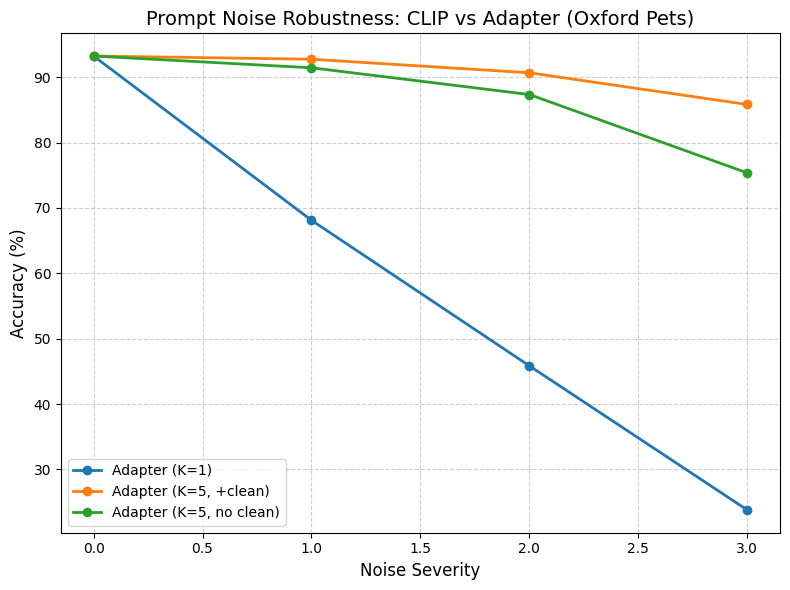

In [ ]:
import json
import matplotlib.pyplot as plt

# Paths to JSON result files
clip_k1_path = "output/robust_eval/prompt_only_k1_CLIP.json"  # optional if available
adapter_k1_path = "output/robust_eval/prompt_only_v2_k1_ADAPTER.json"
adapter_k5_clean_path = "output/robust_eval/prompt_ens_k5_with_clean_ADAPTER.json"
adapter_k5_no_clean_path = "output/robust_eval/prompt_ens_k5_no_clean_ADAPTER.json"

# Helper function to load results
def load_results(path):
    with open(path, "r") as f:
        data = json.load(f)
    severities = [d["severity"] for d in data]
    accs = [d["accuracy"] for d in data]
    return severities, accs

# Load available curves
curves = {}
try:
    curves["CLIP (K=1)"] = load_results(clip_k1_path)
except:
    print(" Baseline CLIP K=1 file not found, skipping.")

curves["Adapter (K=1)"] = load_results(adapter_k1_path)
curves["Adapter (K=5, +clean)"] = load_results(adapter_k5_clean_path)
curves["Adapter (K=5, no clean)"] = load_results(adapter_k5_no_clean_path)

# Plot
plt.figure(figsize=(8,6))
for label, (sev, acc) in curves.items():
    plt.plot(sev, acc, marker='o', linewidth=2, label=label)

plt.title("Prompt Noise Robustness: CLIP vs Adapter (Oxford Pets)", fontsize=14)
plt.xlabel("Noise Severity", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
prompt_adapter_k5_s2
prompt_ens_k5_no_clean_ADAPTER.json    prompt_only_v2_k1_ADAPTER.json
prompt_ens_k5_with_clean_ADAPTER.json  prompt_only_v2_k1.json
prompt_only_k1.json		       prompt_only_v2_k5_clean.json
prompt_only_k5.json		       prompt_only_v2_k5_no_clean.json


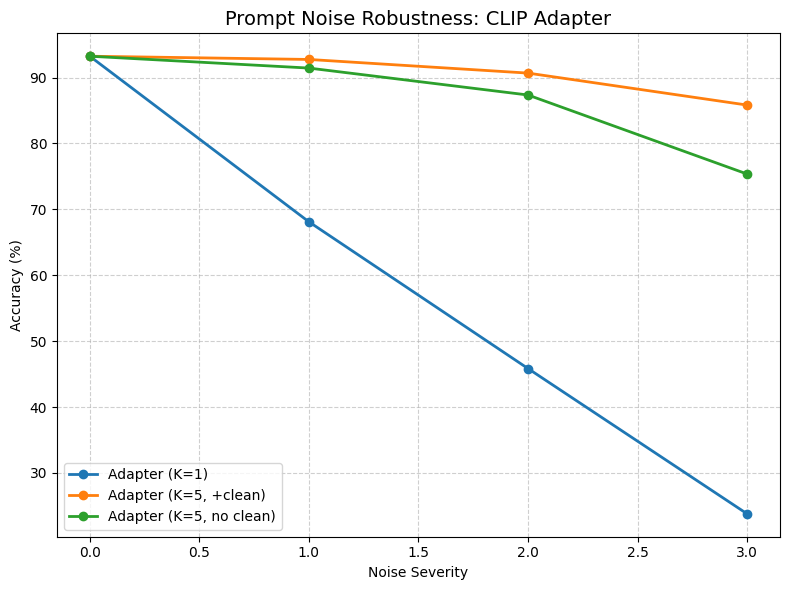


✅ Project reloaded — ready to continue training or analysis.


In [ ]:
#Resume

# ===============================
# Resume CLIP Robustness Project
# ===============================

from google.colab import drive
drive.mount('/content/drive')

# ✅ Step 1: Go to project folder
%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

# ✅ Step 2: Verify folders
!ls output/robust_train/
!ls output/robust_eval/

# ✅ Step 3: Optional — reload plotting code to visualize results
import json, matplotlib.pyplot as plt

def load_results(path):
    with open(path, "r") as f:
        data = json.load(f)
    severities = [d["severity"] for d in data]
    accs = [d["accuracy"] for d in data]
    return severities, accs

# Example paths (adjust if needed)
adapter_k1 = "output/robust_eval/prompt_only_v2_k1_ADAPTER.json"
adapter_k5_clean = "output/robust_eval/prompt_ens_k5_with_clean_ADAPTER.json"
adapter_k5_no_clean = "output/robust_eval/prompt_ens_k5_no_clean_ADAPTER.json"

curves = {
    "Adapter (K=1)": load_results(adapter_k1),
    "Adapter (K=5, +clean)": load_results(adapter_k5_clean),
    "Adapter (K=5, no clean)": load_results(adapter_k5_no_clean),
}

plt.figure(figsize=(8,6))
for label, (sev, acc) in curves.items():
    plt.plot(sev, acc, marker='o', linewidth=2, label=label)
plt.title("Prompt Noise Robustness: CLIP Adapter", fontsize=14)
plt.xlabel("Noise Severity")
plt.ylabel("Accuracy (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

print("\n✅ Project reloaded — ready to continue training or analysis.")


In [ ]:
#Re-save the “before regularization” results
# 🔹 K=5 with clean + 4 noisy (baseline, before adapter training)
!python robust_eval/prompt_noise_eval_v3.py \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean True \
  --save_json "output/robust_eval/prompt_ens_k5_with_clean.json"

# 🔹 K=5 all noisy (no clean)
!python robust_eval/prompt_noise_eval_v3.py \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --severity_list "0,1,2,3" \
  --prompt_noises "typo,case,emoji,space" \
  --ensemble_k 5 \
  --include_clean False \
  --save_json "output/robust_eval/prompt_ens_k5_no_clean.json"


ℹ️ Evaluating CLIP baseline (no adapter).
Evaluating severity 0 (K=5, include_clean=True)
sev=0: 100% 115/115 [00:17<00:00,  6.53it/s]
Severity 0: 87.41%
Evaluating severity 1 (K=5, include_clean=True)
sev=1: 100% 115/115 [00:17<00:00,  6.54it/s]
Severity 1: 84.98%
Evaluating severity 2 (K=5, include_clean=True)
sev=2: 100% 115/115 [00:17<00:00,  6.56it/s]
Severity 2: 74.49%
Evaluating severity 3 (K=5, include_clean=True)
sev=3: 100% 115/115 [00:17<00:00,  6.48it/s]
Severity 3: 68.85%
💾 Saved results to output/robust_eval/prompt_ens_k5_with_clean.json
ℹ️ Evaluating CLIP baseline (no adapter).
Evaluating severity 0 (K=5, include_clean=False)
sev=0: 100% 115/115 [00:17<00:00,  6.56it/s]
Severity 0: 87.41%
Evaluating severity 1 (K=5, include_clean=False)
sev=1: 100% 115/115 [00:17<00:00,  6.41it/s]
Severity 1: 75.20%
Evaluating severity 2 (K=5, include_clean=False)
sev=2: 100% 115/115 [00:17<00:00,  6.53it/s]
Severity 2: 57.84%
Evaluating severity 3 (K=5, include_clean=False)
sev=3: 100% 

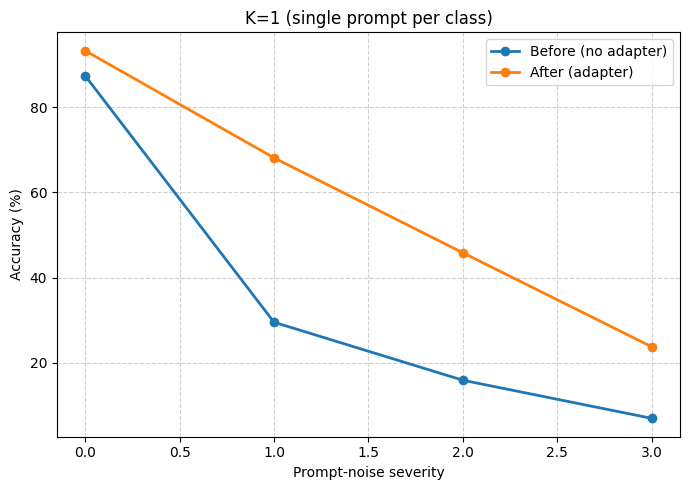


K=1 (single prompt per class) — Accuracy by severity
severity | before | after | Δ
       0 |  87.35 | 93.24 | +5.89
       1 |  29.54 | 68.11 | +38.57
       2 |  15.94 | 45.84 | +29.90
       3 |   7.00 | 23.79 | +16.79



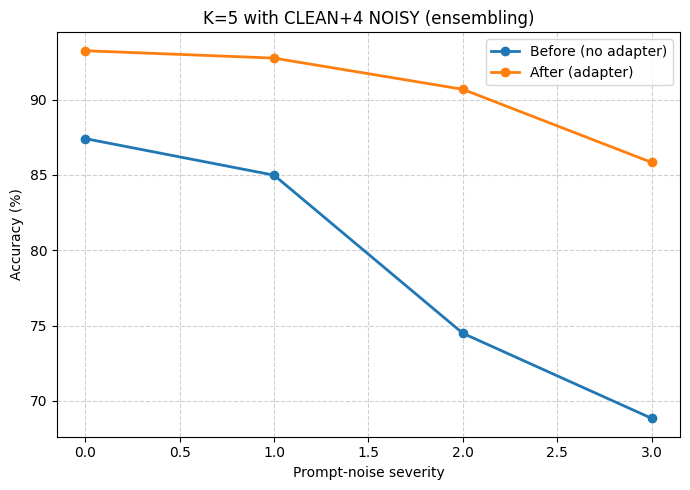


K=5 with CLEAN+4 NOISY (ensembling) — Accuracy by severity
severity | before | after | Δ
       0 |  87.41 | 93.24 | +5.83
       1 |  84.98 | 92.75 | +7.77
       2 |  74.49 | 90.68 | +16.19
       3 |  68.85 | 85.83 | +16.98



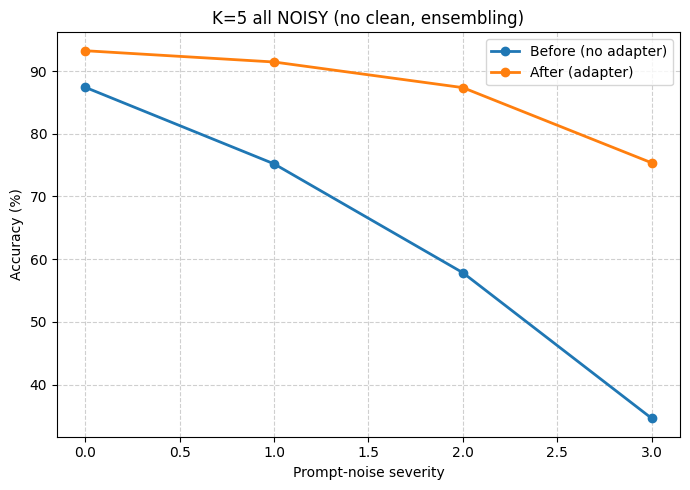


K=5 all NOISY (no clean, ensembling) — Accuracy by severity
severity | before | after | Δ
       0 |  87.41 | 93.24 | +5.83
       1 |  75.20 | 91.44 | +16.24
       2 |  57.84 | 87.35 | +29.52
       3 |  34.61 | 75.36 | +40.75



In [ ]:
# ============================
# Compare BEFORE vs AFTER (Adapter)
# ============================

import json, os
import matplotlib.pyplot as plt

# --- CONFIG – file paths (edit if your names differ) ---
BASE = "/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp/output/robust_eval"

# K=1 (single prompt per class)
BEFORE_K1  = f"{BASE}/prompt_only_v2_k1.json"                 # before regularization (no adapter)
AFTER_K1   = f"{BASE}/prompt_only_v2_k1_ADAPTER.json"         # after regularization (adapter)

# K=5 with 1 clean + 4 noisy
BEFORE_K5_CLEAN = f"{BASE}/prompt_ens_k5_with_clean.json"           # before regularization
AFTER_K5_CLEAN  = f"{BASE}/prompt_ens_k5_with_clean_ADAPTER.json"   # after regularization

# K=5 all noisy (no clean)
BEFORE_K5_NO   = f"{BASE}/prompt_ens_k5_no_clean.json"              # before regularization
AFTER_K5_NO    = f"{BASE}/prompt_ens_k5_no_clean_ADAPTER.json"      # after regularization

# --- helper to load a results json: can be either list[{"severity":..,"accuracy":..}] or dict["results"] = [...]
def load_curve(path):
    if not os.path.exists(path):
        return None, None
    with open(path, "r") as f:
        data = json.load(f)
    if isinstance(data, dict) and "results" in data:
        data = data["results"]
    severities = [d["severity"] for d in data]
    accs = [d["accuracy"] for d in data]
    return severities, accs

def plot_pair(title, before_path, after_path):
    sev_b, acc_b = load_curve(before_path)
    sev_a, acc_a = load_curve(after_path)

    if (sev_b is None) or (sev_a is None):
        print(f"⚠️ Missing file(s) for: {title}")
        print("   BEFORE:", before_path, "exists?" , os.path.exists(before_path))
        print("   AFTER :", after_path,  "exists?" , os.path.exists(after_path))
        return

    # Basic input sanity: ensure same severities order
    if sev_b != sev_a:
        # try to align by severity just in case
        mapping_b = {s:a for s,a in zip(sev_b, acc_b)}
        mapping_a = {s:a for s,a in zip(sev_a, acc_a)}
        common = sorted(set(mapping_b) & set(mapping_a))
        sev_b = sev_a = common
        acc_b = [mapping_b[s] for s in common]
        acc_a = [mapping_a[s] for s in common]

    # --- Plot
    plt.figure(figsize=(7,5))
    plt.plot(sev_b, acc_b, marker='o', linewidth=2, label="Before (no adapter)")
    plt.plot(sev_a, acc_a, marker='o', linewidth=2, label="After (adapter)")
    plt.title(title)
    plt.xlabel("Prompt-noise severity")
    plt.ylabel("Accuracy (%)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Small table
    print(f"\n{title} — Accuracy by severity")
    print("severity | before | after | Δ")
    for s, b, a in zip(sev_b, acc_b, acc_a):
        print(f"{s:>8} | {b:>6.2f} | {a:>5.2f} | {a-b:+.2f}")
    print()

# --- Run the three comparisons ---
plot_pair("K=1 (single prompt per class)", BEFORE_K1, AFTER_K1)
plot_pair("K=5 with CLEAN+4 NOISY (ensembling)", BEFORE_K5_CLEAN, AFTER_K5_CLEAN)
plot_pair("K=5 all NOISY (no clean, ensembling)", BEFORE_K5_NO, AFTER_K5_NO)


# **Noise-aware CoOp training**

In [ ]:
#Train CoOp under noisy prompts (Adapter)
# Purpose:
#   - Fine-tune a text adapter on OxfordPets
#   - Use K=5 prompts/class, noise severity=2
#   - Mix clean + noisy prompts
#   - Use AdamW + weight decay + consistency loss

%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

!python robust_train/train_prompt_noise_adapter.py \
  --dataset_dir "/content/drive/MyDrive/DL_CoOp_Robustness10/data/oxford_pets" \
  --use_trainval \
  --k 5 \
  --include_clean True \
  --train_severity 2 \
  --epochs 5 \
  --lr 5e-4 \
  --weight_decay 5e-2 \
  --lambda_consistency 0.5 \
  --output_dir "output/robust_train/prompt_adapter_k5_s2"


/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp
100%|███████████████████████████████████████| 335M/335M [00:04<00:00, 85.3MiB/s]
epoch 1/5: 100% 58/58 [11:49<00:00, 12.23s/it]
[epoch 1] CE=0.6491  KL=0.4977
epoch 2/5: 100% 58/58 [00:21<00:00,  2.64it/s]
[epoch 2] CE=0.4033  KL=0.4229
epoch 3/5: 100% 58/58 [00:21<00:00,  2.65it/s]
[epoch 3] CE=0.2415  KL=0.1869
epoch 4/5: 100% 58/58 [00:21<00:00,  2.67it/s]
[epoch 4] CE=0.2149  KL=0.2090
epoch 5/5: 100% 58/58 [00:21<00:00,  2.68it/s]
[epoch 5] CE=0.2697  KL=0.5430
Saved: output/robust_train/prompt_adapter_k5_s2/adapter_last.pth


In [ ]:
# reinstall missing Python deps

%cd /content/drive/MyDrive/DL_CoOp_Robustness10/CoOp

!pip install wilds --quiet


/content/drive/MyDrive/DL_CoOp_Robustness10/CoOp


# Evaluating CoOp Robutness to Noise Prompt using Ensempling

In [ ]:
import textwrap, os, pathlib

root = "/content/CoOp"
os.makedirs(os.path.join(root, "robust_eval"), exist_ok=True)

code = textwrap.dedent("""
# ===================== PATH FIX (must be first) =====================
from pathlib import Path
import sys, os

_here = Path(__file__).resolve()         # .../CoOp/robust_eval/coop_noise_eval_v5.py
_repo = _here.parents[1]                 # .../CoOp
_dassl = _repo / "Dassl.pytorch"         # .../CoOp/Dassl.pytorch

for _p in (str(_repo), str(_dassl)):
    if _p not in sys.path:
        sys.path.insert(0, _p)
os.environ.setdefault("PYTHONPATH", f"{_repo}:{_dassl}")
# ===================================================================

import json
import argparse
import numpy as np

try:
    from dassl.config import get_cfg_default
    from dassl.engine import build_trainer
except ModuleNotFoundError as e:
    raise RuntimeError(
        "Could not import 'dassl'.\\n"
        f"Checked paths:\\n  repo={_repo}\\n  dassl={_dassl}\\n"
        "First 5 sys.path entries:\\n  " + "\\n  ".join(sys.path[:5])
    ) from e

import trainers.coop  # register CoOp trainer


def typo(name, p=0.1, rng=None):
    rng = rng or np.random.default_rng(42)
    s = list(name)
    if len(s) < 4:
        return name
    i = int(rng.integers(1, len(s) - 1))
    if rng.random() < 0.5:
        s.pop(i)
    else:
        if i < len(s) - 1:
            s[i], s[i + 1] = s[i + 1], s[i]
    return ''.join(s)


def random_case(name, p=0.2, rng=None):
    rng = rng or np.random.default_rng(42)
    out = []
    for ch in name:
        if ch.isalpha() and rng.random() < p:
            out.append(ch.upper() if ch.islower() else ch.lower())
        else:
            out.append(ch)
    return ''.join(out)


def extra_space(name, severity=1, rng=None):
    rng = rng or np.random.default_rng(42)
    s = name
    k = max(1, int(severity))
    for _ in range(k):
        if len(s) < 3:
            break
        i = int(rng.integers(1, len(s)))
        s = s[:i] + " " + s[i:]
    return s


def emoji_tail(name, severity=1, rng=None):
    rng = rng or np.random.default_rng(42)
    EMOJIS = ["🐾", "✨", "⭐", "🙂", "🔥"]
    k = max(1, int(severity))
    return name + " " + "".join(EMOJIS[int(rng.integers(0, len(EMOJIS)))] for _ in range(k))


NOISES = {
    "typo": typo,
    "case": random_case,
    "space": extra_space,
    "emoji": emoji_tail,
}


def build_cfg(args):
    cfg = get_cfg_default()
    from yacs.config import CfgNode as CN

    if not hasattr(cfg.TRAINER, "COOP"):
        cfg.TRAINER.COOP = CN()
    cfg.TRAINER.COOP.N_CTX = 16
    cfg.TRAINER.COOP.CTX_INIT = ""
    cfg.TRAINER.COOP.CLASS_TOKEN_POSITION = "end"
    cfg.TRAINER.COOP.CSC = False
    cfg.TRAINER.COOP.PREC = "fp32"

    cfg.DATASET.SUBSAMPLE_CLASSES = "all"
    cfg.DATASET.NUM_SHOTS = -1

    cfg.SEED = 1
    cfg.OUTPUT_DIR = "output/tmp_eval"

    cfg.DATASET.NAME = args.dataset_name
    cfg.DATASET.ROOT = args.dataset_dir
    cfg.TRAINER.NAME = "CoOp"
    cfg.MODEL.BACKBONE.NAME = args.backbone

    cfg.DATALOADER.TRAIN_X.BATCH_SIZE = args.batch_size
    cfg.DATALOADER.TEST.BATCH_SIZE = args.batch_size
    cfg.TEST.EVALUATOR = "Classification"
    cfg.INPUT.PROMPT_TEMPLATE = "a photo of a {}"

    return cfg


def make_noised_classnames(names, noise_kind, severity, rng):
    fn = NOISES[noise_kind]
    out = []
    for n in names:
        if noise_kind in ("typo", "case"):
            p = 0.05 * severity
            out.append(fn(n, p=p, rng=rng))
        else:
            out.append(fn(n, severity=severity, rng=rng))
    return out


def run(args):
    import clip
    cfg = build_cfg(args)

    def eval_with_noised_names(noised_classnames):
        import torch, clip

        trainer = build_trainer(cfg)
        trainer.load_model(args.coop_ckpt)

        pl = getattr(trainer.model, "prompt_learner", None)
        if pl is None:
            raise RuntimeError("PromptLearner not found on trainer.model (unexpected for CoOp).")

        device = next(trainer.model.parameters()).device

        if hasattr(pl, "classnames"):
            pl.classnames = list(noised_classnames)

        template = getattr(cfg.INPUT, "PROMPT_TEMPLATE", "a photo of a {}")
        texts = [template.format(c) for c in noised_classnames]
        tok = clip.tokenize(texts).to(device, non_blocking=True)

        if hasattr(pl, "tokenized_prompts"):
            pl.tokenized_prompts = tok
        else:
            setattr(pl, "tokenized_prompts", tok)

        for name, buf in pl.named_buffers(recurse=True):
            if "token" in name and isinstance(buf, torch.Tensor) and buf.device != device:
                try:
                    setattr(pl, name, buf.to(device, non_blocking=True))
                except Exception:
                    pass

        metrics = trainer.test()
        if isinstance(metrics, (int, float)):
            return float(metrics)
        return float(metrics.get("accuracy", metrics.get("top1", metrics.get("acc", 0.0))))

    base = build_trainer(cfg)
    base.load_model(args.coop_ckpt)
    clean_classnames = list(base.dm.dataset.classnames)

    results = {
        "meta": {
            "dataset": args.dataset_name,
            "backbone": args.backbone,
            "k": "1",
            "noises": args.prompt_noises.split(","),
            "severities": args.severity_list,
        },
        "curves": {},
    }

    for nk in args.prompt_noises.split(","):
        nk = nk.strip()
        if not nk:
            continue
        accs = []
        for sev in args.severity_list:
            rng = np.random.default_rng(42 + sev)
            noised = make_noised_classnames(clean_classnames, nk, sev, rng)
            acc = eval_with_noised_names(noised)
            accs.append(acc)
            print(f"[{args.dataset_name}][{nk}] severity {sev}: {acc:.2f}%")
        results["curves"][nk] = accs

    out_dir = Path("output/robust_eval")
    out_dir.mkdir(parents=True, exist_ok=True)
    out_path = out_dir / f"coop_{args.dataset_name}_k1_v5.json"
    with open(out_path, "w") as f:
        json.dump(results, f, indent=2)
    print(f"Saved: {out_path}")


if __name__ == "__main__":
    ap = argparse.ArgumentParser()
    ap.add_argument("--dataset_name", required=True,
                    help="CoOp dataset name, e.g. OxfordPets, Caltech101, Food101, DTD, EuroSAT")
    ap.add_argument("--dataset_dir", required=True)
    ap.add_argument("--backbone", default="ViT-B/16")
    ap.add_argument("--batch_size", type=int, default=32)
    ap.add_argument("--severity_list", type=int, nargs="+", default=[0, 1, 2, 3])
    ap.add_argument("--prompt_noises", default="typo,case,emoji,space")
    ap.add_argument("--ensemble_k", type=int, default=1)
    ap.add_argument("--include_clean", action="store_true")
    ap.add_argument("--coop_ckpt", required=True)
    args = ap.parse_args()
    run(args)
""")

with open(os.path.join(root, "robust_eval", "coop_noise_eval_v5.py"), "w") as f:
    f.write(code)

print(" wrote /content/CoOp/robust_eval/coop_noise_eval_v5.py")


 wrote /content/CoOp/robust_eval/coop_noise_eval_v5.py


In [ ]:
%cd /content
!rm -rf CoOp
!git clone https://github.com/KaiyangZhou/CoOp.git CoOp
%cd CoOp


/content
Cloning into 'CoOp'...
remote: Enumerating objects: 455, done.
remote: Counting objects: 100% (250/250), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 455 (delta 217), reused 199 (delta 199), pack-reused 205 (from 1)
Receiving objects: 100% (455/455), 1.40 MiB | 4.69 MiB/s, done.
Resolving deltas: 100% (266/266), done.
/content/CoOp


In [ ]:
%cd /content/CoOp_fresh

# Clone Dassl inside the CoOp directory
!git clone https://github.com/KaiyangZhou/Dassl.pytorch.git

# Check
!ls /content/CoOp_fresh
!ls /content/CoOp_fresh/Dassl.pytorch


/content/CoOp_fresh
Cloning into 'Dassl.pytorch'...
remote: Enumerating objects: 2477, done.
remote: Counting objects: 100% (1081/1081), done.
remote: Compressing objects: 100% (235/235), done.
remote: Total 2477 (delta 933), reused 846 (delta 846), pack-reused 1396 (from 1)
Receiving objects: 100% (2477/2477), 410.19 KiB | 2.19 MiB/s, done.
Resolving deltas: 100% (1676/1676), done.
clip	   Dassl.pytorch   interpret_prompt.py	README.md	  train.py
COCOOP.md  datasets	   LICENSE		requirements.txt
configs    DATASETS.md	   lpclip		scripts
COOP.md    draw_curves.py  parse_test_res.py	trainers
configs  datasets     LICENSE	 README.md	   setup.py
dassl	 DATASETS.md  linter.sh  requirements.txt  tools


In [ ]:
%cd /content/CoOp_fresh/Dassl.pytorch
!pip install -e .


/content/CoOp_fresh/Dassl.pytorch
Obtaining file:///content/CoOp_fresh/Dassl.pytorch
  Preparing metadata (setup.py) ... done
  Attempting uninstall: dassl
    Found existing installation: dassl 0.6.3
    Uninstalling dassl-0.6.3:
      Successfully uninstalled dassl-0.6.3
  Running setup.py develop for dassl


# **Figures**

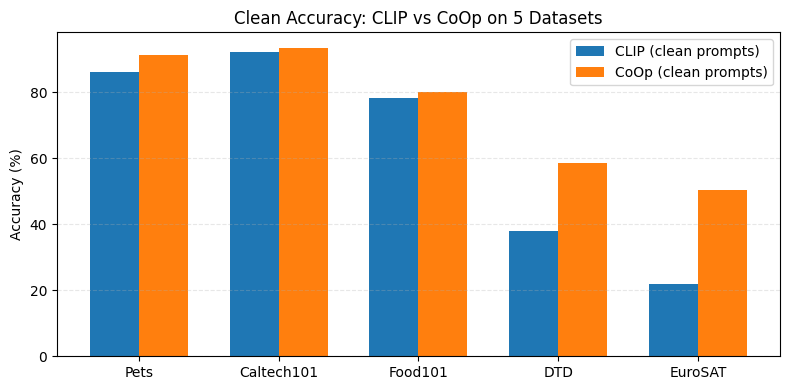

In [ ]:
##Figure 1 – Clean Accuracy: CLIP vs CoOp (all 5 datasets)
import matplotlib.pyplot as plt
import numpy as np

# ---- Data (from your baseline table) ----
datasets = ["Pets", "Caltech101", "Food101", "DTD", "EuroSAT"]
clip_clean =  [86.2, 92.0, 78.2, 38.0, 22.0]
coop_clean =  [91.1, 93.4, 80.0, 58.5, 50.2]

x = np.arange(len(datasets))
width = 0.35

plt.figure(figsize=(8, 4))
plt.bar(x - width/2, clip_clean, width, label="CLIP (clean prompts)")
plt.bar(x + width/2, coop_clean, width, label="CoOp (clean prompts)")

plt.xticks(x, datasets)
plt.ylabel("Accuracy (%)")
plt.title("Clean Accuracy: CLIP vs CoOp on 5 Datasets")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()
# plt.savefig("fig_clean_clip_vs_coop.png", dpi=300)


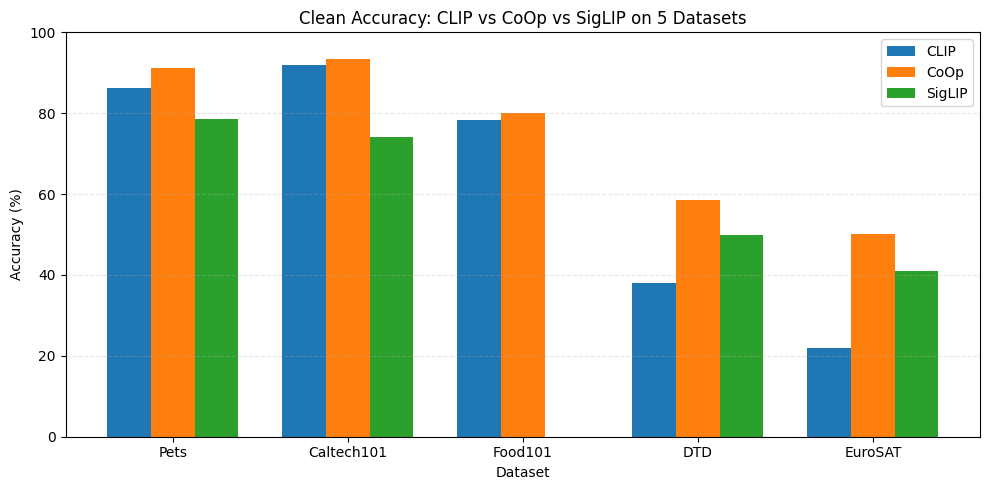

In [1]:
##Figure 1 – Clean Accuracy: CLIP vs CoOp vs SigLIP (all 5 datasets)
import matplotlib.pyplot as plt
import numpy as np

# ---- Data (from your baseline table) ----
datasets = ["Pets", "Caltech101", "Food101", "DTD", "EuroSAT"]
clip_clean = [86.2, 92.0, 78.2, 38.0, 22.0]
coop_clean = [91.1, 93.4, 80.0, 58.5, 50.2]
siglip_clean = [78.64, 74.05, None, 49.93, 40.99]  # None for Food101 (no data)

x = np.arange(len(datasets))
width = 0.25

plt.figure(figsize=(10, 5))
plt.bar(x - width, clip_clean, width, label="CLIP", color='#1f77b4')
plt.bar(x, coop_clean, width, label="CoOp", color='#ff7f0e')

# Plot SigLIP bars, skipping None values
siglip_positions = []
siglip_values = []
for i, val in enumerate(siglip_clean):
    if val is not None:
        siglip_positions.append(i)
        siglip_values.append(val)

plt.bar(np.array(siglip_positions) + width, siglip_values, width,
        label="SigLIP", color='#2ca02c')

plt.xticks(x, datasets)
plt.ylabel("Accuracy (%)")
plt.xlabel("Dataset")
plt.title("Clean Accuracy: CLIP vs CoOp vs SigLIP on 5 Datasets")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()
# plt.savefig("fig_clean_baseline_comparison.png", dpi=300, bbox_inches='tight')

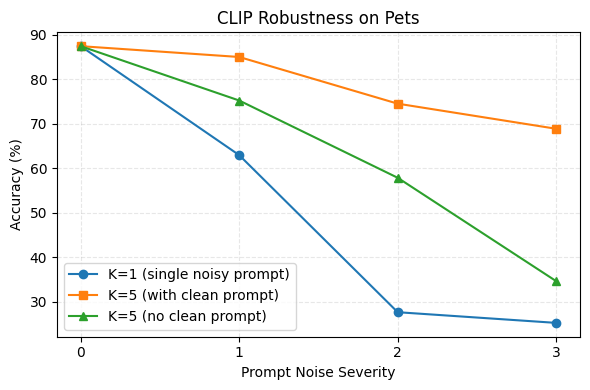

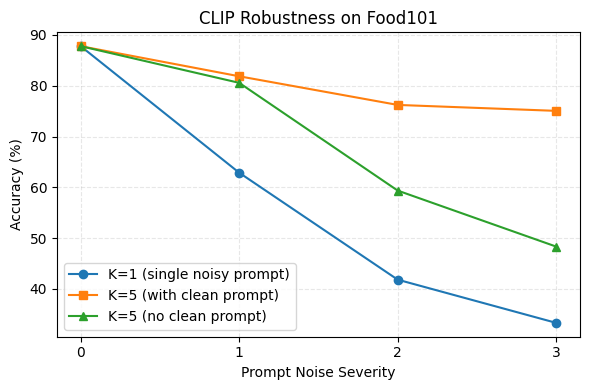

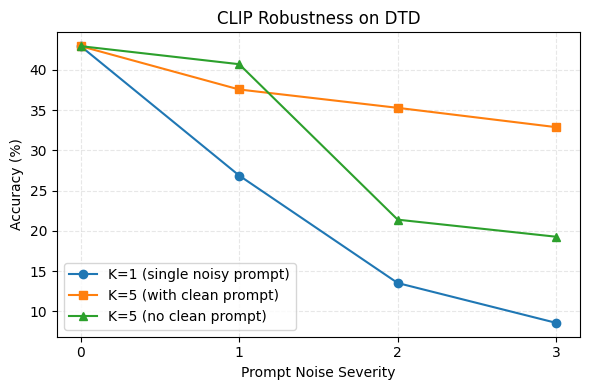

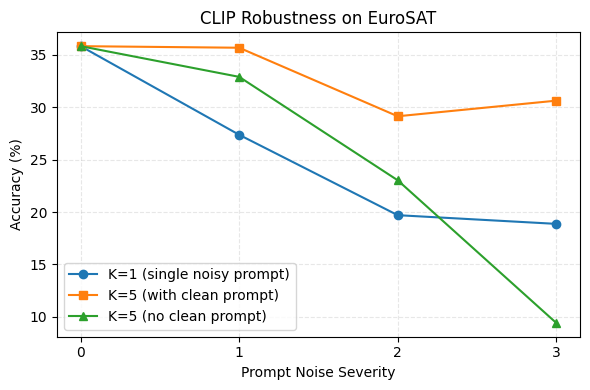

In [ ]:
#Figure 2 – CLIP Robustness Curves (per dataset)
import matplotlib.pyplot as plt
import numpy as np

severities = [0, 1, 2, 3]

# ---- Robustness data (your results) ----
clip_robust = {
    "Pets": {
        "K1":        [87.41, 62.93, 27.64, 25.24],
        "K5_clean":  [87.41, 84.98, 74.49, 68.85],
        "K5_no_clean":[87.41, 75.20, 57.84, 34.61],
    },
    "Food101": {
        "K1":        [87.79, 62.87, 41.81, 33.30],
        "K5_clean":  [87.79, 81.86, 76.22, 75.05],
        "K5_no_clean":[87.79, 80.57, 59.35, 48.32],
    },
    "DTD": {
        "K1":        [42.93, 26.86, 13.51, 8.56],
        "K5_clean":  [42.93, 37.55, 35.27, 32.87],
        "K5_no_clean":[42.93, 40.69, 21.38, 19.26],
    },
    "EuroSAT": {
        "K1":        [35.83, 27.37, 19.70, 18.87],
        "K5_clean":  [35.83, 35.68, 29.14, 30.63],
        "K5_no_clean":[35.83, 32.90, 23.03, 9.42],
    },
}

for dataset, curves in clip_robust.items():
    plt.figure(figsize=(6, 4))
    plt.plot(severities, curves["K1"], marker="o", label="K=1 (single noisy prompt)")
    plt.plot(severities, curves["K5_clean"], marker="s", label="K=5 (with clean prompt)")
    plt.plot(severities, curves["K5_no_clean"], marker="^", label="K=5 (no clean prompt)")

    plt.xlabel("Prompt Noise Severity")
    plt.ylabel("Accuracy (%)")
    plt.title(f"CLIP Robustness on {dataset}")
    plt.xticks(severities)
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
    # plt.savefig(f"fig_clip_robust_{dataset.lower()}.png", dpi=300)


These figures will clearly show:

K=1 crashes with noise.

K=5 + clean is much more stable.

K=5 without clean is in-between.

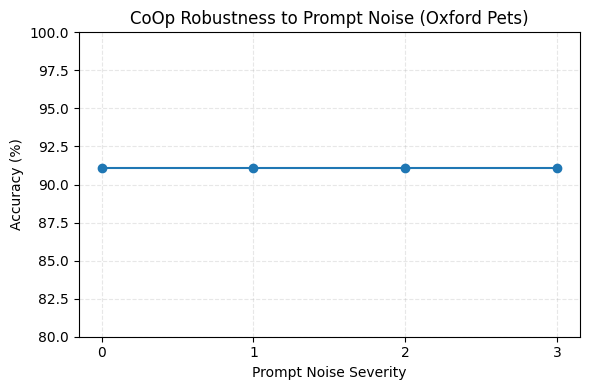

In [ ]:
#Figure 3 – CoOp Robustness Curve (Pets)
import matplotlib.pyplot as plt

severities = [0, 1, 2, 3]
coop_pets_acc = [91.1, 91.1, 91.1, 91.1]

plt.figure(figsize=(6, 4))
plt.plot(severities, coop_pets_acc, marker="o")

plt.xlabel("Prompt Noise Severity")
plt.ylabel("Accuracy (%)")
plt.title("CoOp Robustness to Prompt Noise (Oxford Pets)")
plt.xticks(severities)
plt.ylim(80, 100)
plt.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()
# plt.savefig("fig_coop_robust_pets.png", dpi=300)


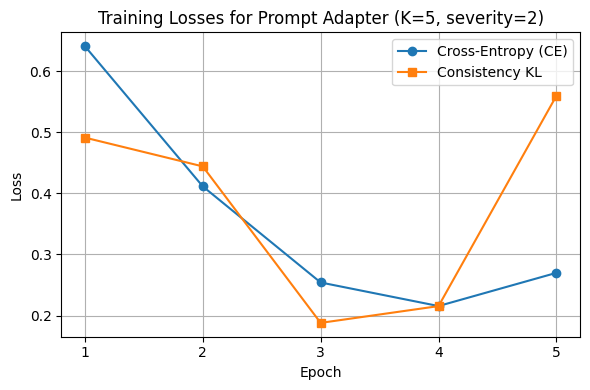

In [ ]:
#Plot the Loss When training the adaptet on top of clip with noise prompt

import matplotlib.pyplot as plt

# Data from your training log
epochs = [1, 2, 3, 4, 5]
ce = [0.6413, 0.4116, 0.2541, 0.2155, 0.2699]
kl = [0.4915, 0.4443, 0.1879, 0.2154, 0.5600]

plt.figure(figsize=(6,4))

plt.plot(epochs, ce, marker='o', label='Cross-Entropy (CE)')
plt.plot(epochs, kl, marker='s', label='Consistency KL')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses for Prompt Adapter (K=5, severity=2)')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


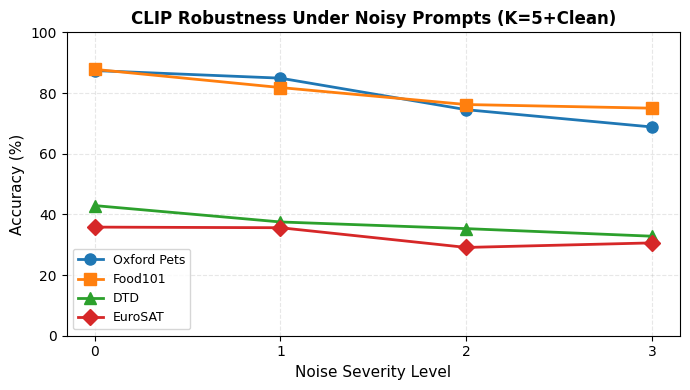

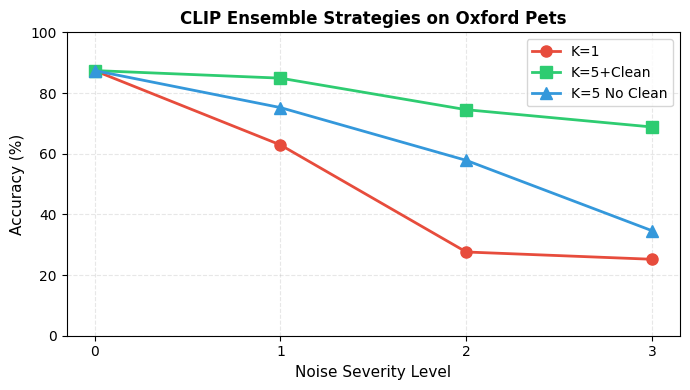

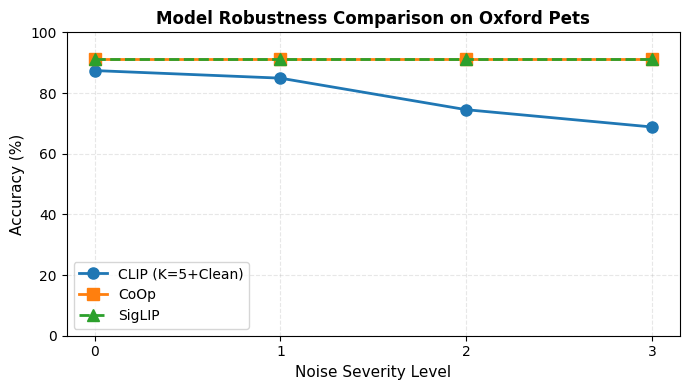

/tmp/ipython-input-976765637.py:136: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


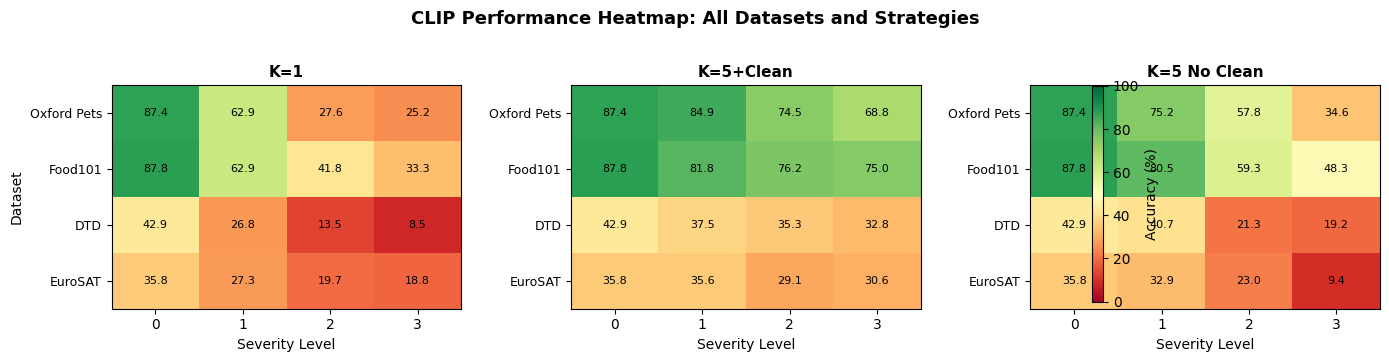

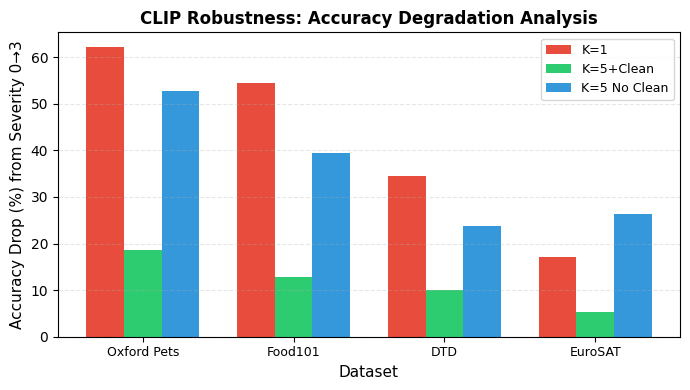

✓ All 5 figures generated successfully!


In [3]:
"""
Phase 2: Robustness Analysis Under Noisy Prompts
Comparing CLIP, CoOp, and SigLIP across different severity levels
"""

import matplotlib.pyplot as plt
import numpy as np

# ===== DATA FROM TABLES =====

# CLIP Data (from images)
clip_data = {
    'Oxford Pets': {
        'K=1': [87.4, 62.9, 27.6, 25.2],
        'K=5+Clean': [87.4, 84.9, 74.5, 68.8],
        'K=5 No Clean': [87.4, 75.2, 57.8, 34.6]
    },
    'Food101': {
        'K=1': [87.8, 62.9, 41.8, 33.3],
        'K=5+Clean': [87.8, 81.8, 76.2, 75.0],
        'K=5 No Clean': [87.8, 80.5, 59.3, 48.3]
    },
    'DTD': {
        'K=1': [42.9, 26.8, 13.5, 8.5],
        'K=5+Clean': [42.9, 37.5, 35.3, 32.8],
        'K=5 No Clean': [42.9, 40.7, 21.3, 19.2]
    },
    'EuroSAT': {
        'K=1': [35.8, 27.3, 19.7, 18.8],
        'K=5+Clean': [35.8, 35.6, 29.1, 30.6],
        'K=5 No Clean': [35.8, 32.9, 23.0, 9.4]
    }
}

# CoOp and SigLIP Data (only Pets dataset)
coop_pets = [91.11, 91.11, 91.11, 91.11]
siglip_pets = [91.11, 91.11, 91.11, 91.11]

severity_levels = [0, 1, 2, 3]

# ===== FIGURE 1: CLIP Robustness Across All Datasets =====
plt.figure(figsize=(7, 4))

datasets = ['Oxford Pets', 'Food101', 'DTD', 'EuroSAT']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D']

for i, dataset in enumerate(datasets):
    accuracies = clip_data[dataset]['K=5+Clean']
    plt.plot(severity_levels, accuracies, marker=markers[i],
            label=dataset, linewidth=2, markersize=8, color=colors[i])

plt.xlabel('Noise Severity Level', fontsize=11)
plt.ylabel('Accuracy (%)', fontsize=11)
plt.title('CLIP Robustness Under Noisy Prompts (K=5+Clean)', fontsize=12, fontweight='bold')
plt.legend(fontsize=9, loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(severity_levels)
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig('fig_clip_robustness_all_datasets.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== FIGURE 2: CLIP Strategy Comparison =====
plt.figure(figsize=(7, 4))

strategies = ['K=1', 'K=5+Clean', 'K=5 No Clean']
colors = ['#e74c3c', '#2ecc71', '#3498db']
markers = ['o', 's', '^']

for i, strategy in enumerate(strategies):
    accuracies = clip_data['Oxford Pets'][strategy]
    plt.plot(severity_levels, accuracies, marker=markers[i],
            label=strategy, linewidth=2, markersize=8, color=colors[i])

plt.xlabel('Noise Severity Level', fontsize=11)
plt.ylabel('Accuracy (%)', fontsize=11)
plt.title('CLIP Ensemble Strategies on Oxford Pets', fontsize=12, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(severity_levels)
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig('fig_clip_strategies_pets.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== FIGURE 3: Model Comparison =====
plt.figure(figsize=(7, 4))

clip_pets = clip_data['Oxford Pets']['K=5+Clean']

plt.plot(severity_levels, clip_pets, marker='o',
        label='CLIP (K=5+Clean)', linewidth=2, markersize=8, color='#1f77b4')
plt.plot(severity_levels, coop_pets, marker='s',
        label='CoOp', linewidth=2, markersize=8, color='#ff7f0e')
plt.plot(severity_levels, siglip_pets, marker='^',
        label='SigLIP', linewidth=2, markersize=8, color='#2ca02c', linestyle='--')

plt.xlabel('Noise Severity Level', fontsize=11)
plt.ylabel('Accuracy (%)', fontsize=11)
plt.title('Model Robustness Comparison on Oxford Pets', fontsize=12, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(severity_levels)
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig('fig_model_comparison_pets.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== FIGURE 4: Heatmap =====
fig, axes = plt.subplots(1, 3, figsize=(14, 3.5))

datasets = ['Oxford Pets', 'Food101', 'DTD', 'EuroSAT']
strategies = ['K=1', 'K=5+Clean', 'K=5 No Clean']

for idx, strategy in enumerate(strategies):
    data_matrix = np.array([clip_data[ds][strategy] for ds in datasets])

    im = axes[idx].imshow(data_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)
    axes[idx].set_title(strategy, fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Severity Level', fontsize=10)
    axes[idx].set_xticks(range(4))
    axes[idx].set_xticklabels(['0', '1', '2', '3'])
    axes[idx].set_yticks(range(4))
    axes[idx].set_yticklabels(datasets, fontsize=9)

    for i in range(len(datasets)):
        for j in range(4):
            text = axes[idx].text(j, i, f'{data_matrix[i, j]:.1f}',
                                 ha="center", va="center", color="black", fontsize=8)

axes[0].set_ylabel('Dataset', fontsize=10)
fig.colorbar(im, ax=axes, label='Accuracy (%)', shrink=0.8)
plt.suptitle('CLIP Performance Heatmap: All Datasets and Strategies',
             fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('fig_clip_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== FIGURE 5: Accuracy Drop =====
plt.figure(figsize=(7, 4))

x = np.arange(len(datasets))
width = 0.25

drops_k1 = [clip_data[ds]['K=1'][0] - clip_data[ds]['K=1'][3] for ds in datasets]
drops_k5_clean = [clip_data[ds]['K=5+Clean'][0] - clip_data[ds]['K=5+Clean'][3] for ds in datasets]
drops_k5_no_clean = [clip_data[ds]['K=5 No Clean'][0] - clip_data[ds]['K=5 No Clean'][3] for ds in datasets]

plt.bar(x - width, drops_k1, width, label='K=1', color='#e74c3c')
plt.bar(x, drops_k5_clean, width, label='K=5+Clean', color='#2ecc71')
plt.bar(x + width, drops_k5_no_clean, width, label='K=5 No Clean', color='#3498db')

plt.xlabel('Dataset', fontsize=11)
plt.ylabel('Accuracy Drop (%) from Severity 0→3', fontsize=11)
plt.title('CLIP Robustness: Accuracy Degradation Analysis', fontsize=12, fontweight='bold')
plt.xticks(x, datasets, fontsize=9)
plt.legend(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('fig_accuracy_drop.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ All 5 figures generated successfully!")

In [4]:
"""
Phase 2: Robustness Analysis Under Noisy Prompts
Comparing CLIP, CoOp, and SigLIP across different severity levels
Complete code - just copy and run!
"""

import matplotlib.pyplot as plt
import numpy as np

# ===== DATA FROM TABLES =====

# CLIP Data (from your screenshots)
clip_data = {
    'Oxford Pets': {
        'K=1': [87.4, 62.9, 27.6, 25.2],
        'K=5+Clean': [87.4, 84.9, 74.5, 68.8],
        'K=5 No Clean': [87.4, 75.2, 57.8, 34.6]
    },
    'Food101': {
        'K=1': [87.8, 62.9, 41.8, 33.3],
        'K=5+Clean': [87.8, 81.8, 76.2, 75.0],
        'K=5 No Clean': [87.8, 80.5, 59.3, 48.3]
    },
    'DTD': {
        'K=1': [42.9, 26.8, 13.5, 8.5],
        'K=5+Clean': [42.9, 37.5, 35.3, 32.8],
        'K=5 No Clean': [42.9, 40.7, 21.3, 19.2]
    },
    'EuroSAT': {
        'K=1': [35.8, 27.3, 19.7, 18.8],
        'K=5+Clean': [35.8, 35.6, 29.1, 30.6],
        'K=5 No Clean': [35.8, 32.9, 23.0, 9.4]
    }
}

# CoOp and SigLIP Data (only Pets dataset - perfectly robust!)
coop_pets = [91.11, 91.11, 91.11, 91.11]
siglip_pets = [91.11, 91.11, 91.11, 91.11]

severity_levels = [0, 1, 2, 3]
datasets = ['Oxford Pets', 'Food101', 'DTD', 'EuroSAT']

print("="*60)
print("PHASE 2: ROBUSTNESS ANALYSIS FIGURES")
print("="*60)

PHASE 2: ROBUSTNESS ANALYSIS FIGURES



[5/5] Generating: Accuracy Drop Analysis...


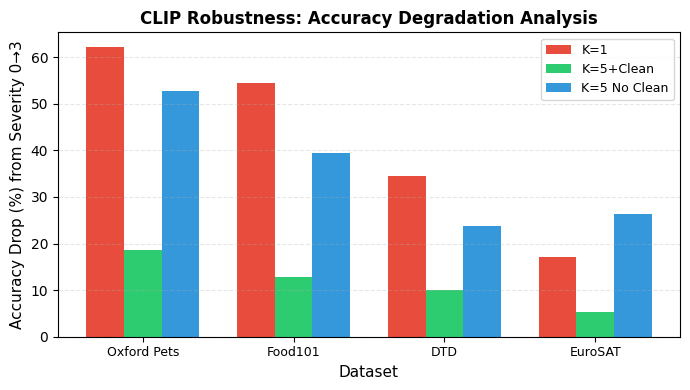

✓ Saved: fig_accuracy_drop.png

✓✓✓ ALL 5 FIGURES GENERATED SUCCESSFULLY! ✓✓✓

Generated files:
  1. fig_clip_robustness_all_datasets.png
  2. fig_clip_strategies_pets.png
  3. fig_model_comparison_pets.png
  4. fig_clip_heatmap.png
  5. fig_accuracy_drop.png

All files saved in your current directory!


In [5]:
# ===== FIGURE 5: Accuracy Drop Analysis =====
print("\n[5/5] Generating: Accuracy Drop Analysis...")

plt.figure(figsize=(7, 4))

x = np.arange(len(datasets))
width = 0.25

# Calculate accuracy drops from severity 0 to severity 3
drops_k1 = [clip_data[ds]['K=1'][0] - clip_data[ds]['K=1'][3] for ds in datasets]
drops_k5_clean = [clip_data[ds]['K=5+Clean'][0] - clip_data[ds]['K=5+Clean'][3] for ds in datasets]
drops_k5_no_clean = [clip_data[ds]['K=5 No Clean'][0] - clip_data[ds]['K=5 No Clean'][3] for ds in datasets]

plt.bar(x - width, drops_k1, width, label='K=1', color='#e74c3c')
plt.bar(x, drops_k5_clean, width, label='K=5+Clean', color='#2ecc71')
plt.bar(x + width, drops_k5_no_clean, width, label='K=5 No Clean', color='#3498db')

plt.xlabel('Dataset', fontsize=11)
plt.ylabel('Accuracy Drop (%) from Severity 0→3', fontsize=11)
plt.title('CLIP Robustness: Accuracy Degradation Analysis', fontsize=12, fontweight='bold')
plt.xticks(x, datasets, fontsize=9)
plt.legend(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('fig_accuracy_drop.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: fig_accuracy_drop.png")

print("\n" + "="*60)
print("✓✓✓ ALL 5 FIGURES GENERATED SUCCESSFULLY! ✓✓✓")
print("="*60)
print("\nGenerated files:")
print("  1. fig_clip_robustness_all_datasets.png")
print("  2. fig_clip_strategies_pets.png")
print("  3. fig_model_comparison_pets.png")
print("  4. fig_clip_heatmap.png")
print("  5. fig_accuracy_drop.png")
print("\nAll files saved in your current directory!")

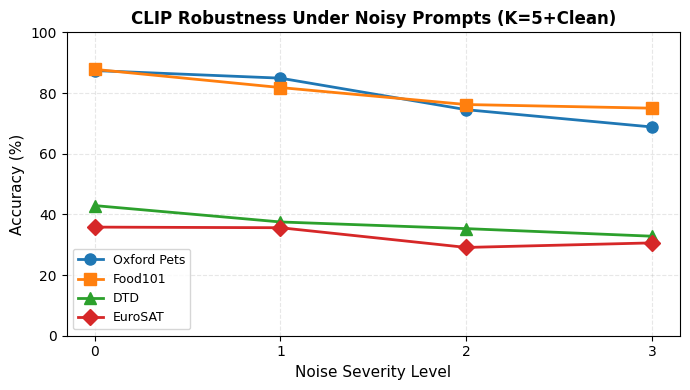

✓ Saved: fig_clip_robustness_all_datasets.png


In [6]:
#FIGURE 1: CLIP Robustness Across All Datasets
import matplotlib.pyplot as plt
import numpy as np

# Data
clip_data = {
    'Oxford Pets': [87.4, 84.9, 74.5, 68.8],
    'Food101': [87.8, 81.8, 76.2, 75.0],
    'DTD': [42.9, 37.5, 35.3, 32.8],
    'EuroSAT': [35.8, 35.6, 29.1, 30.6]
}

severity_levels = [0, 1, 2, 3]
datasets = ['Oxford Pets', 'Food101', 'DTD', 'EuroSAT']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D']

plt.figure(figsize=(7, 4))

for i, dataset in enumerate(datasets):
    accuracies = clip_data[dataset]
    plt.plot(severity_levels, accuracies, marker=markers[i],
            label=dataset, linewidth=2, markersize=8, color=colors[i])

plt.xlabel('Noise Severity Level', fontsize=11)
plt.ylabel('Accuracy (%)', fontsize=11)
plt.title('CLIP Robustness Under Noisy Prompts (K=5+Clean)', fontsize=12, fontweight='bold')
plt.legend(fontsize=9, loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(severity_levels)
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig('fig_clip_robustness_all_datasets.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: fig_clip_robustness_all_datasets.png")

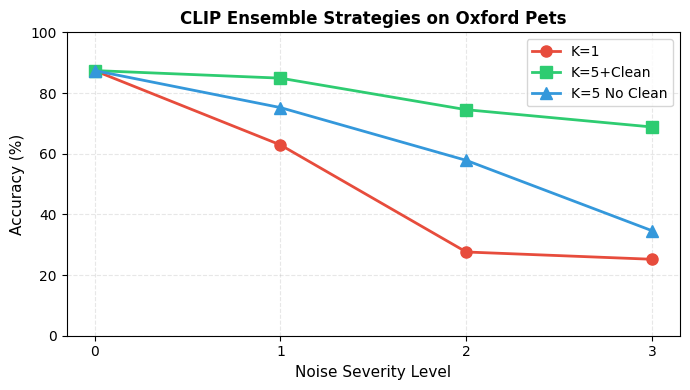

✓ Saved: fig_clip_strategies_pets.png


In [1]:
#FIGURE 2: CLIP Strategy Comparison on Oxford Pets
import matplotlib.pyplot as plt
import numpy as np

# Data
severity_levels = [0, 1, 2, 3]
k1_data = [87.4, 62.9, 27.6, 25.2]
k5_clean_data = [87.4, 84.9, 74.5, 68.8]
k5_no_clean_data = [87.4, 75.2, 57.8, 34.6]

plt.figure(figsize=(7, 4))

plt.plot(severity_levels, k1_data, marker='o',
        label='K=1', linewidth=2, markersize=8, color='#e74c3c')
plt.plot(severity_levels, k5_clean_data, marker='s',
        label='K=5+Clean', linewidth=2, markersize=8, color='#2ecc71')
plt.plot(severity_levels, k5_no_clean_data, marker='^',
        label='K=5 No Clean', linewidth=2, markersize=8, color='#3498db')

plt.xlabel('Noise Severity Level', fontsize=11)
plt.ylabel('Accuracy (%)', fontsize=11)
plt.title('CLIP Ensemble Strategies on Oxford Pets', fontsize=12, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(severity_levels)
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig('fig_clip_strategies_pets.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: fig_clip_strategies_pets.png")

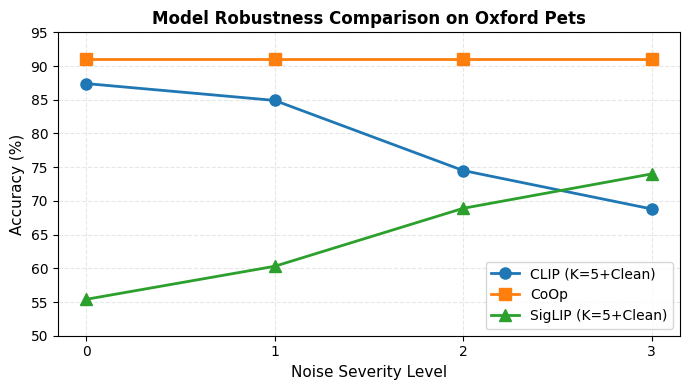

✓ Saved: fig_model_comparison_pets.png


In [2]:
#FIGURE 3: Model Comparison (CLIP vs CoOp vs SigLIP)
import matplotlib.pyplot as plt
import numpy as np

# Data
severity_levels = [0, 1, 2, 3]
clip_pets = [87.4, 84.9, 74.5, 68.8]
coop_pets = [91.11, 91.11, 91.11, 91.11]
siglip_pets = [55.4, 60.3, 68.9, 74.0]

plt.figure(figsize=(7, 4))

plt.plot(severity_levels, clip_pets, marker='o',
        label='CLIP (K=5+Clean)', linewidth=2, markersize=8, color='#1f77b4')
plt.plot(severity_levels, coop_pets, marker='s',
        label='CoOp', linewidth=2, markersize=8, color='#ff7f0e')
plt.plot(severity_levels, siglip_pets, marker='^',
        label='SigLIP (K=5+Clean)', linewidth=2, markersize=8, color='#2ca02c')

plt.xlabel('Noise Severity Level', fontsize=11)
plt.ylabel('Accuracy (%)', fontsize=11)
plt.title('Model Robustness Comparison on Oxford Pets', fontsize=12, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(severity_levels)
plt.ylim(50, 95)  # Zoomed in for better visibility
plt.tight_layout()
plt.savefig('fig_model_comparison_pets.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: fig_model_comparison_pets.png")

/tmp/ipython-input-1816235133.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


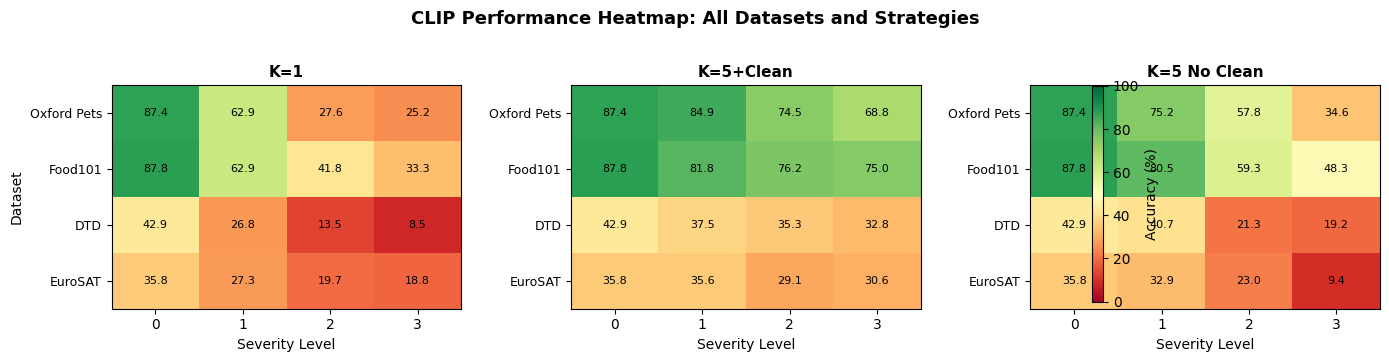

✓ Saved: fig_clip_heatmap.png


In [3]:
#FIGURE 4: CLIP Performance Heatmap
import matplotlib.pyplot as plt
import numpy as np

# Data
clip_data = {
    'Oxford Pets': {
        'K=1': [87.4, 62.9, 27.6, 25.2],
        'K=5+Clean': [87.4, 84.9, 74.5, 68.8],
        'K=5 No Clean': [87.4, 75.2, 57.8, 34.6]
    },
    'Food101': {
        'K=1': [87.8, 62.9, 41.8, 33.3],
        'K=5+Clean': [87.8, 81.8, 76.2, 75.0],
        'K=5 No Clean': [87.8, 80.5, 59.3, 48.3]
    },
    'DTD': {
        'K=1': [42.9, 26.8, 13.5, 8.5],
        'K=5+Clean': [42.9, 37.5, 35.3, 32.8],
        'K=5 No Clean': [42.9, 40.7, 21.3, 19.2]
    },
    'EuroSAT': {
        'K=1': [35.8, 27.3, 19.7, 18.8],
        'K=5+Clean': [35.8, 35.6, 29.1, 30.6],
        'K=5 No Clean': [35.8, 32.9, 23.0, 9.4]
    }
}

datasets = ['Oxford Pets', 'Food101', 'DTD', 'EuroSAT']
strategies = ['K=1', 'K=5+Clean', 'K=5 No Clean']

fig, axes = plt.subplots(1, 3, figsize=(14, 3.5))

for idx, strategy in enumerate(strategies):
    data_matrix = np.array([clip_data[ds][strategy] for ds in datasets])

    im = axes[idx].imshow(data_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)
    axes[idx].set_title(strategy, fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Severity Level', fontsize=10)
    axes[idx].set_xticks(range(4))
    axes[idx].set_xticklabels(['0', '1', '2', '3'])
    axes[idx].set_yticks(range(4))
    axes[idx].set_yticklabels(datasets, fontsize=9)

    # Add text annotations
    for i in range(len(datasets)):
        for j in range(4):
            text = axes[idx].text(j, i, f'{data_matrix[i, j]:.1f}',
                                 ha="center", va="center", color="black", fontsize=8)

axes[0].set_ylabel('Dataset', fontsize=10)
fig.colorbar(im, ax=axes, label='Accuracy (%)', shrink=0.8)
plt.suptitle('CLIP Performance Heatmap: All Datasets and Strategies',
             fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('fig_clip_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: fig_clip_heatmap.png")

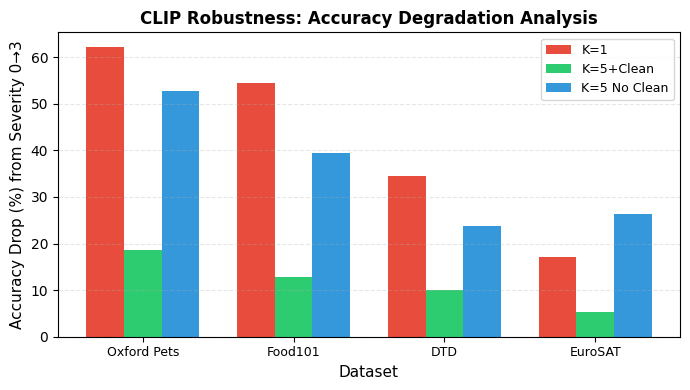

✓ Saved: fig_accuracy_drop.png


In [4]:
#FIGURE 5: Accuracy Drop Analysis
import matplotlib.pyplot as plt
import numpy as np

# Data
datasets = ['Oxford Pets', 'Food101', 'DTD', 'EuroSAT']

# Calculate drops from severity 0 to severity 3
drops_k1 = [
    87.4 - 25.2,  # Oxford Pets
    87.8 - 33.3,  # Food101
    42.9 - 8.5,   # DTD
    35.8 - 18.8   # EuroSAT
]

drops_k5_clean = [
    87.4 - 68.8,  # Oxford Pets
    87.8 - 75.0,  # Food101
    42.9 - 32.8,  # DTD
    35.8 - 30.6   # EuroSAT
]

drops_k5_no_clean = [
    87.4 - 34.6,  # Oxford Pets
    87.8 - 48.3,  # Food101
    42.9 - 19.2,  # DTD
    35.8 - 9.4    # EuroSAT
]

x = np.arange(len(datasets))
width = 0.25

plt.figure(figsize=(7, 4))

plt.bar(x - width, drops_k1, width, label='K=1', color='#e74c3c')
plt.bar(x, drops_k5_clean, width, label='K=5+Clean', color='#2ecc71')
plt.bar(x + width, drops_k5_no_clean, width, label='K=5 No Clean', color='#3498db')

plt.xlabel('Dataset', fontsize=11)
plt.ylabel('Accuracy Drop (%) from Severity 0→3', fontsize=11)
plt.title('CLIP Robustness: Accuracy Degradation Analysis', fontsize=12, fontweight='bold')
plt.xticks(x, datasets, fontsize=9)
plt.legend(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('fig_accuracy_drop.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: fig_accuracy_drop.png")

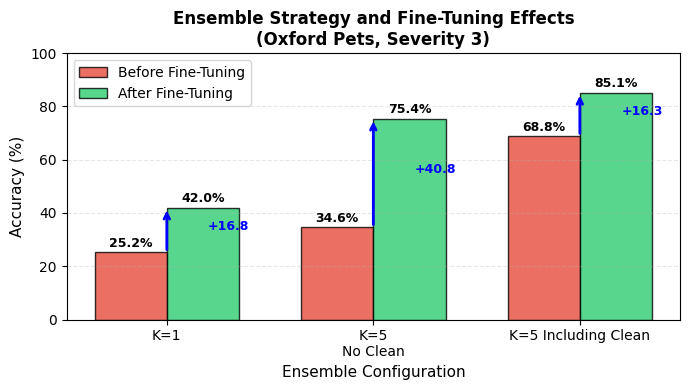

✓ Saved: fig_ablation_comparison.png


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data - Before and After Fine-Tuning for each ensemble strategy
configurations = ['K=1', 'K=5\nNo Clean', 'K=5 Including Clean']
before_ft = [25.2, 34.6, 68.8]
after_ft = [42.0, 75.4, 85.1]

x = np.arange(len(configurations))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 4))

bars1 = ax.bar(x - width/2, before_ft, width, label='Before Fine-Tuning',
               color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1)
bars2 = ax.bar(x + width/2, after_ft, width, label='After Fine-Tuning',
               color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=1)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add improvement arrows and labels
improvements = [16.8, 40.8, 16.3]
for i, imp in enumerate(improvements):
    mid_x = x[i]
    y_start = before_ft[i]
    y_end = after_ft[i]
    ax.annotate('', xy=(mid_x, y_end), xytext=(mid_x, y_start),
                arrowprops=dict(arrowstyle='->', color='blue', lw=2))
    ax.text(mid_x + 0.2, (y_start + y_end)/2, f'+{imp:.1f}',
            fontsize=9, color='blue', fontweight='bold')

ax.set_ylabel('Accuracy (%)', fontsize=11)
ax.set_xlabel('Ensemble Configuration', fontsize=11)
ax.set_title('Ensemble Strategy and Fine-Tuning Effects\n(Oxford Pets, Severity 3)',
             fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(configurations, fontsize=10)
ax.set_ylim(0, 100)
ax.legend(fontsize=10, loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('fig_ablation_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: fig_ablation_comparison.png")